# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.
<br>
Глобальная цель - научиться определять рыночную стоимость объектов недвижимости. 
<br>
Задача исследования — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Структура проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-файл-с-данными-и-изучите-общую-информацию." data-toc-modified-id="Откройте-файл-с-данными-и-изучите-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузим данные и изучим общую информацию.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Преобразование-типов-данных" data-toc-modified-id="Преобразование-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Преобразование типов данных</a></span></li><li><span><a href="#Удаление-дубликатов" data-toc-modified-id="Удаление-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Удаление дубликатов</a></span></li><li><span><a href="#Обработка-аномальных-значений" data-toc-modified-id="Обработка-аномальных-значений-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка аномальных значений</a></span></li></ul></li><li><span><a href="#Посчитайте-и-добавьте-в-таблицу-новые-столбцы" data-toc-modified-id="Посчитайте-и-добавьте-в-таблицу-новые-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Рассмотрим-подробнее-следующие-признаки:" data-toc-modified-id="Рассмотрим-подробнее-следующие-признаки:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Рассмотрим подробнее следующие признаки:</a></span><ul class="toc-item"><li><span><a href="#общая-площадь" data-toc-modified-id="общая-площадь-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>общая площадь</a></span></li><li><span><a href="#жилая-площадь" data-toc-modified-id="жилая-площадь-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>жилая площадь</a></span></li><li><span><a href="#площадь-кухни" data-toc-modified-id="площадь-кухни-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>площадь кухни</a></span></li><li><span><a href="#цена-объекта" data-toc-modified-id="цена-объекта-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>цена объекта</a></span></li><li><span><a href="#количество-комнат" data-toc-modified-id="количество-комнат-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>количество комнат</a></span></li><li><span><a href="#высота-потолков" data-toc-modified-id="высота-потолков-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>высота потолков</a></span></li><li><span><a href="#этажность" data-toc-modified-id="этажность-4.1.7"><span class="toc-item-num">4.1.7&nbsp;&nbsp;</span>этажность</a></span></li><li><span><a href="#расстояние-до-центра-города-в-метрах" data-toc-modified-id="расстояние-до-центра-города-в-метрах-4.1.8"><span class="toc-item-num">4.1.8&nbsp;&nbsp;</span>расстояние до центра города в метрах</a></span></li><li><span><a href="#расстояние-до-ближайшего-аэропорта" data-toc-modified-id="расстояние-до-ближайшего-аэропорта-4.1.9"><span class="toc-item-num">4.1.9&nbsp;&nbsp;</span>расстояние до ближайшего аэропорта</a></span></li><li><span><a href="#расстояние-до-ближайшего-парка" data-toc-modified-id="расстояние-до-ближайшего-парка-4.1.10"><span class="toc-item-num">4.1.10&nbsp;&nbsp;</span>расстояние до ближайшего парка</a></span></li><li><span><a href="#месяц--и-день-публикации-объявления" data-toc-modified-id="месяц--и-день-публикации-объявления-4.1.11"><span class="toc-item-num">4.1.11&nbsp;&nbsp;</span>месяц  и день публикации объявления</a></span></li><li><span><a href="#скорость-продажи-квартиры" data-toc-modified-id="скорость-продажи-квартиры-4.1.12"><span class="toc-item-num">4.1.12&nbsp;&nbsp;</span>скорость продажи квартиры</a></span></li></ul></li><li><span><a href="#Рассмотрим-зависимость-цены-объекты-от" data-toc-modified-id="Рассмотрим-зависимость-цены-объекты-от-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Рассмотрим зависимость цены объекты от</a></span><ul class="toc-item"><li><span><a href="#Начнем-с-анализа-зависимости-цены-от-общей-площади." data-toc-modified-id="Начнем-с-анализа-зависимости-цены-от-общей-площади.-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Начнем с анализа зависимости цены от общей площади.</a></span></li><li><span><a href="#Теперь-исследуем-зависимость-цены-от-жилой-площади." data-toc-modified-id="Теперь-исследуем-зависимость-цены-от-жилой-площади.-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Теперь исследуем зависимость цены от жилой площади.</a></span></li><li><span><a href="#Следующей-исследуем-зависимость-цены-квартиры-от-площади-кухни" data-toc-modified-id="Следующей-исследуем-зависимость-цены-квартиры-от-площади-кухни-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Следующей исследуем зависимость цены квартиры от площади кухни</a></span></li><li><span><a href="#Перейдем-к-зависимости-цены-от-количества-комнат." data-toc-modified-id="Перейдем-к-зависимости-цены-от-количества-комнат.-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Перейдем к зависимости цены от количества комнат.</a></span></li><li><span><a href="#Рассмотрим-влияние-категории-этажа-на-цену-квартиры" data-toc-modified-id="Рассмотрим-влияние-категории-этажа-на-цену-квартиры-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Рассмотрим влияние категории этажа на цену квартиры</a></span></li><li><span><a href="#Последней-рассмотрим-зависимость-цены-объекты-от-даты-размещения" data-toc-modified-id="Последней-рассмотрим-зависимость-цены-объекты-от-даты-размещения-4.2.6"><span class="toc-item-num">4.2.6&nbsp;&nbsp;</span>Последней рассмотрим зависимость цены объекты от даты размещения</a></span></li></ul></li><li><span><a href="#Посчитаем-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений." data-toc-modified-id="Посчитаем-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.</a></span></li><li><span><a href="#Вычислим-среднюю-цену-километра-до-центра-города-в-Санкт-Петербурге." data-toc-modified-id="Вычислим-среднюю-цену-километра-до-центра-города-в-Санкт-Петербурге.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вычислим среднюю цену километра до центра города в Санкт-Петербурге.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Предобработка</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Исследование-зависимости-цены-квартиры-от-некоторых-факторов" data-toc-modified-id="Исследование-зависимости-цены-квартиры-от-некоторых-факторов-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Исследование зависимости цены квартиры от некоторых факторов</a></span></li><li><span><a href="#Подсчитана-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений." data-toc-modified-id="Подсчитана-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений.-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Подсчитана среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.</a></span></li><li><span><a href="#Исследование-средней-цены-километра-до-центра-города-в-Санкт-Петербурге." data-toc-modified-id="Исследование-средней-цены-километра-до-центра-города-в-Санкт-Петербурге.-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Исследование средней цены километра до центра города в Санкт-Петербурге.</a></span></li></ul></li></ul></div>

### Загрузим  данныме и изучим общую информацию. 

Внимание! Если на вашем устройстве при исполнении графики не отображаются/отображаются с ошибками, пожалуйста, закоментируйте и/или не выполняйте следующую ячейку кода:

In [1]:
# Увеличение разрешения визуализаций
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/tmp/ipykernel_49/4102136135.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
# Сразу подготовим инструменты для дальнейшего использования
!pip install phik
import phik
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymystem3 import Mystem
sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

     |████████████████████████████████| 709 kB 1.8 MB/s eta 0:00:01


In [3]:
# Загрузим датафрейм и взглянем на него
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data = df.copy()
df

total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0                2.70          16.0         51.0      8          NaN  ...   
1                 NaN          11.0         18.6      1          NaN  ...   
2                 NaN           5.0         34.3      4          NaN  ...   
3                 NaN          14.0          NaN      9          NaN  ...   
4                3.03          14.0         32.0     13          NaN  ...   
...               ...           ...          ...    ...          ...  ...   
23694            3.70           5.0         73.3      3          NaN  ...   
23695             NaN           5.0         38.0      4          NaN  ...   
23696             NaN           3.0         29.7      1          NaN  ...   
23697            3.00          17.0          NaN     12          NaN  ...   
23698            2.50           5.0         12.3      1          NaN  ...   

       kitchen_area  balcony        locality_name  airports_nearest  \
0             25.00      NaN      Санкт-Петербург           18863.0   
1             11.00      2.0       посёлок Шушары           12817.0   
2              8.30      0.0      Санкт-Петербург           21741.0   
3               NaN      0.0      Санкт-Петербург           28098.0   
4             41.00      NaN      Санкт-Петербург           31856.0   
...             ...      ...                  ...               ...   
23694         13.83      NaN      Санкт-Петербург           24665.0   
23695          8.50      NaN                Тосно               NaN   
23696           NaN      NaN     село Рождествено               NaN   
23697         23.30      2.0      Санкт-Петербург           39140.0   
23698          9.00      NaN  поселок Новый Учхоз               NaN   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0                 16028.0               1.0          482.0               2.0   
1                 18603.0               0.0            NaN               0.0   
2                 13933.0               1.0           90.0               2.0   
3                  6800.0               2.0           84.0               3.0   
4                  8098.0               2.0          112.0               1.0   
...                   ...               ...            ...               ...   
23694              4232.0               1.0          796.0               3.0   
23695                 NaN               NaN            NaN               NaN   
23696                 NaN               NaN            NaN               NaN   
23697             10364.0               2.0          173.0               3.0   
23698                 NaN               NaN            NaN               NaN   

       ponds_nearest  days_exposition  
0              755.0              NaN  
1                NaN             81.0  
2              574.0            558.0  
3              234.0            424.0  
4               48.0            121.0  
...              ...              ...  
23694          381.0              NaN  
23695            NaN             45.0  
23696  

<a id='1'></a>
Общая информация о данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

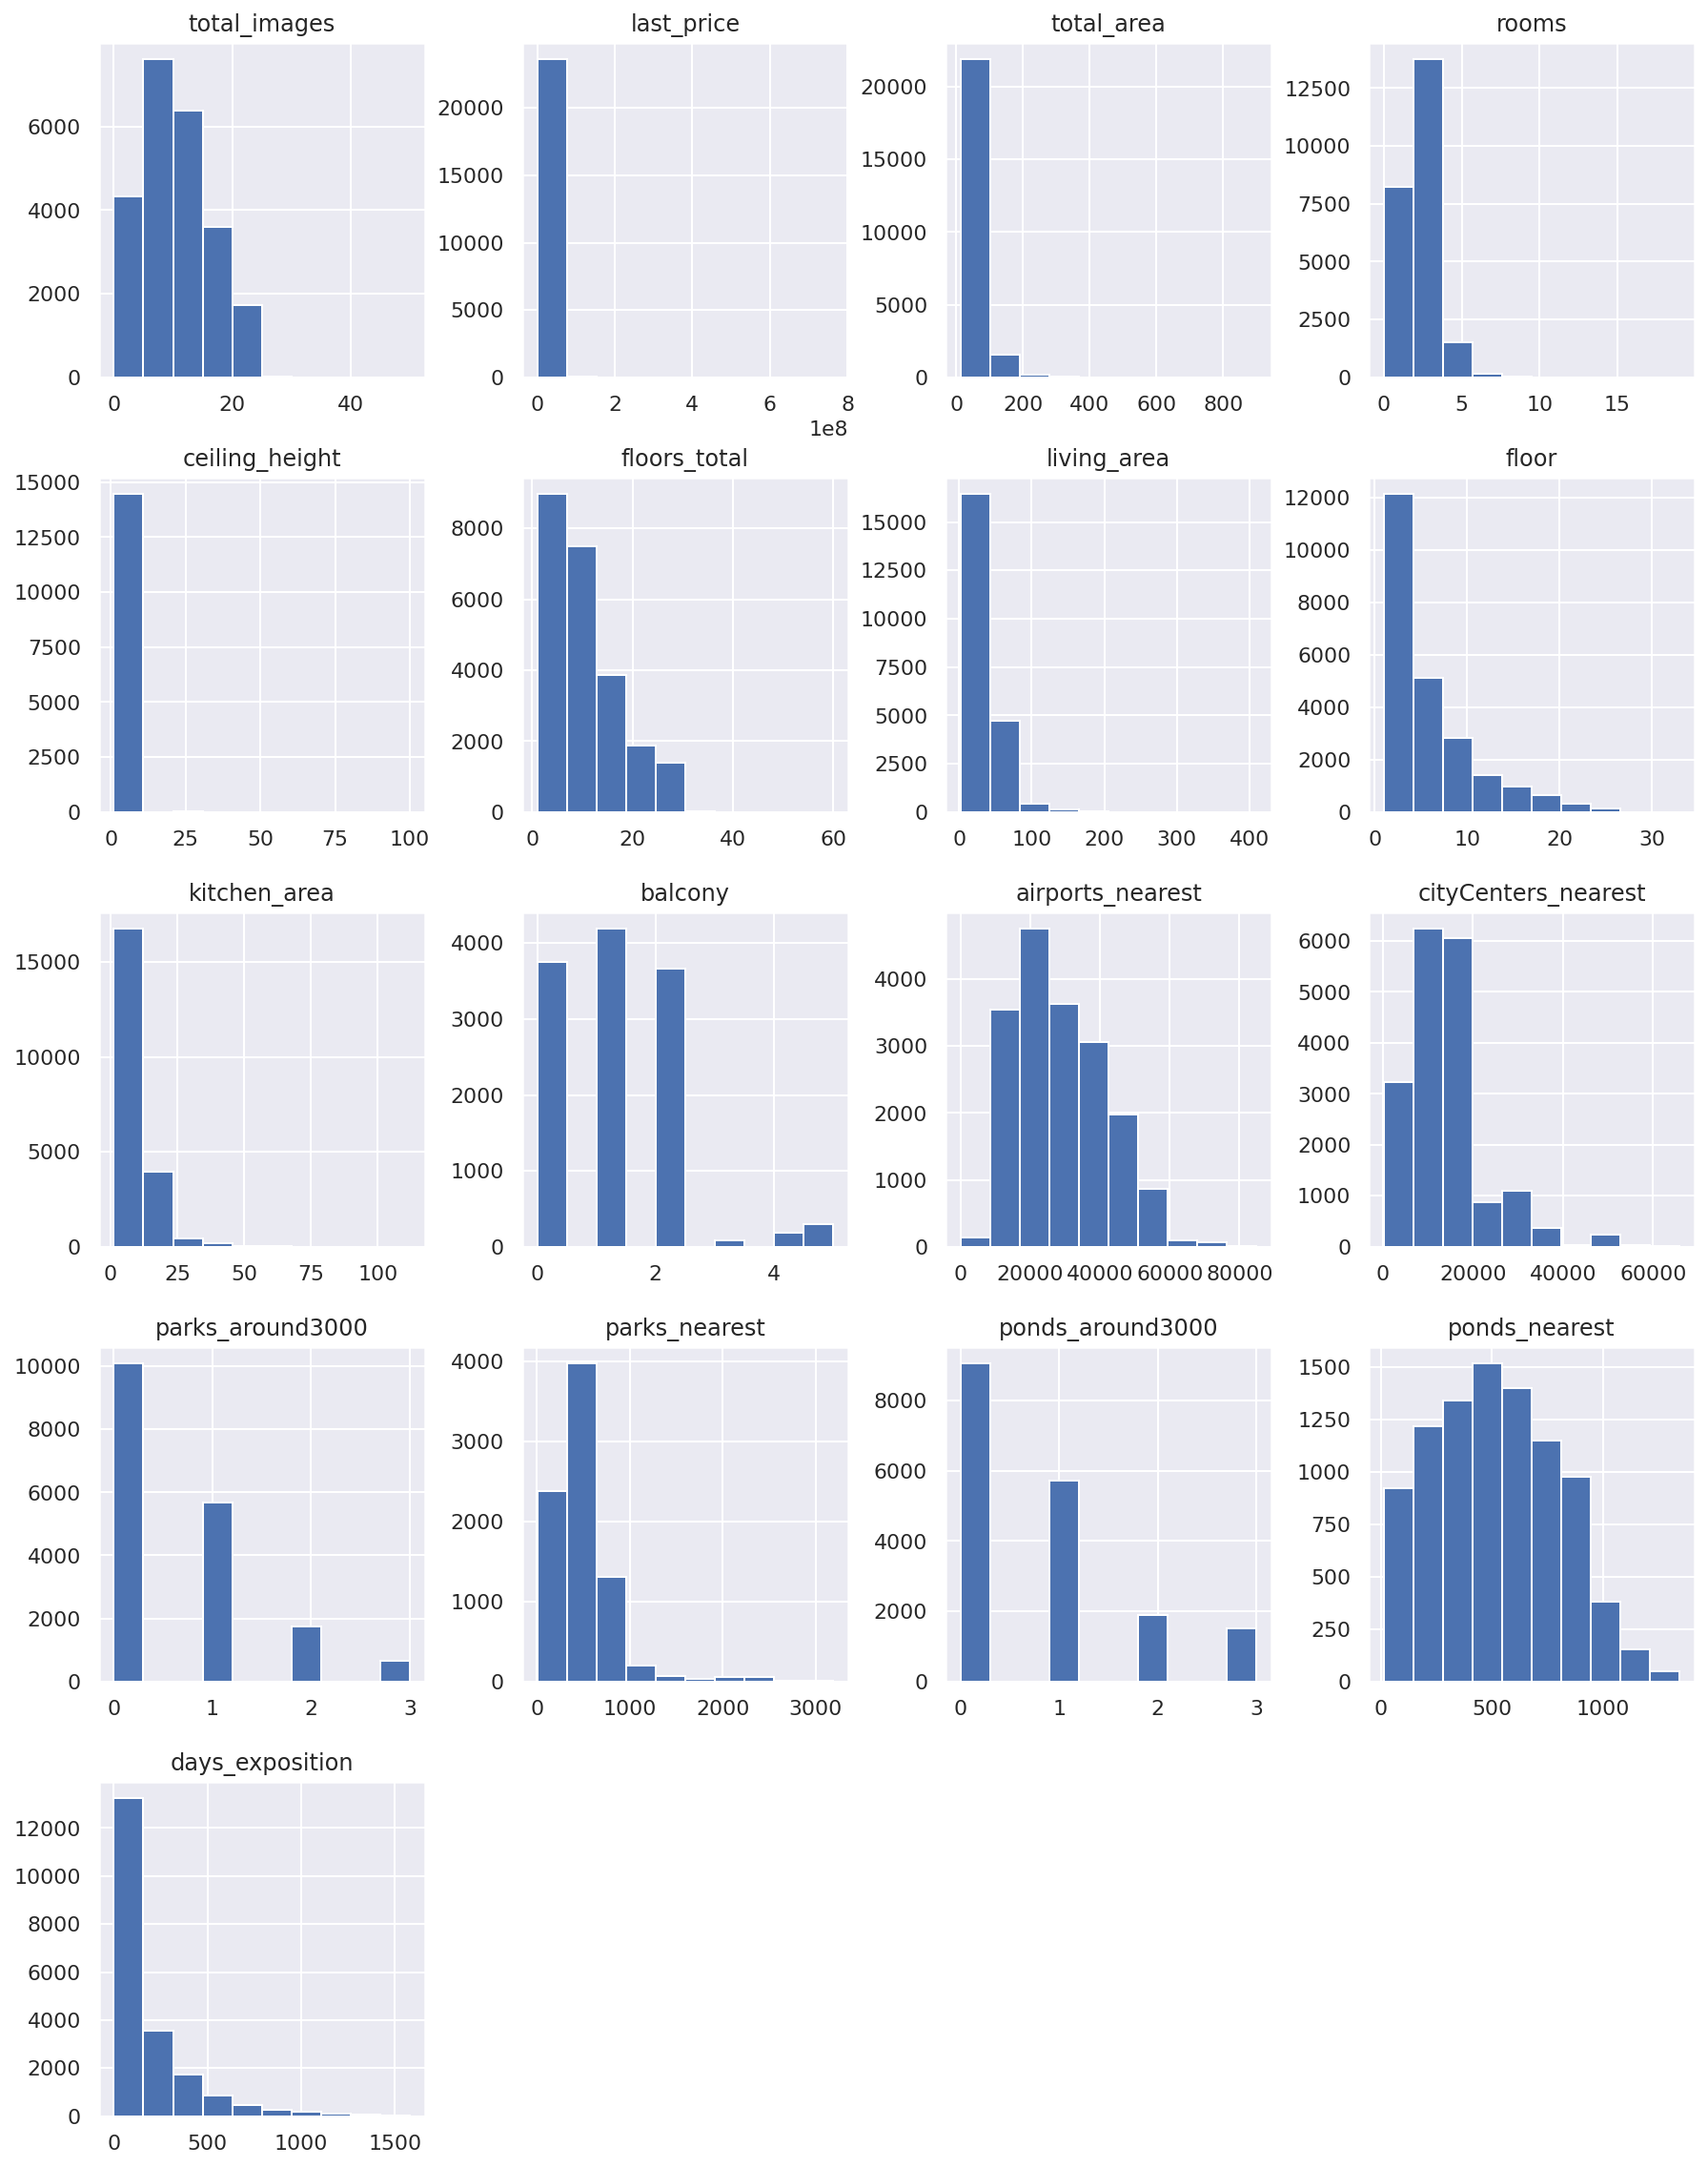

In [4]:
df.hist(figsize=(15, 20))
df.info()

Описание данных:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

### Предобработка данных

#### Обработка пропусков

In [5]:
# Посмторим на количество пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Начнем с пропусков в данных, добавленных пользователем.
- `ceiling_height` — высота потолков (м)
<br>
Вероятнее всего большое количество пропусков объясняется тем, что пользователи зачастую не предоставляют данные о высоте потолков. Заполнить пропуски логичным значением не представляется возможным, поэтому оставим пропуски.
- `floors_total` — всего этажей в доме
<br>
Скорее всего причина пропусков схожа с предыдущей. Однако, стоит проверить не является ли отсутствие значения индикатором, например, одноэтажного здания:

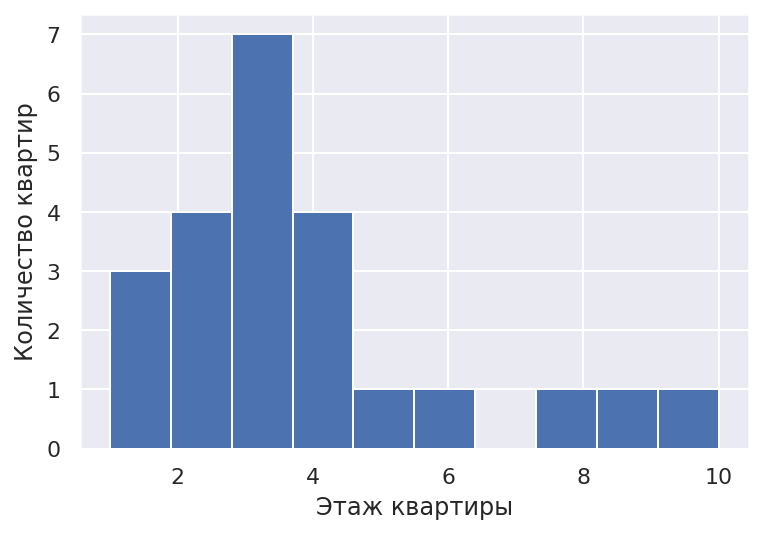

In [8]:
# Посмтрим на распределение этажности в строках с пропущенным значением 'floors_total'
df[df['floors_total'].isna()]['floor'].value_counts().plot(kind='hist')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество квартир')
plt.show()

Как видно из гистограммы - распределение достаточно случайное, а значит заполнить пропуски не представляется возможным.

- `balcony` — число балконов
<br>
Можно предположить, что если пользователь не указал количество балконов, то скорее всего, их нет. Проверим не отличается ли средняя цена и площадь квартир без балкона и квартир без указанных данных о балконе:

In [9]:
temp = df[df['balcony']==0][['last_price','total_area']].agg(['mean', 'count'])
temp1 = df[df['balcony']>0][['last_price','total_area']].agg(['mean', 'count'])
temp2 = df[df['balcony'].isna()][['last_price','total_area']].agg(['mean', 'count'])
temp = temp.merge(temp1, on=temp.index)
temp.columns = ['index', 'средняя цена без балкона', 
                'средняя площадь без балкона', 'средняя цена с балконом', 'средняя площадь с балконом']
temp = temp.join(temp2, on='index')
temp = temp.rename(columns={'last_price': 'средняя цена с пропуском', 'total_area': 'средняя площадь с балконом'})
temp.index = ['mean', 'count']
temp = temp.drop(['index'], axis=1)
temp

средняя цена без балкона  средняя площадь без балкона  \
mean               6.613249e+06                     61.86148   
count              3.758000e+03                   3758.00000   

       средняя цена с балконом  средняя площадь с балконом  \
mean              6.273396e+06                    58.32959   
count             8.422000e+03                  8422.00000   

       средняя цена с пропуском  средняя площадь с балконом  
mean               6.714214e+06                   61.331316  
count              1.151900e+04                11519.000000

В целом квартиры без указанных данных о балконе действительно ближе к квартирам без балкона. Можно заполнить пропуски в этом столбце.

In [10]:
# Заполним пропуски значением 0 и проверим отсутствие пропусков
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

- `living_area` — жилая площадь в квадратных метрах (м²) и `kitchen_area` — площадь кухни в квадратных метрах (м²)
<br>
Вероятнее всего, причина пропусков тут тоже - человеческий фактор, однако можно проверить, складывается ли общая площадь квартиры 'total_area' из жилой площади и площади кухни:

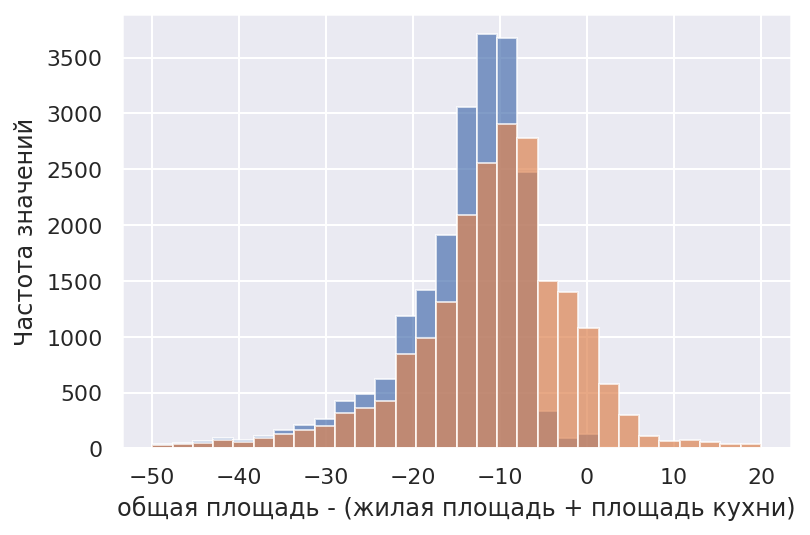

In [11]:
# Помсотрим распределение разницы суммы жилой площади и площади кухни и общей площади
(df['living_area'] + df['kitchen_area'] - df['total_area']).hist(bins=30, alpha=0.7, range=(-50, 20))
# И также с учетом количества балконов (если балконы учиттываются в общей площади).
# Возьмем среднюю площадь балконов квартиры - 6квм
(df['living_area'] + df['kitchen_area'] + df['balcony']*6 - df['total_area']).hist(bins=30, 
                                                                                   alpha=0.7, range=(-50, 20))
plt.xlabel('общая площадь - (жилая площадь + площадь кухни)')
plt.ylabel('Частота значений')
plt.show()

Судя по гистграмме общая площадь не учитывает площадь балконов, так как общая площадь не может быть меньше суммы отдельных площадей. 
<br>
Не смотря на скопление значений окло -15, разброс все же слишком большой для того, чтобы использовать эти данные для заполнения пропусков `living_area` или `kitchen_area`
- `is_apartment` — апартаменты (булев тип)
<br>


In [12]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

У нас есть всего около 12% непропущенных значений из которых только 50 указывают на тип квартиры "апартаменты". Возможно, большинство пользователей не уточняют юридический статус кватриры или же апартаментов из всей выборки действительно только 50. Из-за недостатка данных вряд ли данный признкак будет полезен. К тому же он не потребуется в дальнейших исследованиях. Можно удалить данный столбец.

In [13]:
df = df.drop(['is_apartment'], axis=1)

Перейдем к рассмотрению пропусков картографических данных.
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `parks_around3000` — число парков в радиусе 3 км
- `ponds_around3000` — число водоёмов в радиусе 3 км
<br>
В указанных выше столбцах очень похожее количетсво пропусков, посмторим связаны ли они:

In [14]:
# Сравним попарно сколько строк имеется в выборке с одним пропущенным и другим имеющимся значениями
for i in ['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000']:
    for j in ['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000']:
        if i != j:
            print(f'{i.ljust(20)} {j.ljust(20)} {str(df[(df[i].isna()) & ~(df[j].isna())].shape[0]).ljust(20)}')

airports_nearest     cityCenters_nearest  24                  
airports_nearest     parks_around3000     24                  
airports_nearest     ponds_around3000     24                  
cityCenters_nearest  airports_nearest     1                   
cityCenters_nearest  parks_around3000     1                   
cityCenters_nearest  ponds_around3000     1                   
parks_around3000     airports_nearest     0                   
parks_around3000     cityCenters_nearest  0                   
parks_around3000     ponds_around3000     0                   
ponds_around3000     airports_nearest     0                   
ponds_around3000     cityCenters_nearest  0                   
ponds_around3000     parks_around3000     0                   


Действительно, пропуски практически в идентичных местах. Скорее всего, пропуски большего связаны с расположением, проверим: 

In [15]:
# Посмотрим на населенные пункты c пропусками значения cityCenters_nearest
without_info = df[df['cityCenters_nearest'].isna()]['locality_name'].value_counts()
without_info

посёлок Мурино                                             522
Всеволожск                                                 398
Гатчина                                                    307
деревня Кудрово                                            299
Выборг                                                     237
                                                          ... 
садовое товарищество Новая Ропша                             1
деревня Пчева                                                1
садоводческое некоммерческое товарищество Лесная Поляна      1
деревня Лупполово                                            1
поселок станции Корнево                                      1
Name: locality_name, Length: 345, dtype: int64

In [16]:
# И на населенные пункты без пропусков значения cityCenters_nearest
with_info = df[~df['cityCenters_nearest'].isna()]['locality_name'].value_counts()
with_info

Санкт-Петербург            15660
посёлок Шушары               436
Пушкин                       368
Колпино                      337
посёлок Парголово            327
Петергоф                     201
Сестрорецк                   183
Красное Село                 176
Ломоносов                    132
Кронштадт                     95
посёлок Металлострой          66
посёлок Стрельна              44
Павловск                      38
Зеленогорск                   24
посёлок Понтонный             20
посёлок Сапёрный               6
посёлок Молодёжное             5
посёлок Репино                 4
посёлок Песочный               4
посёлок Александровская        2
поселок Мурино                 2
посёлок Лисий Нос              2
посёлок Усть-Ижора             2
посёлок Петро-Славянка         1
поселок Лисий Нос              1
посёлок Щеглово                1
посёлок Белоостров             1
посёлок Левашово               1
Name: locality_name, dtype: int64

In [17]:
# А теперь на их пересечение, если оно есть
ls = list(set(without_info.index) & set(with_info.index))
temp = pd.DataFrame([without_info[ls], with_info[ls]]).T
temp.columns = ['с пропусками', 'без пропусков']
temp

с пропусками  без пропусков
Пушкин                      1            368
Красное Село                2            176
Санкт-Петербург            61          15660
Кронштадт                   1             95
Колпино                     1            337
посёлок Щеглово            22              1
Ломоносов                   1            132
посёлок Шушары              4            436
поселок Мурино             32              2

In [18]:
df[(df['locality_name'] == "поселок Мурино")&(~df['cityCenters_nearest'].isna())]['cityCenters_nearest']

10259    21888.0
11425    21888.0
Name: cityCenters_nearest, dtype: float64

In [19]:
df[(df['locality_name'] == "Зеленогорск")]['cityCenters_nearest'].head()

302     53104.0
376     54926.0
939     56745.0
2036    52717.0
2974    62454.0
Name: cityCenters_nearest, dtype: float64

Теперь можно быть уверенным, что эти категории определенно зависят от населенных пунктов, а их пересечения выглядят шумами. Более того, судя по списку населенных пунктов, их основные отличия не в удаленности от центра города, а принадлежность к административным районам Санкт-Петербурга. Так, например, для Зеленограда есть вся информация, а для поселка Мурино почти нет - ведь первый относится к Санкт_Петербургу, хотя значительно дальше от центра. Также исходя из найденых выше закономерностей с большой вероятностью следует, что данные `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` имеются только для населенных пунктов, относящихся к Санкт_Петербургу, вне зависимости от реального расстояния до цетнра/аэропорта и количества парков/прудов. Следовательно, пропуски невозможно заполнить каким-либо значением.

- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
<br>
Пропусков в данных признаках значительно больше, чем в предыдущих и, наверняка, они связаны, проверим:

In [20]:
# Посчитаем строки, где отсутствует значение parks_around3000, но есть parks_nearest
df[(df['parks_around3000'].isna()) & ~(df['parks_nearest'].isna())].shape[0]

0

In [21]:
# Посчитаем строки, где отсутствует значение ponds_around3000, но есть ponds_nearest
df[(df['ponds_around3000'].isna()) & ~(df['ponds_nearest'].isna())].shape[0]

0

Как и ожидалось, `parks_nearest` и `ponds_nearest` определены только если определены `parks_around3000` и `ponds_around3000`. Также пропуски в `parks_nearest` и `ponds_nearest` могут быть следствием отсутствия парков или прудов в указанном радиусе, проверим:

In [22]:
# Максимальное количество праков при пропуске parks_nearest
df[~(df['parks_around3000'].isna()) & (df['parks_nearest'].isna())]['parks_around3000'].max()

0.0

In [23]:
# Минимальное количество праков при наличии parks_nearest
df[~(df['parks_around3000'].isna()) & ~(df['parks_nearest'].isna())]['parks_around3000'].min()

0.0

In [24]:
# Проверяем аномалию полученную выше
df[~(df['parks_nearest'].isna())][['parks_around3000', 'parks_nearest']].sort_values(by='parks_around3000').head()

parks_around3000  parks_nearest
19430               0.0         3190.0
10959               0.0         3190.0
19208               0.0         3013.0
1590                0.0         3064.0
0                   1.0          482.0

In [25]:
# Максимальное количество прудов при пропуске ponds_nearest
df[~(df['ponds_around3000'].isna()) & (df['ponds_nearest'].isna())]['ponds_around3000'].max()

0.0

In [26]:
# Минимальное количество прудов при наличии ponds_nearest
df[~(df['ponds_around3000'].isna()) & ~(df['ponds_nearest'].isna())]['ponds_around3000'].min()

1.0

Итак, если `parks_nearest`/`ponds_nearest` пропущено, значит в радиусе 3000м отсутствует парк/пруд соответственно. Либо если пропущено и значение `parks_around3000`/`ponds_around3000`, значит населенный пункт не относится к Санкт_Петербургу.
- `locality_name` — название населённого пункта
Пропуски в этом столбце заменить невозможно, так как нет никакой дополнительной информации о местоположении квартиры. Возжмоно пропуск появился по технической причине, особенно, учитывая небольшое количество пропусков.
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
Пропуски в данном столбце, скорее всего, означают, что объявление на момент выгрузки данных не снято.

#### Преобразование типов данных

In [27]:
# Посмотрим вновь на типы данных столбцов
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [28]:
# Преобразуем first_day_exposition к datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

Далее преобразуем все значения с плавающей точкой, несодержащие дробные значения и пропуски к целочисленным значениям. 

In [29]:
# Проверяем отсутствие дробных значений
(df.balcony % 1).sum() + (df.last_price % 1).sum()

0.0

In [30]:
df.balcony = df.balcony.astype(int)
df.last_price = df.last_price.astype(int)

In [31]:
df.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

#### Удаление дубликатов

Будем использовать библиотеку pymystem3 для лемматизации слов.

In [32]:
# Посмотрим на уникальные значения locality_name
df.locality_name.sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

В списке есть неявные дубликаты, например, `посёлок Гаврилово` и `поселок Гаврилово`.

In [33]:
# Узнаем количество уникальных значений до лемматизации
df.locality_name.dropna().nunique()

364

In [34]:
# Определяем функцию для лематизации
m = Mystem()
def lem(text):
    return ''.join(m.lemmatize(text))
# Удаляем пропуски из столбца locality_name
locality_name_nanfree = df.locality_name.dropna()
# Применяем функцию лемматизации и убираем '\n' с конца слова
locality_name_lem = locality_name_nanfree.apply(lem).str.strip()
# Создаем датафрейм с названиями до и после лемматизации
temp = pd.DataFrame([locality_name_nanfree, locality_name_lem]).T
temp.columns = ['before', 'after']
# Получаем серию с первым названием для всех одинаковых названий после лемматизации 
temp = temp.groupby('after')['before'].transform('first')

In [35]:
# Узнаем количество уникальных значений после лемматизации
temp.nunique()

329

In [36]:
# Записываем в locality_name имена без неявных дубликатов
df['locality_name'] = temp

In [37]:
# Проверяем количество уникальных значений
df.locality_name.nunique()

329

In [38]:
# Также проверим отсутствие явных дубликатов
df.duplicated().sum()

0

#### Обработка аномальных значений

Судя по гистроммам из [общей информации о данных](#1) существуют квартиры с ценой, количеством комнат и площадью значительно большей, чем у большинства, но этим вопросом мы займемся в следущем разделе. Такие выбросы вполне логичны - в очень дорогой кваритре действительно может быть 15 комнат и площадь 800квм, тогда как высота потолков не поддается логическому объяснению. Вряд ли даже в дорогой квартире высота потлоков может быть больше 6-ти метров, даже если квартира двухэтажная. Посмторим на значения в этом столбце:

In [39]:
df.ceiling_height.sort_values(ascending=False).head(40)

22869    100.0
22336     32.0
3148      32.0
21377     27.5
20478     27.0
5246      27.0
5807      27.0
10773     27.0
17857     27.0
22938     27.0
21824     27.0
4876      27.0
5669      26.0
18545     25.0
11285     25.0
355       25.0
6246      25.0
14382     25.0
4643      25.0
9379      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
15743      8.0
3474       8.0
17442      8.0
20264      6.0
21227      5.8
1388       5.6
7578       5.5
12628      5.3
1026       5.3
464        5.2
1053       5.0
21923      4.9
2802       4.8
1300       4.7
Name: ceiling_height, dtype: float64

In [40]:
df.ceiling_height.sort_values().head()

22590    1.00
5712     1.20
16934    1.75
2572     2.00
19329    2.00
Name: ceiling_height, dtype: float64

Скорее всего, значения от 20 до 32 метров -  ошибка при вводе данных, которую можно исправить, уменьшив значие на один порядок. Значения меньше 2 метров, 8м, 10м, 14м и 100м, вероятно, тоже ошибки, но исправить их не представляется возможным, поэтому их заменим пропусками.

In [41]:
# Посмотрим на квартиру с высотой потолков в 100м
df.iloc[22869]

total_images                              0
last_price                         15000000
total_area                             25.0
first_day_exposition    2018-07-25 00:00:00
rooms                                     1
ceiling_height                        100.0
floors_total                            5.0
living_area                            14.0
floor                                     5
studio                                False
open_plan                             False
kitchen_area                           11.0
balcony                                   5
locality_name               Санкт-Петербург
airports_nearest                    34963.0
cityCenters_nearest                  8283.0
parks_around3000                        1.0
parks_nearest                         223.0
ponds_around3000                        3.0
ponds_nearest                          30.0
days_exposition                        19.0
Name: 22869, dtype: object

Объект очень странный - 100м высота потолков, 5 балконов и одна комната, площадью 14квм. Лучше сразу выбросить эту квартиру.

In [42]:
df = df.drop(22869)

In [43]:
# Теперь понизим порядок значений выше 6 метров
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] <= 6, df['ceiling_height'] / 10)

In [44]:
# Наконец, удалим значения меньше 2 метров
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] >= 2, np.NaN)

In [45]:
# проверим отсутствие выбросов
df.ceiling_height.dropna().sort_values()

16446    2.0
2572     2.0
5850     2.0
4212     2.0
16884    2.0
        ... 
1026     5.3
7578     5.5
1388     5.6
21227    5.8
20264    6.0
Name: ceiling_height, Length: 14494, dtype: float64

Рассмотрим еще несколько признаком с потенциальными аномалиями.
<br>
Судя по гистограмме, существуют квартиры с количеством комант - 0

In [46]:
# Посмторим есть ли такие объекты и сколько их
df[df.rooms == 0].shape[0]

197

Действительно такие квартиры есть. Возможно все такие квартиры - студии.

In [47]:
# Оценим долю студий среди кватир с 0 комнат
df[df.rooms == 0].studio.mean()

0.700507614213198

In [48]:
# Оценим долю студий среди всех кватир
df.studio.mean()

0.006287450417756773

In [49]:
# Оценим долю квартир с не 0 комнат среди студий
df[df.studio == 1].rooms.mean()

0.0738255033557047

Как и ожидалось, в большинстве студий 0 комнат. Можно исправить данные, изменив количество комнат во всех студиях на ноль.

In [50]:
df['rooms'] = df['rooms'].where(df.studio == 0, 0)
# Проверим, что все студии с 0 комнат
df[df.studio == 1].rooms.mean()

0.0

In [51]:
# Узнаем есть ли не студии с 0 комнат
df[(df.rooms == 0)&(df.studio == 0)].shape[0]

59

Есть 59 таких квартир, вероятно, это квартиры со свободной планировкой.

In [52]:
df[(df.rooms == 0)&(df.studio == 0)&(df.open_plan == 0)].shape[0]

0

In [53]:
df[(df.rooms == 0)&(df.studio == 0)&(df.open_plan == 1)]

total_images  last_price  total_area first_day_exposition  rooms  \
349               4     2320000       25.00           2017-09-27      0   
508               0     3375000       34.40           2017-03-28      0   
780               9     2600000       26.10           2018-02-20      0   
839              14     1900000       35.00           2017-04-14      0   
946               5     2200000       23.00           2016-09-27      0   
1574              0     2200000       22.00           2017-11-03      0   
1625              7     1980000       23.98           2018-02-01      0   
2532              5     3500000       27.10           2018-02-01      0   
3019             18     2100000       24.00           2017-11-10      0   
4115              7     2600000       24.00           2018-02-01      0   
4437             10     3200000       25.00           2017-10-16      0   
4683              2     3650000       35.00           2018-02-01      0   
4876              7     3000000       25.00           2017-09-27      0   
5749             20     3590000       25.00           2017-08-30      0   
6472             13     3620000       28.00           2017-11-10      0   
6612             18     3590000       26.80           2017-11-10      0   
6805              7     1850000       31.00           2017-11-10      0   
7008              4     5200000       32.30           2017-09-14      0   
7237              8     2999000       42.63           2017-11-27      0   
7286              6     2580000       30.00           2018-02-07      0   
7818             11     3300000       27.30           2018-04-06      0   
9412              5     2100000       16.00           2017-12-10      0   
9586              7     1670000       28.30           2017-09-27      0   
9861             10     2350000       25.00           2017-12-03      0   
10284             9     2700000       24.00           2017-01-23      0   
10606            14     2950000       25.27           2017-11-17      0   
11035             1     2500000       26.00           2017-11-10      0   
11051             2     2200000       26.00           2017-10-24      0   
11157             0     2900000       27.30           2017-11-22      0   
11331             6     1315000       27.32           2017-09-29      0   
11692             0     2550000       23.06           2017-10-24      0   
11705             5     3380000       26.00           2018-02-20      0   
12412             0     3300000       27.00           2017-08-15      0   
12691             1     3700000       24.20           2017-11-10      0   
13953            21     3255000       28.20           2017-09-26      0   
15105             8     2500000       26.10           2017-12-01      0   
15273             9     2700000       25.20           2017-11-10      0   
15434             0     2200000       27.00           2017-01-01      0   
16429             2     2460000       28.01           2017-08-17      0   
17695             7     2550000       24.00           2017-12-16      0   
17729             7     2948000       28.05           2017-12-09      0   
17805            17     2600000       31.10           2017-10-25      0   
17824            10     2300000       22.50           2017-09-27      0   
18042            15     2950000       25.90           2017-12-09      0   
18549            16     3699000       29.00           2017-11-11      0   
18782             0     2500000       25.00           2017-10-08      0   
19392             5    71000000      371.00           2018-07-26      0   
19477            11     2300000       20.00           2017-11-10      0   
19735             1     2800000       30.50           2017-10-10      0   
19917             5     2340000       25.41           2017-09-29      0   
20002             8     2700000       28.00           2017-11-10      0   
20045             3     3100000       25.00           2017-09-27      0   
20054             5     2730000 

Действетельно все 59  квартир со свободной планировкой. Более того, большинство из них небольшой площадью. Обычно квартиры меньше 40квм считаются однокомнатными, даже если заявлена свободная планировка. Внесем правки в данные:

In [54]:
df['rooms'] = df['rooms'].where((df.rooms != 0)|(df.studio == 1)|(df.total_area >= 40), 1)

Последний признак, который нужно проверить на аномалии - `total_area`. Общая площадь не может быть меньше площади кухни и жилой площади или их суммы.

In [55]:
# проверим что среди значений нет нулевой площади
df['total_area'].min()

12.0

In [56]:
df['living_area'].min()

2.0

In [57]:
df['kitchen_area'].min()

1.3

In [58]:
# Сравним с жилой площадью
df[df.total_area < df.living_area].shape[0]

0

In [59]:
# Сравним с площадью кухни
df[df.total_area < df.kitchen_area].shape[0]

0

In [60]:
# Сравним с суммой
df[df.total_area < df.kitchen_area + df.living_area].shape[0]

64

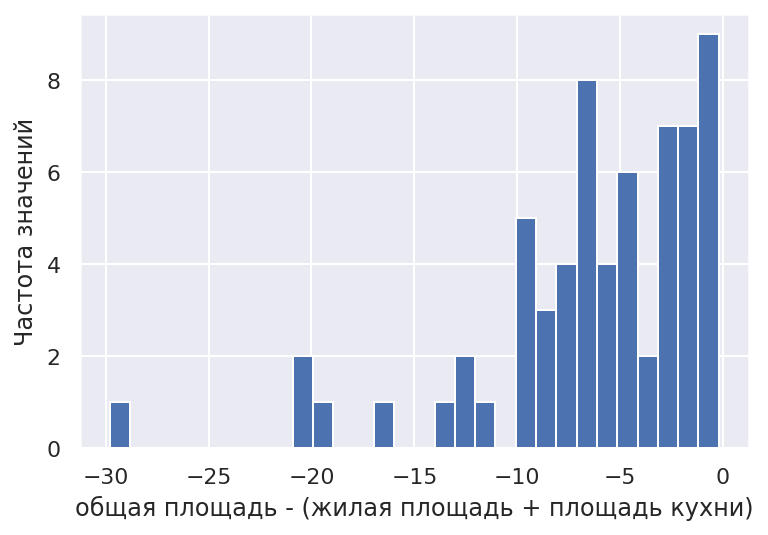

In [61]:
# Посмотрим на распределение ошибок площади
temp = df[df.total_area < df.kitchen_area + df.living_area]
(temp.total_area - (temp.kitchen_area + temp.living_area)).hist(bins=30)
plt.xlabel('общая площадь - (жилая площадь + площадь кухни)')
plt.ylabel('Частота значений')
plt.show()

Ошибки в площади достигают целых 30квм. Невозможно узнать была ли ошибка в общей площади, площади кухни, жилой площади или во всех сразу. Поэтому оставим объекты с ошибкой меньше 2квм, заменив общую площадь на сумму площади кухни и жилой площади и удалим остальные.

In [62]:
temp['error'] = (temp.total_area - (temp.kitchen_area + temp.living_area))
temp['result'] = np.where(temp['error'] > -2, temp.kitchen_area + temp.living_area, np.NaN)
df.loc[temp.index, 'total_area'] = temp['result']

In [63]:
df['total_area'].isna().sum()

52

In [64]:
# Проверяем исправление данных
df[df.total_area < df.kitchen_area + df.living_area].shape[0]

0

In [65]:
df = df.dropna(subset=['total_area'])
# Проверяем удаление пропусков
df.total_area.isna().sum()

0

Проверим, что среди остальных признаков, к которым мы будем обращаться, отсутствуют чистые аномалии (знчения, невозможные по своей природе).

In [66]:
(
    df[['last_price', 'total_area',
       'rooms', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition',]]
    .apply (['count', 'min', 'max']).T
    .style.format("{:,.2f}")
)

Как видим больше явных чисто аномальных значений среди данных нет, например нулевых или отрицательных значений, где он ине могут быть.
<br>
Однако минимальное значение `last_price` - 12 190 ₽ выглядит очень странно, посмотрим насколько это типично малое значение:

In [67]:
df['last_price'].value_counts().sort_index().head()

12190     1
430000    2
440000    1
450000    4
470000    3
Name: last_price, dtype: int64

Это значение определенно выбивается из всей выборки, посмотрим на него поближе:

In [68]:
df[df['last_price'] == 12190].T

8793
total_images                            7
last_price                          12190
total_area                          109.0
first_day_exposition  2019-03-20 00:00:00
rooms                                   2
ceiling_height                       2.75
floors_total                         25.0
living_area                          32.0
floor                                  25
studio                              False
open_plan                           False
kitchen_area                         40.5
balcony                                 0
locality_name             Санкт-Петербург
airports_nearest                  36421.0
cityCenters_nearest                9176.0
parks_around3000                      1.0
parks_nearest                       805.0
ponds_around3000                      0.0
ponds_nearest                         NaN
days_exposition                       8.0

Учитывая площадь 109квм и раположение Санкт-Петербург, похоже, что вместо 12 190 ₽ должно быть 12 190 000 ₽. Проверим  квартиры с такой же площадью.

In [69]:
df[df['total_area'] == 109].last_price.agg(['count', 'mean', 'median']).astype(int)

count           22
mean      15074008
median    13350000
Name: last_price, dtype: int64

Действительно порядок цен подсказывает, что догадка была верной, исправим данные:

In [70]:
df.loc[8793, 'last_price'] = df.loc[8793, 'last_price'] * 1000

### Feature engineering

Добавим следующие значения:
- цена одного квадратного метра
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние до центра города в километрах

In [74]:
df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  studio  ...  \
0            2.70          16.0         51.0      8   False  ...   
1             NaN          11.0         18.6      1   False  ...   
2             NaN           5.0         34.3      4   False  ...   
3             NaN          14.0          NaN      9   False  ...   
4            3.03          14.0         32.0     13   False  ...   

   kitchen_area  balcony    locality_name airports_nearest  \
0          25.0        0  Санкт-Петербург          18863.0   
1          11.0        2   посёлок Шушары          12817.0   
2           8.3        0  Санкт-Петербург          21741.0   
3           NaN        0  Санкт-Петербург          28098.0   
4          41.0        0  Санкт-Петербург          31856.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 21 columns]

In [75]:
# Добавим информацию о цене квадратного метра, округленной до целого
df['sqm_cost'] = (df['last_price'] / df['total_area']).round().astype(int)

In [76]:
df['sqm_cost']

0        120370
1         82921
2         92786
3        408176
4        100000
          ...  
23694     72491
23695     52542
23696     44092
23697    149511
23698     41796
Name: sqm_cost, Length: 23646, dtype: int64

In [77]:
# Разобъем по дням недели, месяцам и годам
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] =  df['first_day_exposition'].dt.month
df['year'] =  df['first_day_exposition'].dt.year

In [78]:
df['floor'].value_counts().sort_index().head()

1    2914
2    3364
3    3065
4    2802
5    2614
Name: floor, dtype: int64

In [79]:
# Создадим категории этажей
conditions = [
    df["floor"] == 1,
    (df["floor"] != 1)&(df["floor"] == df["floors_total"]),
    (df["floor"] != 1)&(df["floor"] < df["floors_total"])
]
values = ["первый", "последний", "другой"]

df["floor_category"] = np.select(
    conditions, 
    values, 
    default=np.nan
)

In [80]:
df["floor_category"].value_counts()

другой       17327
последний     3322
первый        2914
nan             83
Name: floor_category, dtype: int64

In [81]:
# Добавим расстояние до центра города преобразованное в километры
df["cityCenters_km"] = (df["cityCenters_nearest"] / 1000).round()

In [82]:
df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  studio  ...  \
0            2.70          16.0         51.0      8   False  ...   
1             NaN          11.0         18.6      1   False  ...   
2             NaN           5.0         34.3      4   False  ...   
3             NaN          14.0          NaN      9   False  ...   
4            3.03          14.0         32.0     13   False  ...   

   parks_nearest  ponds_around3000  ponds_nearest days_exposition  sqm_cost  \
0          482.0               2.0          755.0             NaN    120370   
1            NaN               0.0            NaN            81.0     82921   
2           90.0               2.0          574.0           558.0     92786   
3           84.0               3.0          234.0           424.0    408176   
4          112.0               1.0           48.0           121.0    100000   

   weekday  month  year  floor_category  cityCenters_km  
0        3      3  2019          другой            16.0  
1        1     12  2018          первый            19.0  
2        3      8  2015          другой            14.0  
3        4      7  2015          другой             7.0  
4        1      6  2018          другой             8.0  

[5 rows x 27 columns]

### EDA

#### Рассмотрим подробнее следующие признаки:

##### общая площадь

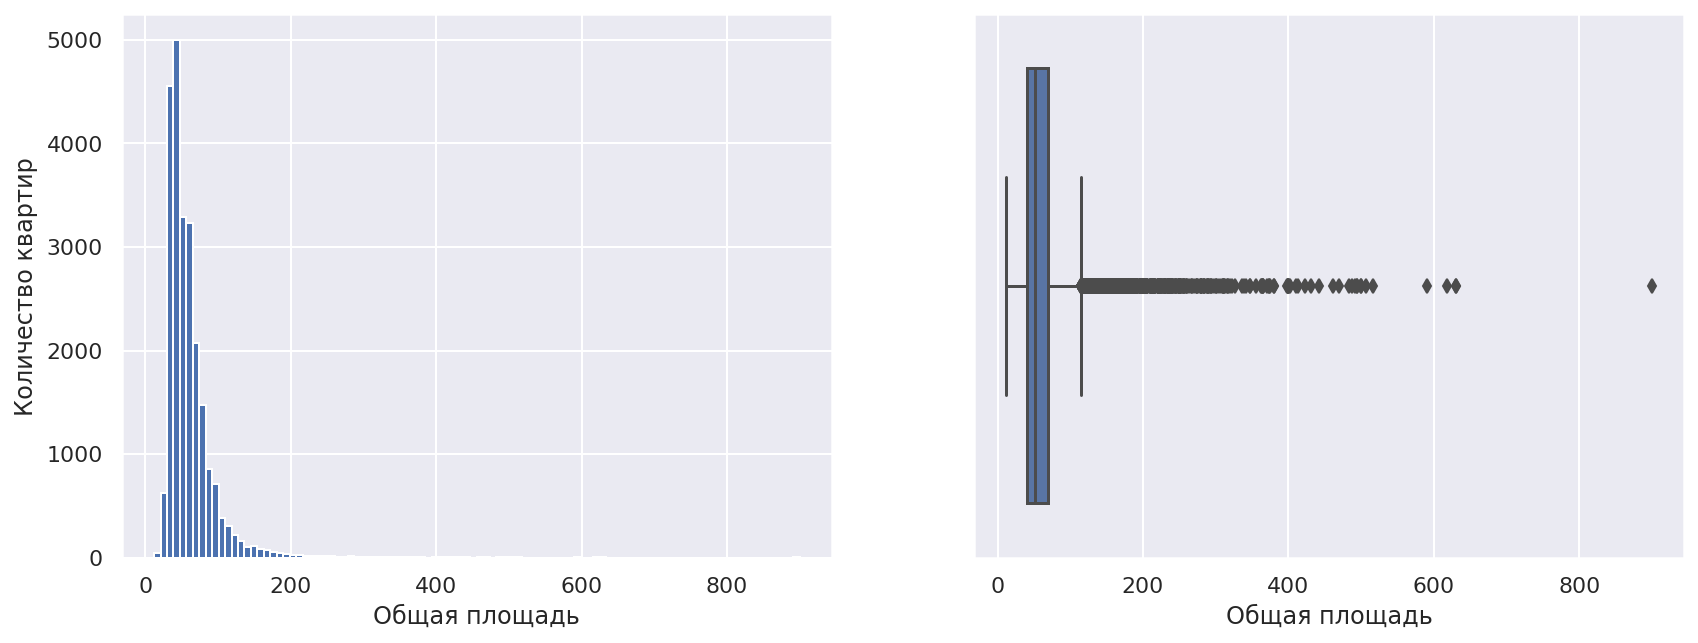

In [83]:
# Построим гистограмму и диаграмму рассеивания для общей площади
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)

df['total_area'].hist(bins=100, ax=ax1)
sns.boxplot(x="total_area", data=df, orient='x', ax=ax2)
ax1.set(xlabel='Общая площадь', ylabel='Количество квартир')
ax2.set(xlabel='Общая площадь')
plt.show()

Как видно, существуют значения площадей, больше, чем почти вся остальная часть выборки. Подавляющее большинство значений находится до 200квм. Отрежем значения выше 200квм и посмотрим на распределение ближе.

52.0

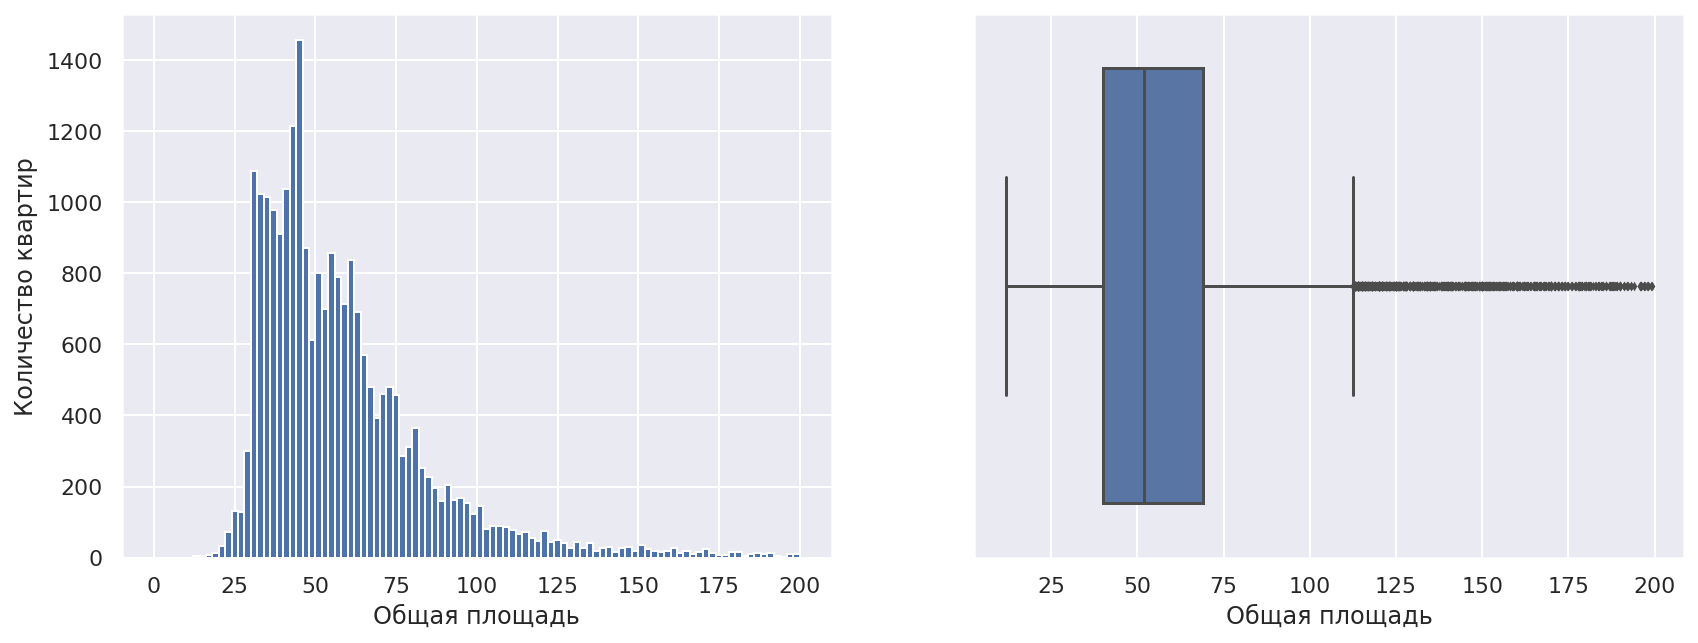

In [84]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)
df['total_area'].hist(bins=100, range=(0, 200), ax=ax1)
sns.boxplot(x="total_area", data=df[df['total_area'] < 200], orient='x', ax=ax2, fliersize=2)
ax1.set(xlabel='Общая площадь', ylabel='Количество квартир')
ax2.set(xlabel='Общая площадь')
df['total_area'].median()

Судя по новым графикам, значения редко выходят даже за 115квм. Большинство сконцентрировано от 25 до 100квм. Медиана равна 52квм. Также интересно будет посмотреть на характер зависимости общей площади от количества комнат.

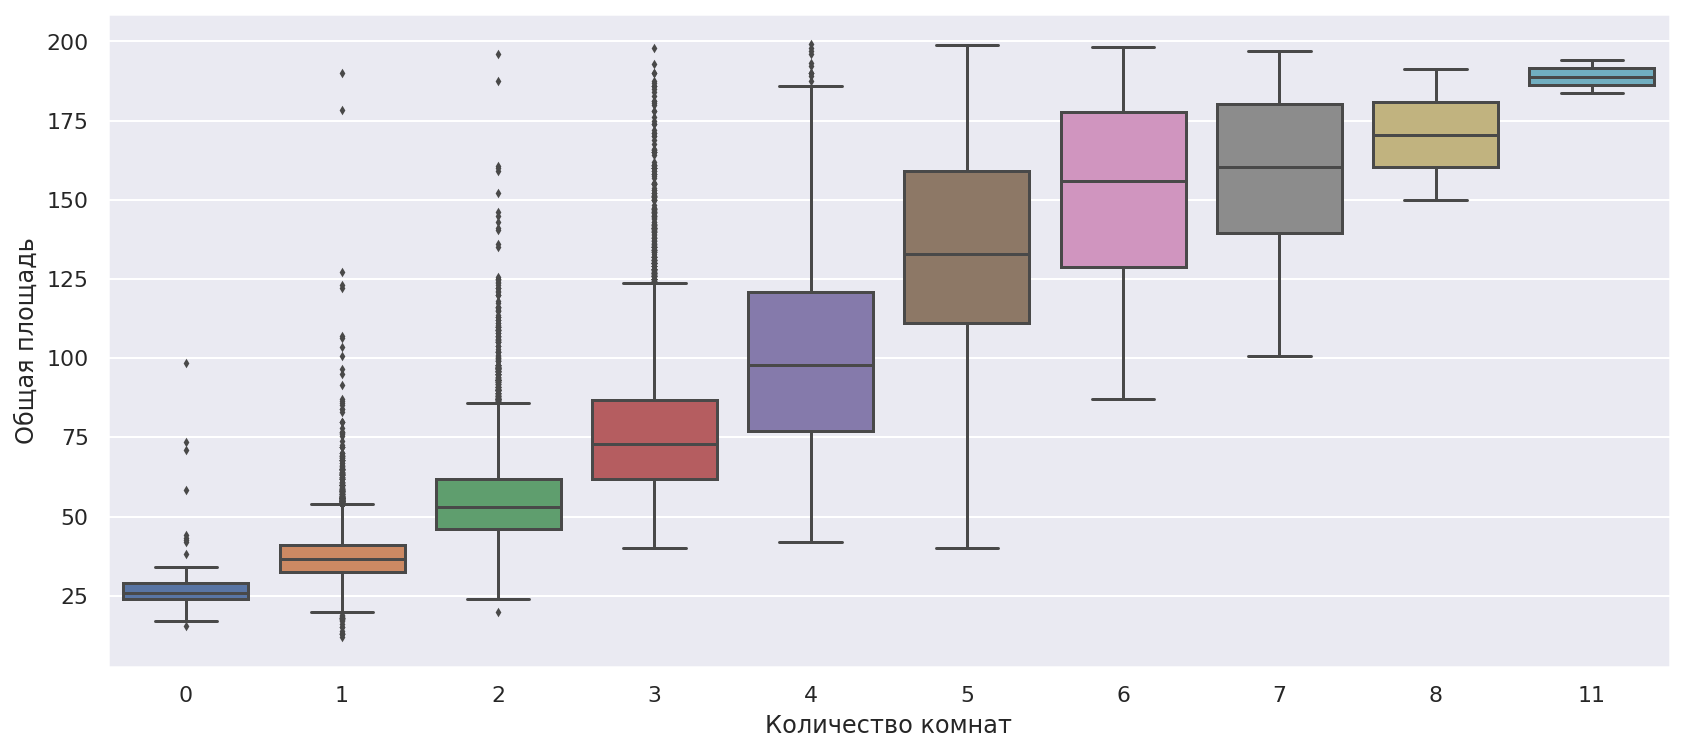

In [85]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='rooms', y="total_area", data=df[df['total_area'] < 200], fliersize=2)
plt.xlabel('Количество комнат')
plt.ylabel('Общая площадь')
plt.show()

Очевидно, что с увеличением комнат также растет и площадь. Интерсное же наблюдение -  с ростом комнат увеличивается дисперсии площади.
<br>
Вероятно, распределение жилой площади и площади кухни будет очень похожее, однако посмотрим на них отдельно, как минимум, для установления диапазона характерных значений.

##### жилая площадь

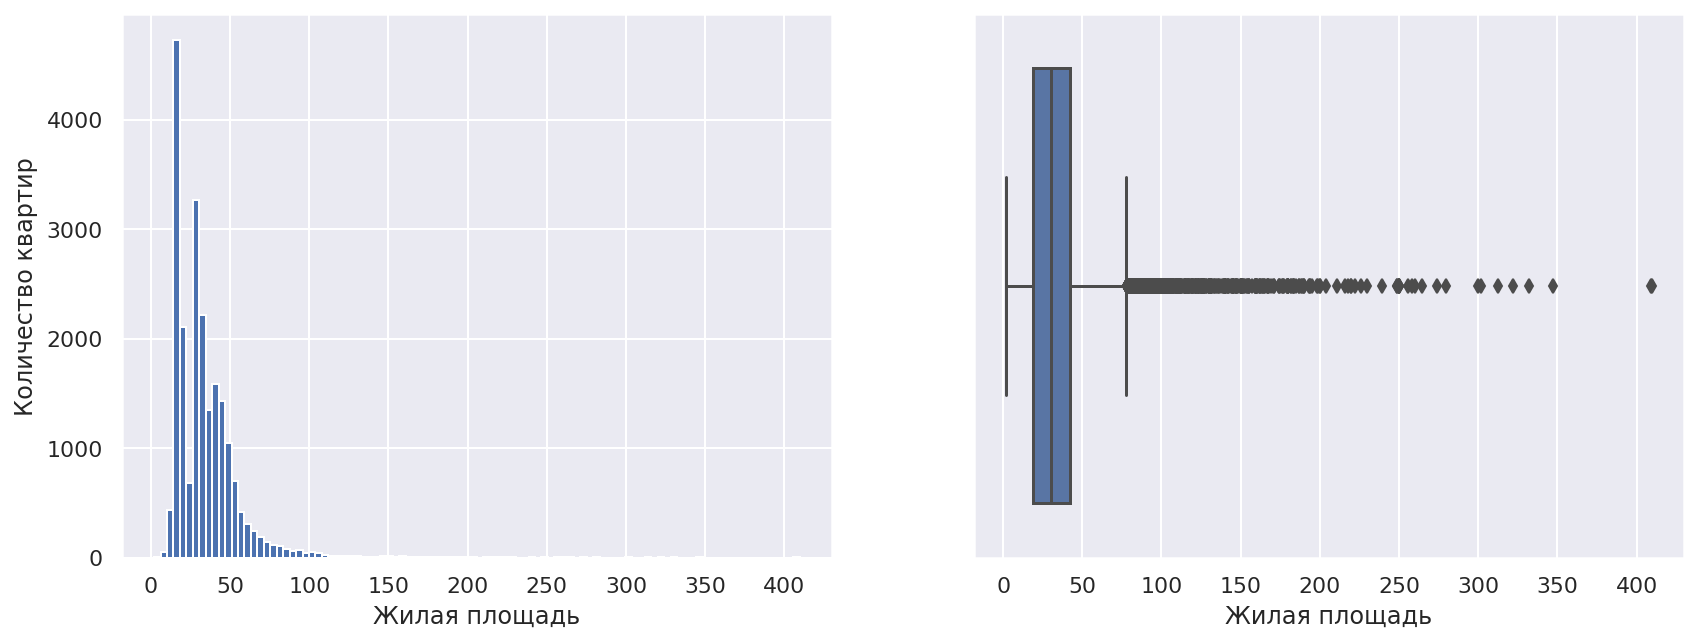

In [86]:
# Построим гистограмму и диаграмму рассеивания для жилой площади
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)

df['living_area'].hist(bins=100, ax=ax1)
sns.boxplot(x="living_area", data=df, orient='x', ax=ax2)
ax1.set(xlabel='Жилая площадь', ylabel='Количество квартир')
ax2.set(xlabel='Жилая площадь')
plt.show()

Как и ожидалось, распределение очень похоже на общую площадь. Существуют значения, больше, чем почти вся остальная часть выборки. Подавляющее большинство значений находится до 100квм. Отрежем значения выше 100квм и посмотрим на распределение ближе.

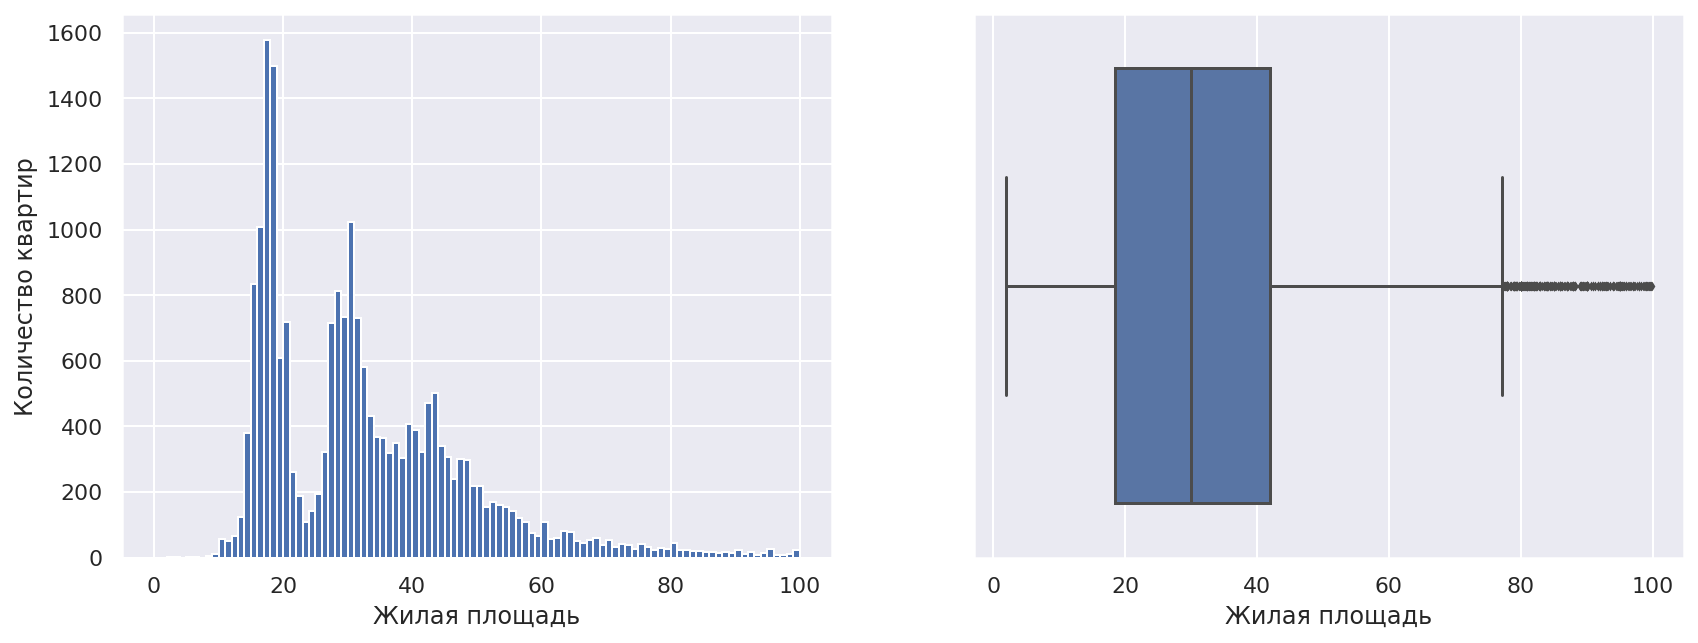

In [87]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)

df['living_area'].hist(bins=100, range=(0, 100), ax=ax1)
sns.boxplot(x="living_area", data=df[df['living_area'] < 100], orient='x', ax=ax2, fliersize=2)
df['living_area'].median()
ax1.set(xlabel='Жилая площадь', ylabel='Количество квартир')
ax2.set(xlabel='Жилая площадь')
plt.show()

Судя по новым графикам, значения редко выходят даже за 60квм. Большинство сконцентрировано от 15 до 60. Медиана равна 30квм. Есть одно отличие от общей площади - здесь на гистограмме два отчетливых пика на значениях около 18квм и 30квм, видимо много типовых застроек имеют схожие квадратуру и планировку.

##### площадь кухни

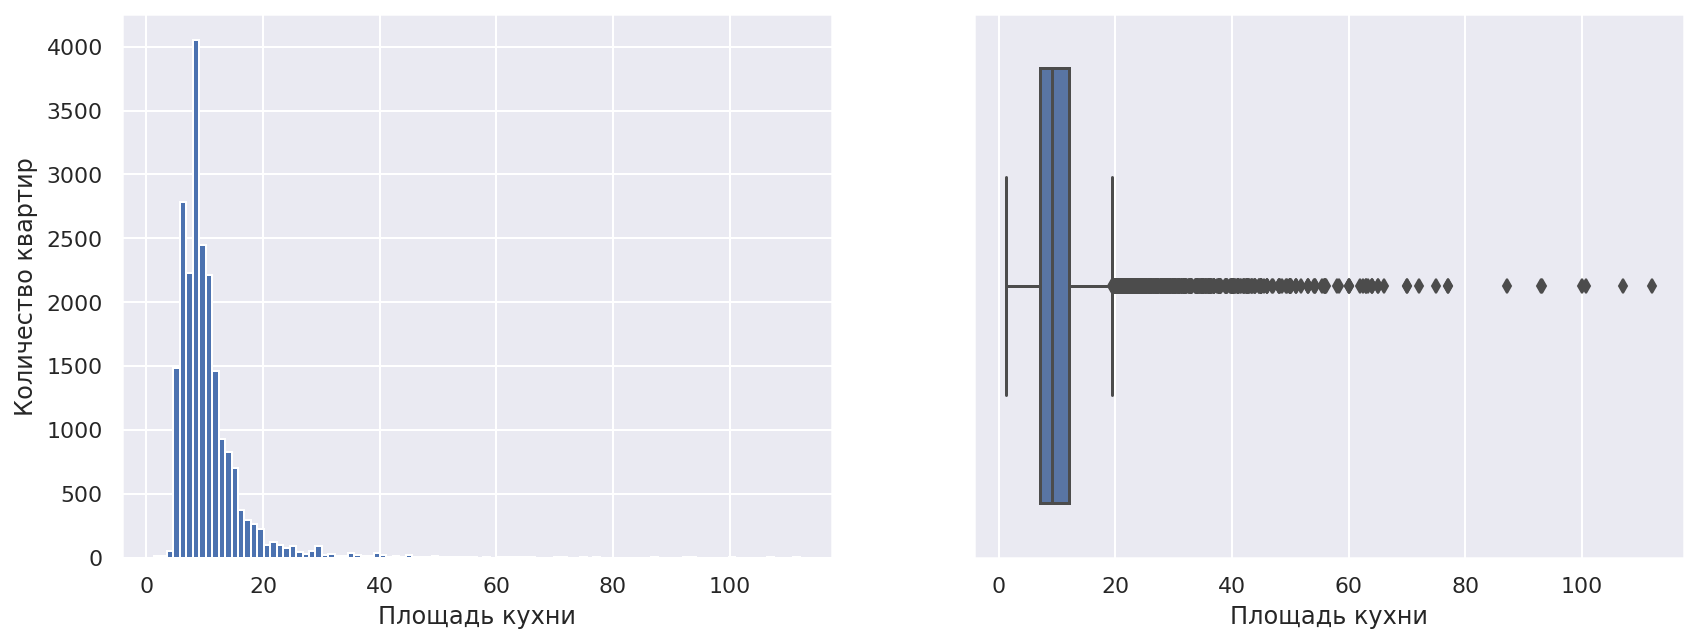

In [88]:
# Построим гистограмму и диаграмму рассеивания для площади кухни
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)

df['kitchen_area'].hist(bins=100, ax=ax1)
sns.boxplot(x="kitchen_area", data=df, orient='x', ax=ax2)
ax1.set(xlabel='Площадь кухни', ylabel='Количество квартир')
ax2.set(xlabel='Площадь кухни')
plt.show()

Распределение также похоже на общую площадь. Существуют значения, больше, чем почти вся остальная часть выборки. Подавляющее большинство значений находится до 30квм. Отрежем значения выше 30квм и посмотрим на распределение ближе.

9.1

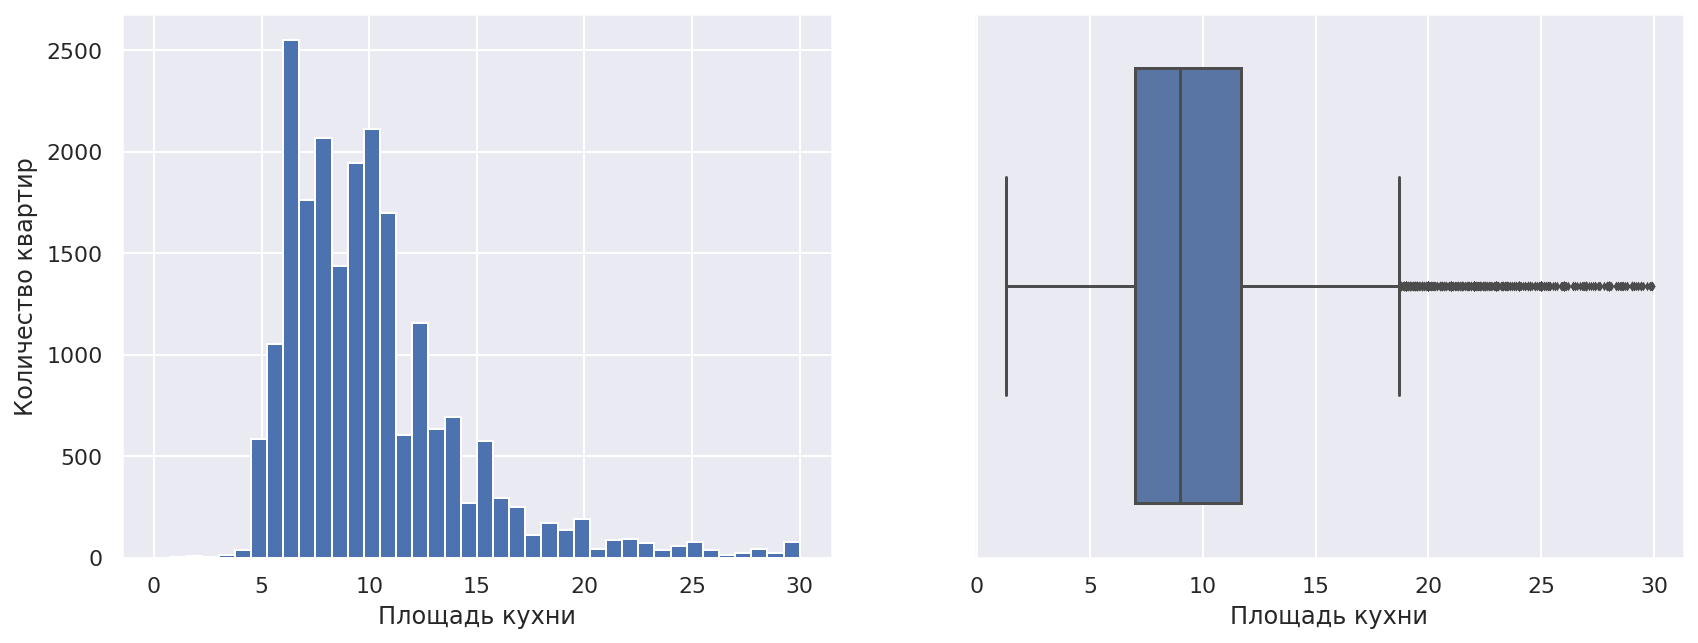

In [89]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)

df['kitchen_area'].hist(bins=40, range=(0, 30), ax=ax1)
sns.boxplot(x="kitchen_area", data=df[df['kitchen_area'] < 30], orient='x', ax=ax2, fliersize=2)
ax1.set(xlabel='Площадь кухни', ylabel='Количество квартир')
ax2.set(xlabel='Площадь кухни')
df['kitchen_area'].median()

Судя по новым графикам, значения редко выходят даже за 18квм. Большинство сконцентрировано от 5 до 18квм. Медиана равна 9квм. На гистограмме можно заметить много зубцов, но, вероятно, это результат меньшего размаха значений, чем в предыдущих площадях.

##### цена объекта

763000000

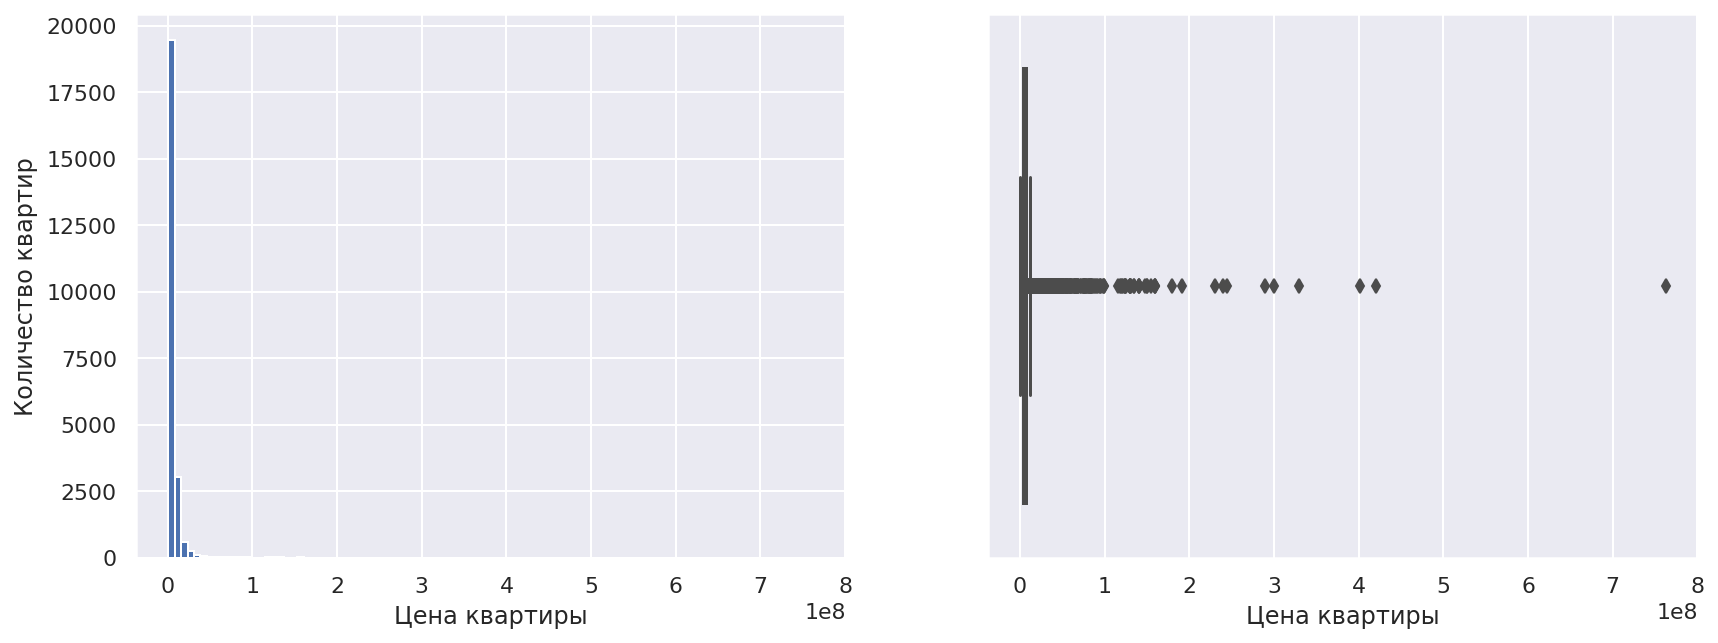

In [90]:
# Построим гистограмму и диаграмму рассеивания для цены объекта
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)

df['last_price'].hist(bins=100, ax=ax1)
sns.boxplot(x="last_price", data=df, orient='x', ax=ax2)
ax1.set(xlabel='Цена квартиры', ylabel='Количество квартир')
ax2.set(xlabel='Цена квартиры')
df['last_price'].max()

Разброс значений цены еще больше, чем разброс площадей. Например, в выборке есть кватрира с ценой 763млн ₽. Чтобы увидеть распределение значений подавляющего большинства объектов, надо избавиться от таких выбросов. Возьмем значения, не превышающие 30млн ₽.

(4600000.0, 4650000.0)

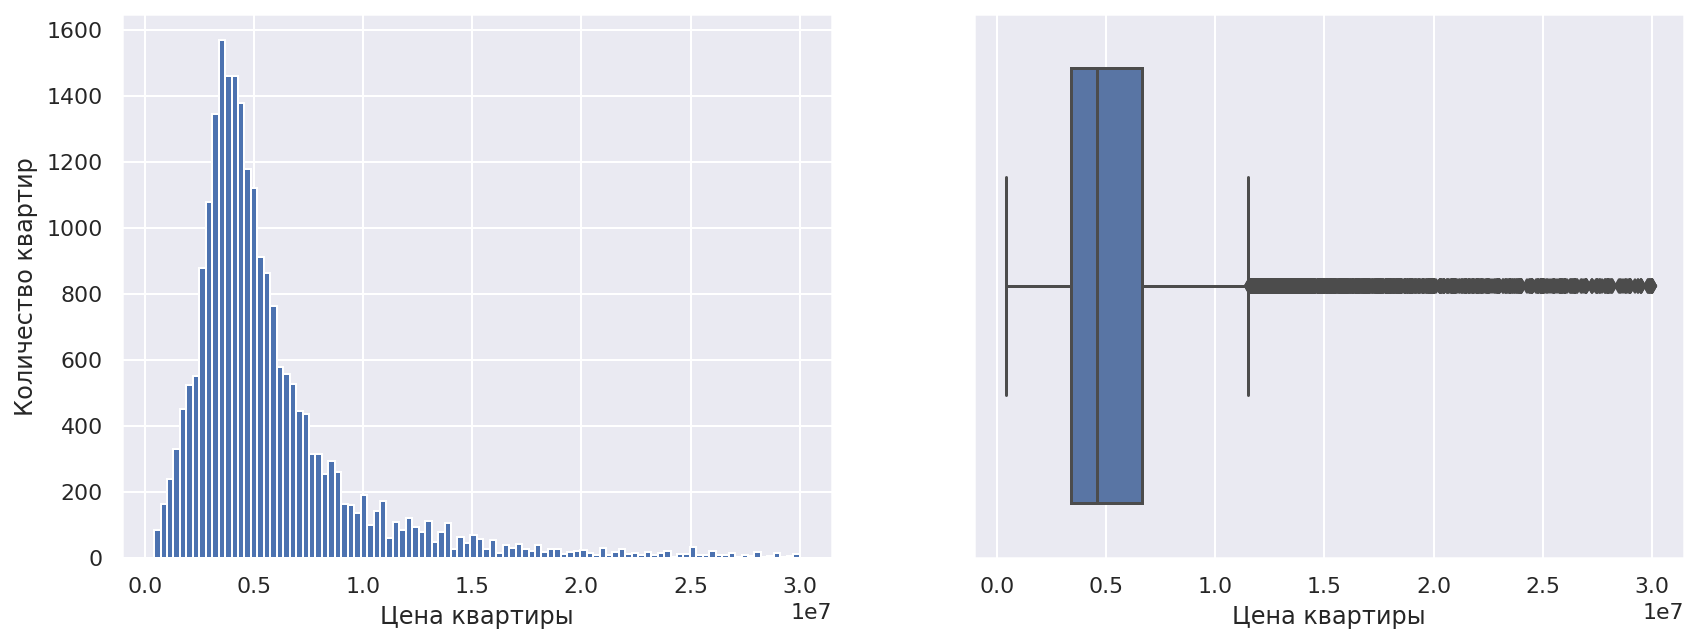

In [91]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)
temp = df[df['last_price']< 30000000]
temp['last_price'].hist(bins=100, ax=ax1)
sns.boxplot(x="last_price", data=temp, orient='x', ax=ax2)
ax1.set(xlabel='Цена квартиры', ylabel='Количество квартир')
ax2.set(xlabel='Цена квартиры')
temp['last_price'].median(), df['last_price'].median()

Итак, большинство значений меньше 12млн ₽. Медиана равна 4.6млн ₽, но есть не единичные значения доходящие до 30млн₽ и выше.

##### количество комнат

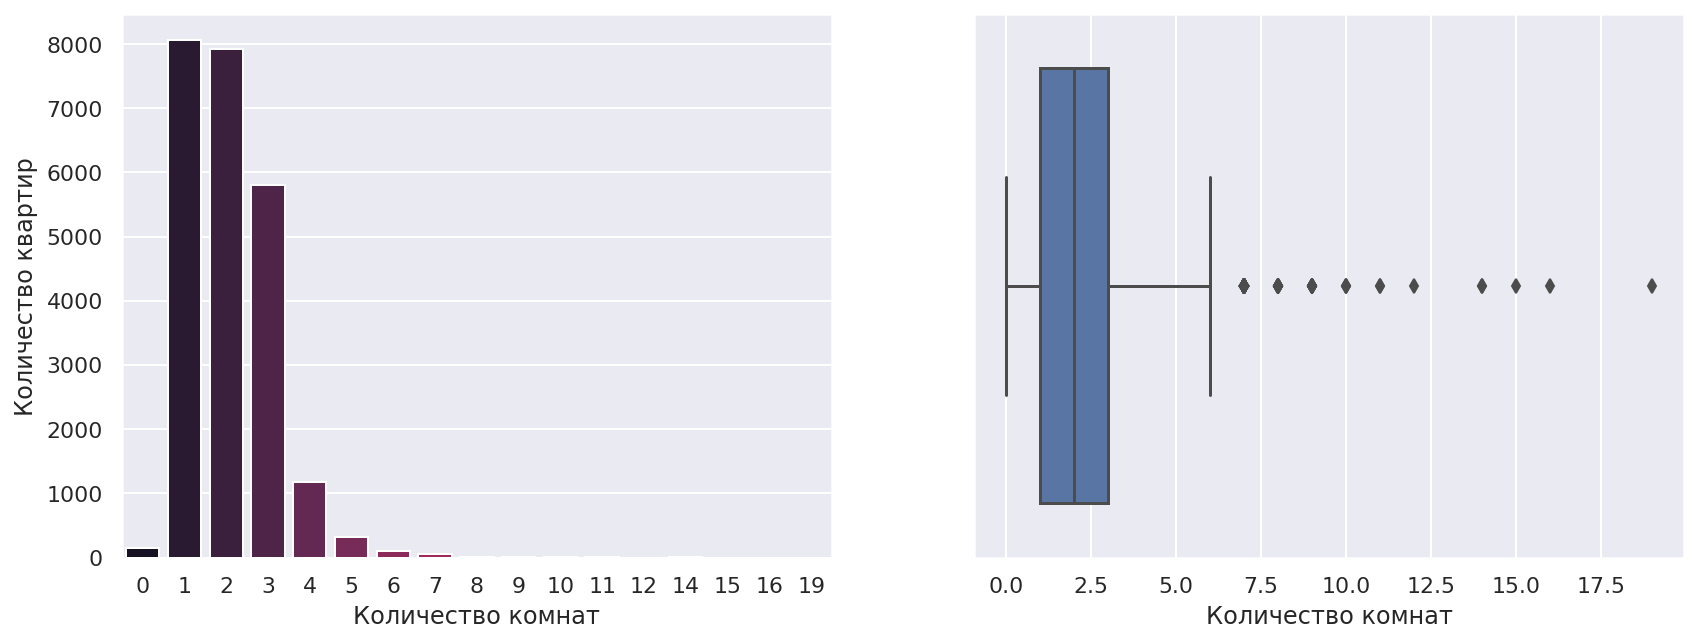

In [92]:
# Построим barplot и диаграмму рассеивания для количества комнат
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)
temp = df['rooms'].value_counts()
sns.barplot(x=temp.index, y=temp, palette="rocket", ax=ax1)
sns.boxplot(x='rooms', data=df, orient='x', ax=ax2)
ax1.set(xlabel='Количество комнат', ylabel='Количество квартир')
ax2.set(xlabel='Количество комнат')
plt.show()

Квартир с 8-ю и больше комнатами почти не присутствует в выборке, отбросим их.

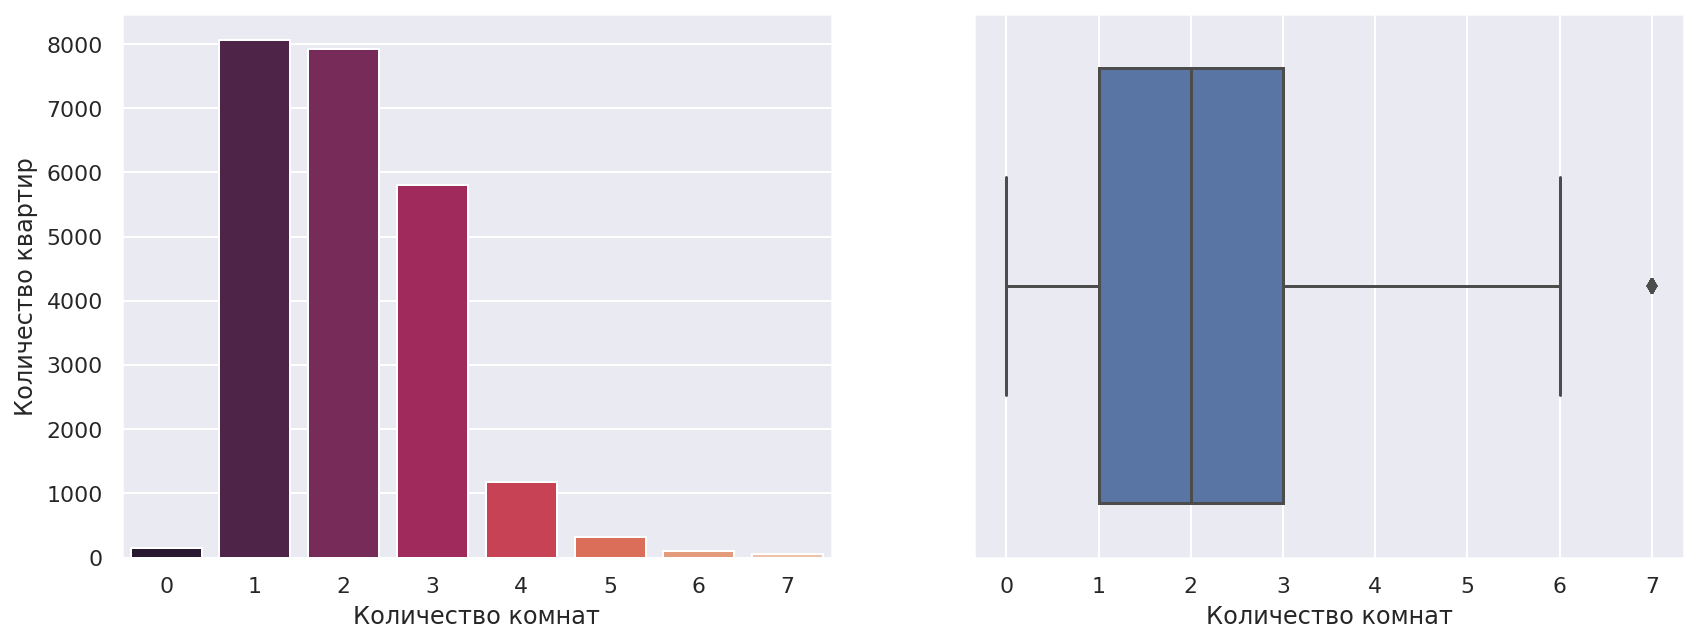

In [93]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)
temp = df['rooms'].value_counts()[:8]
sns.barplot(x=temp.index, y=temp, palette="rocket", ax=ax1)
sns.boxplot(x='rooms', data=df[df['rooms'] < 8], orient='x', ax=ax2)
ax1.set(xlabel='Количество комнат', ylabel='Количество квартир')
ax2.set(xlabel='Количество комнат')
plt.show()

Большинство квартир одно-, двух- или трехкомнатные.

##### высота потолков

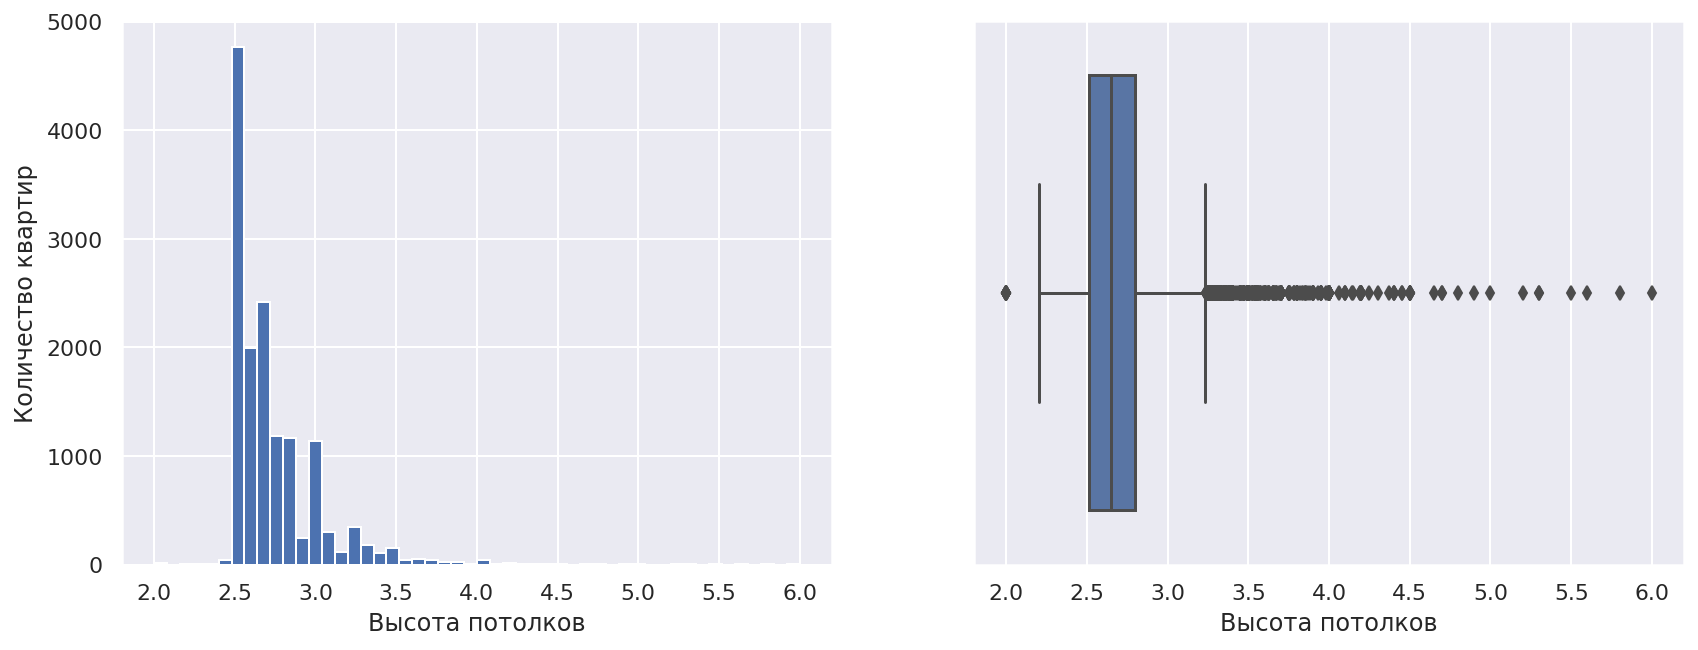

In [94]:
# Построим гистограмму и диаграмму рассеивания для высоты потолков
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)

df['ceiling_height'].hist(bins=50, ax=ax1)
sns.boxplot(x="ceiling_height", data=df, orient='x', ax=ax2)
ax1.set(xlabel='Высота потолков', ylabel='Количество квартир')
ax2.set(xlabel='Высота потолков')
plt.show()

Отрежем значения выше 4м.

2.65

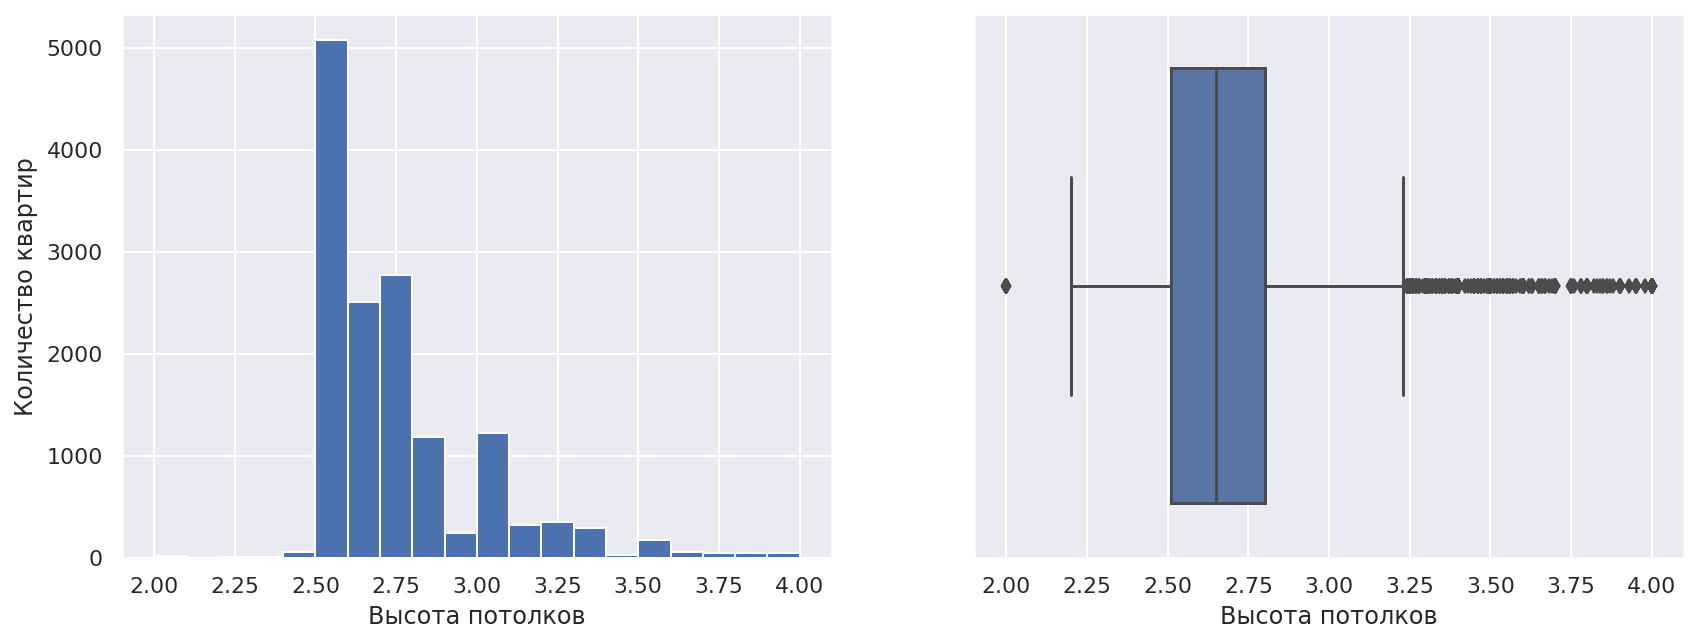

In [95]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)
temp = df[df['ceiling_height'] <= 4]
temp['ceiling_height'].hist(bins=20, ax=ax1)
sns.boxplot(x="ceiling_height", data=temp, orient='x', ax=ax2)
ax1.set(xlabel='Высота потолков', ylabel='Количество квартир')
ax2.set(xlabel='Высота потолков')
df['ceiling_height'].median()

In [96]:
df['ceiling_height'].value_counts().head(10)

2.50    3516
2.60    1645
2.70    1576
3.00    1112
2.80     988
2.55     980
2.75     907
2.65     674
3.20     278
3.10     202
Name: ceiling_height, dtype: int64

Бóльшая часть значений находится между 2.5м и 3м включительно. Мода - 2.5м встречается более, чем в 2 раза чаще, чем любое другое значение.

##### этажность

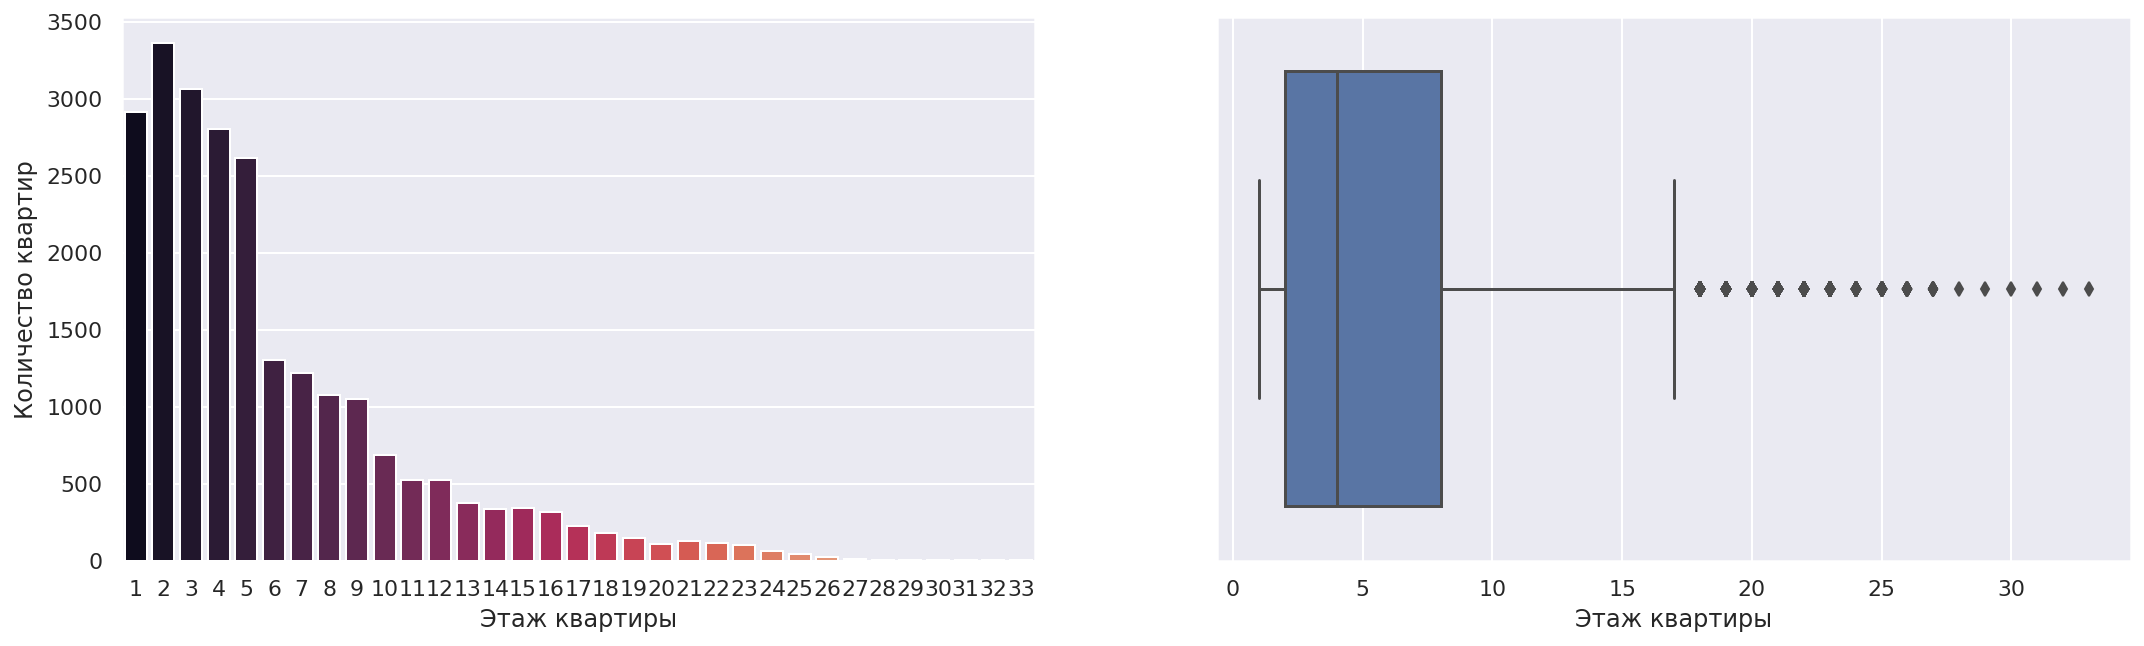

In [97]:
# Построим barplot и диаграмму рассеивания для этажа квартиры
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(18, 5)
)
temp = df['floor'].value_counts()
sns.barplot(x=temp.index, y=temp, palette="rocket", ax=ax1)
sns.boxplot(x='floor', data=df, orient='x', ax=ax2)
ax1.set(xlabel='Этаж квартиры', ylabel='Количество квартир')
ax2.set(xlabel='Этаж квартиры')
plt.show()

Большинтсво квартир находится не выше 5 этажей, что, вероятно, говорит о том, что этажность большинства жилых домов не превышает 5 этажей. Проверим это:

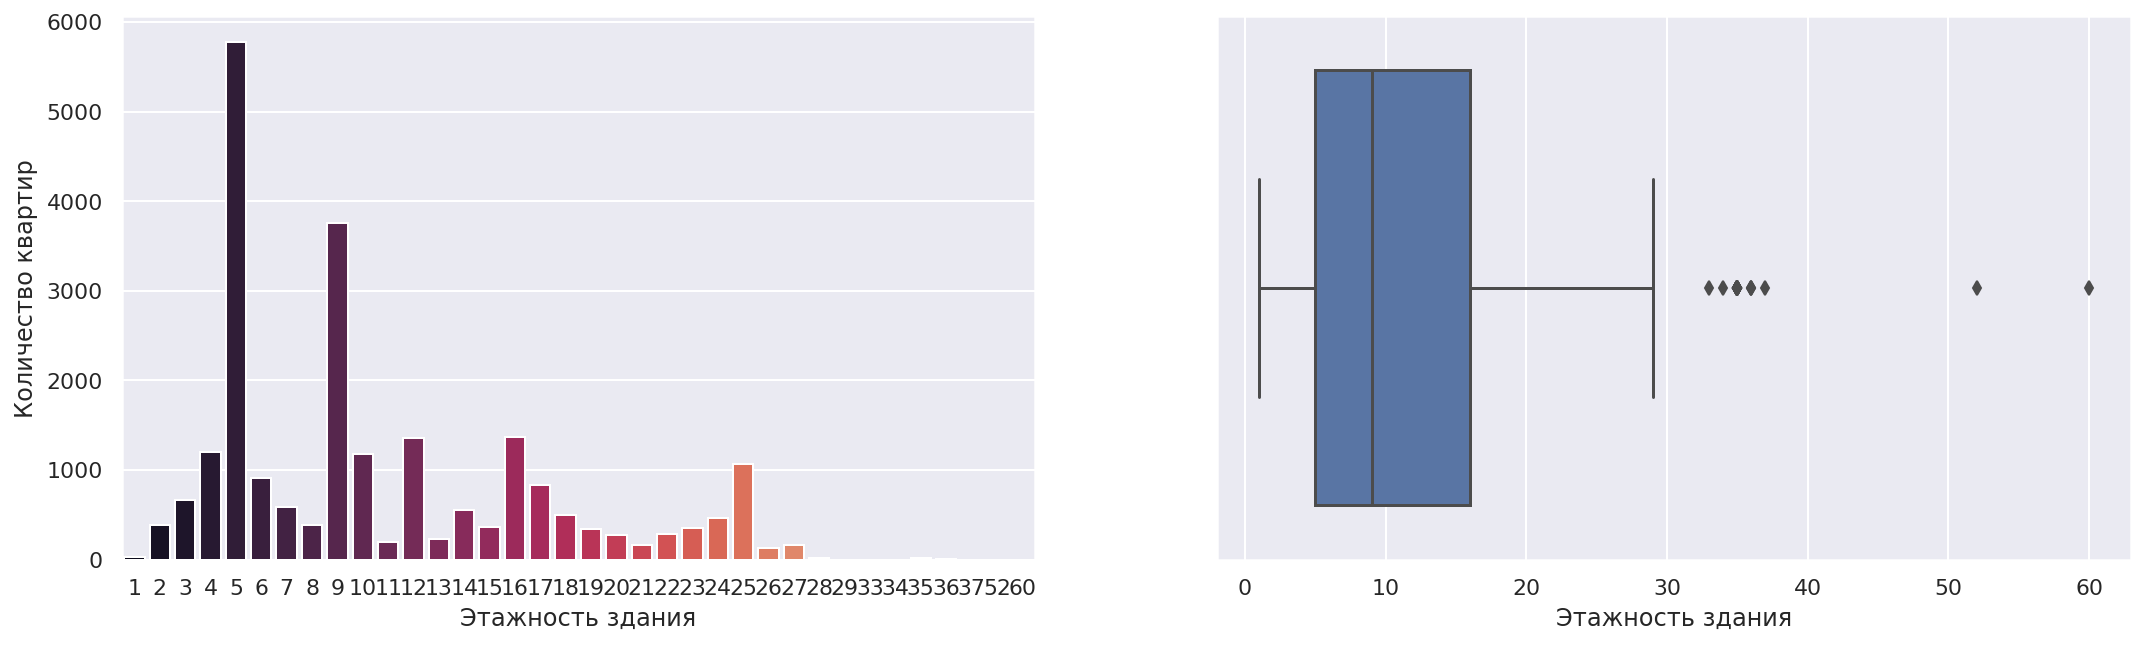

In [98]:
# Построим barplot и диаграмму рассеивания для этажности здания
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(18, 5)
)
temp = df['floors_total'].value_counts()
temp.index = temp.index.astype(int)
sns.barplot(x=temp.index, y=temp, palette="rocket", ax=ax1)
sns.boxplot(x='floors_total', data=df, orient='x', ax=ax2)
ax1.set(xlabel='Этажность здания', ylabel='Количество квартир')
ax2.set(xlabel='Этажность здания')
plt.show()

Действительно, пятиэтажных и девятиэтажных зданий значительно больше, чем любых других. А зданий выше 27 этажей практически нет в выборке.

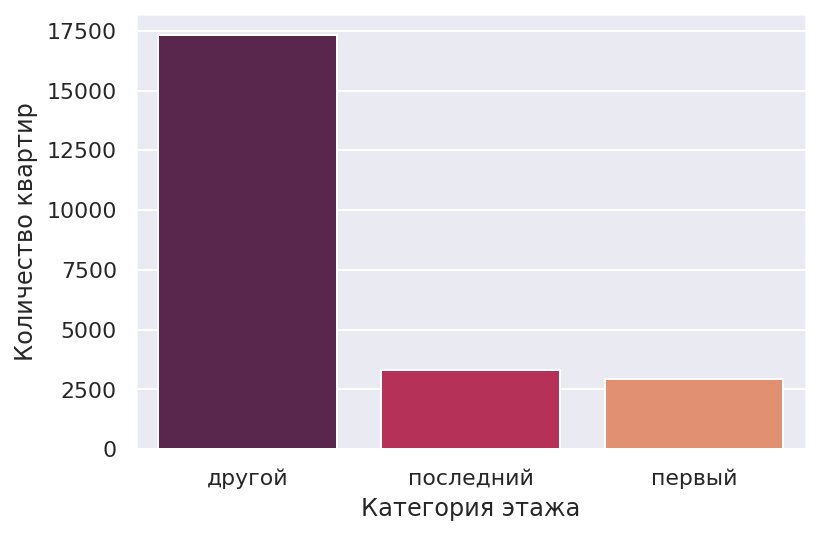

In [99]:
temp = df['floor_category'].value_counts()[:3]
sns.barplot(x=temp.index, y=temp, palette="rocket")
plt.xlabel('Категория этажа')
plt.ylabel('Количество квартир')
plt.show()

Распределение категории этажа полностью ожидаемо - квартир на последнем этаже лишь незначительно больше, чем на первом. Большинство квартир расположены между.

##### расстояние до центра города в метрах

13094.0

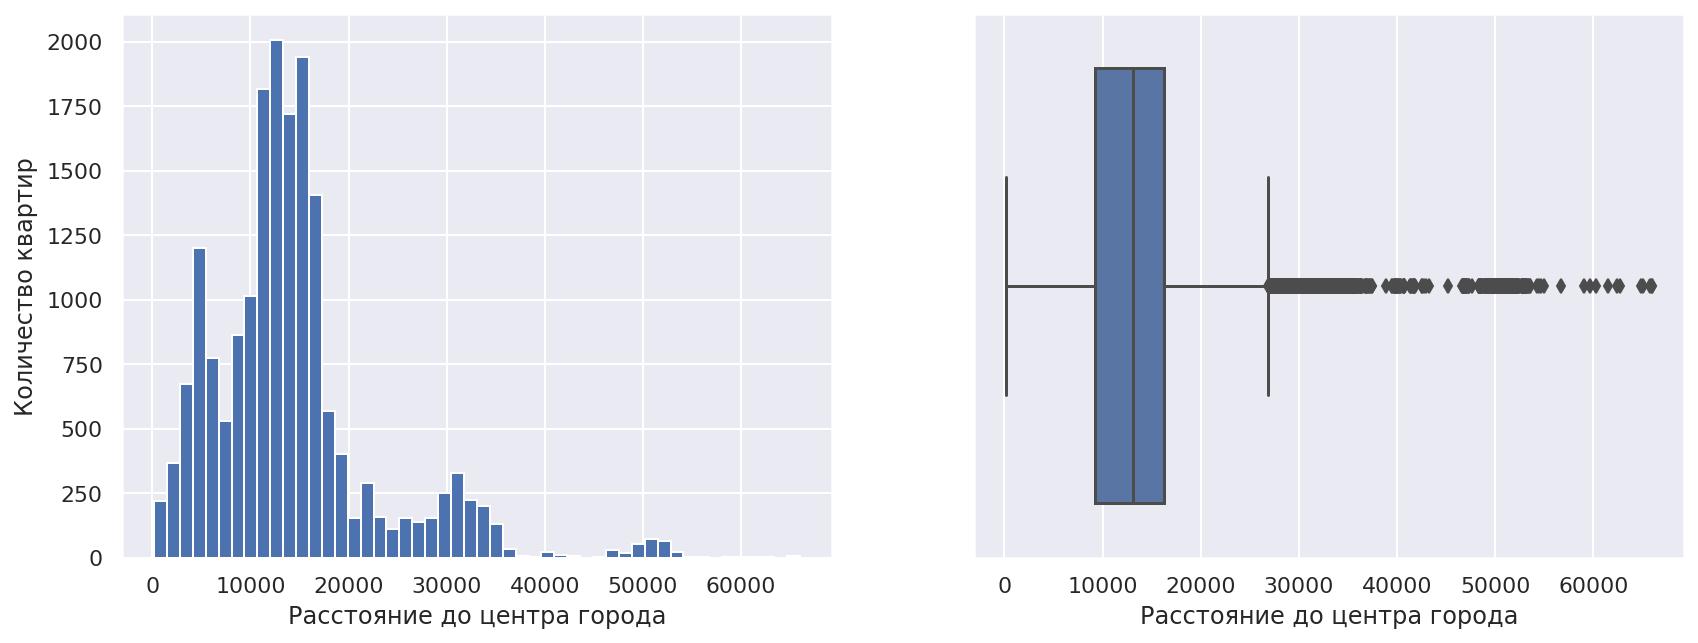

In [100]:
# Построим гистограмму и диаграмму рассеивания для расстояние до центра города
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)

df['cityCenters_nearest'].hist(bins=50, ax=ax1)
sns.boxplot(x="cityCenters_nearest", data=df, orient='x', ax=ax2)
ax1.set(xlabel='Расстояние до центра города', ylabel='Количество квартир')
ax2.set(xlabel='Расстояние до центра города')
df['cityCenters_nearest'].median()

Медиана совпадает с пиком гистограммы - 13км до центра города. Есть второй пик, значительно ниже первого, на отметке 5км до центра города.

##### расстояние до ближайшего аэропорта

26725.5

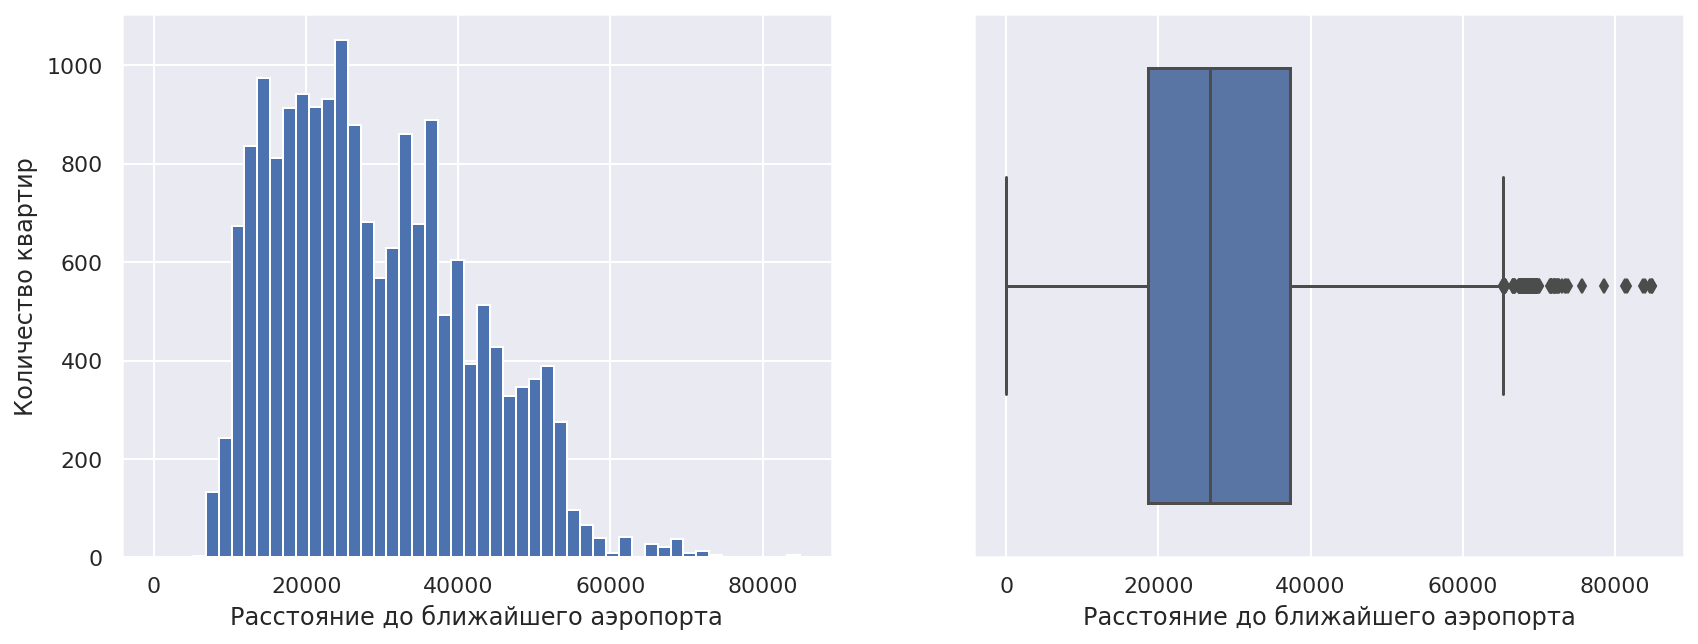

In [101]:
# Построим гистограмму и диаграмму рассеивания для расстояния до ближайшего аэропорта
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)

df['airports_nearest'].hist(bins=50, ax=ax1)
sns.boxplot(x="airports_nearest", data=df, orient='x', ax=ax2)
ax1.set(xlabel='Расстояние до ближайшего аэропорта', ylabel='Количество квартир')
ax2.set(xlabel='Расстояние до ближайшего аэропорта')
df['airports_nearest'].median()

In [102]:
df['airports_nearest'].sort_values()

21085       0.0
4017     6450.0
12899    6450.0
7778     6914.0
23150    6949.0
          ...  
23683       NaN
23692       NaN
23695       NaN
23696       NaN
23698       NaN
Name: airports_nearest, Length: 23646, dtype: float64

Почти все значения находятся между 6.5 и 60км. Медиана - 26.7км. На гистограмме нет ярких и узких пиков, значения распределены относительно равномерно, по сравнению с остальными характеристиками.

##### расстояние до ближайшего парка

455.0

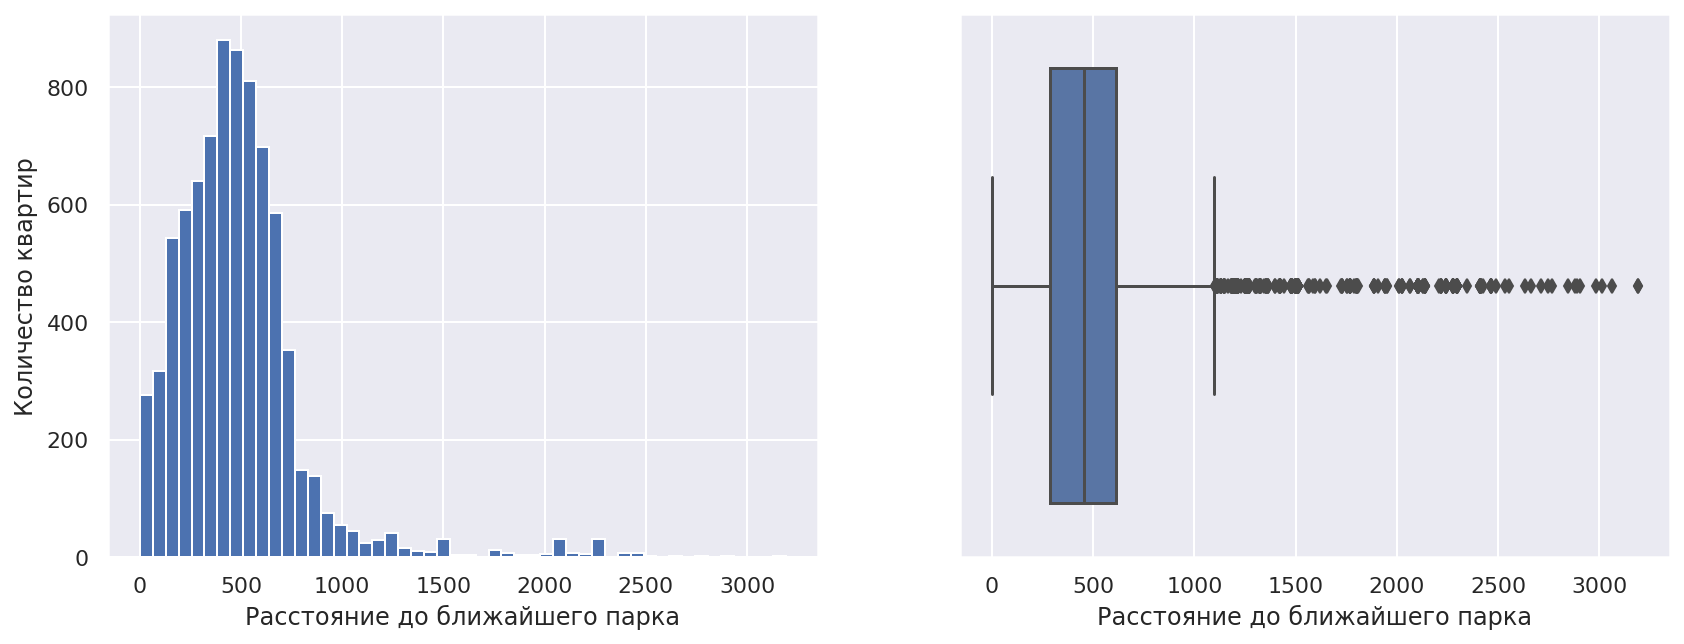

In [103]:
# Построим гистограмму и диаграмму рассеивания для расстояния до ближайшего парка
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)

df['parks_nearest'].hist(bins=50, ax=ax1)
sns.boxplot(x="parks_nearest", data=df, orient='x', ax=ax2)
ax1.set(xlabel='Расстояние до ближайшего парка', ylabel='Количество квартир')
ax2.set(xlabel='Расстояние до ближайшего парка')
df['parks_nearest'].median()

Большинство значений не превышает 800м. Медиана совпадает с пиком гистограммы - 455м до ближайшего парка.

##### месяц  и день публикации объявления

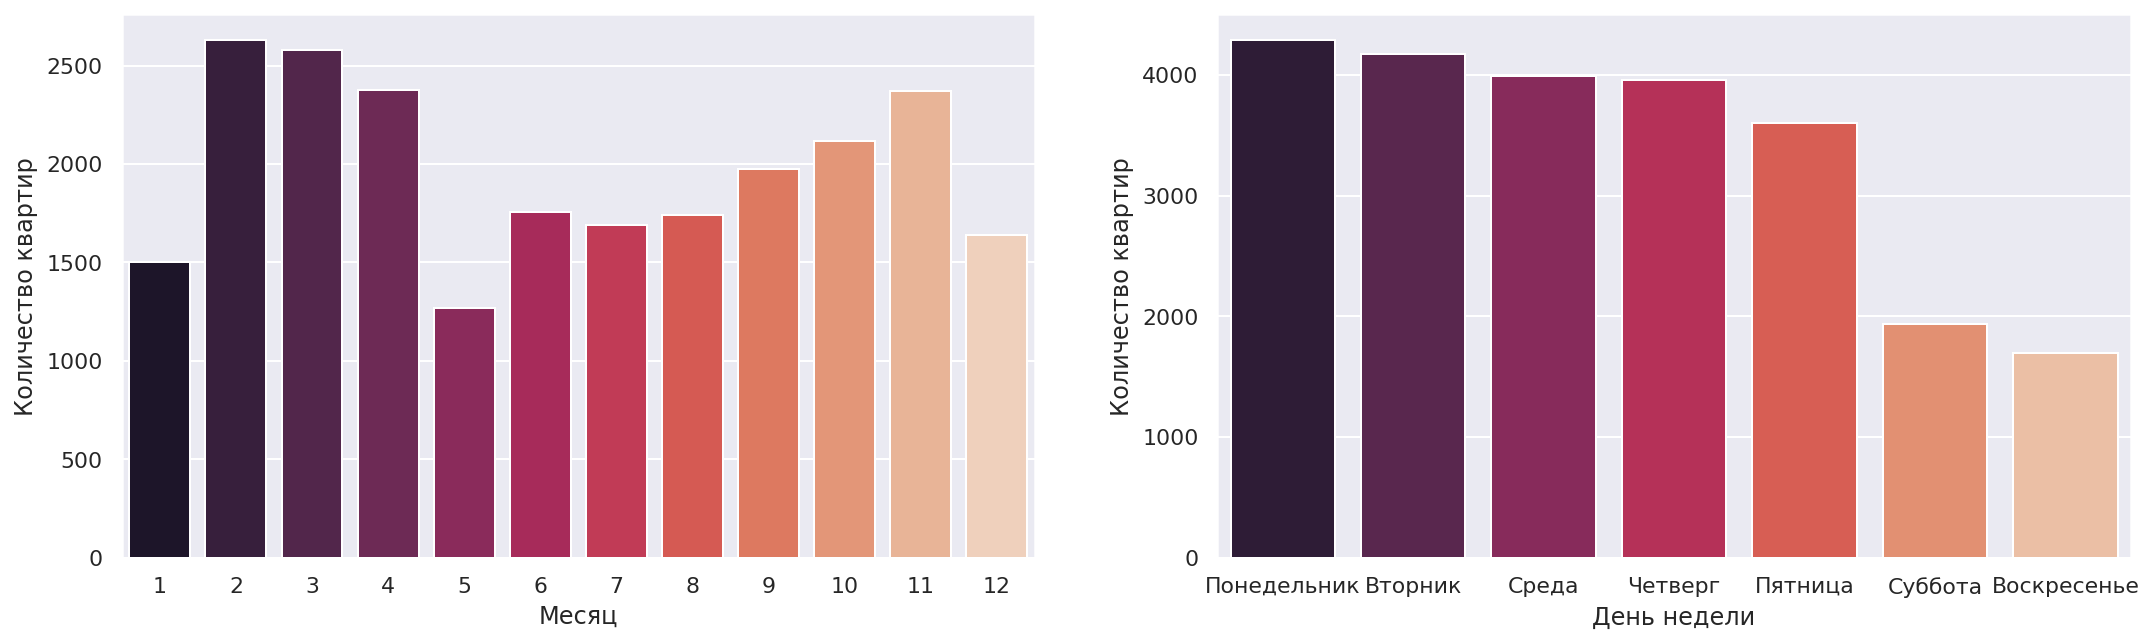

In [104]:
# Построим barplot для месяца и дня публикации объявления
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(18, 5)
)
temp = df['month'].value_counts()
sns.barplot(x=temp.index, y=temp, palette="rocket", ax=ax1)
temp = df['weekday'].value_counts()
temp.index = ['Понедельник' , 'Вторник' , 'Среда' , 'Четверг' , 'Пятница' , 'Суббота' , 'Воскресенье']
sns.barplot(x=temp.index, y=temp, palette="rocket", ax=ax2)
ax1.set(xlabel='Месяц', ylabel='Количество квартир')
ax2.set(xlabel='День недели', ylabel='Количество квартир')
plt.show()

Активность размещения объявлений имеет зависимость от месяца и дня недели. Наиболее активны пользователи в февраля, марте и апреле, в мае активность падает, а в июне вновь начинает расти до ноября влючительно. Также видно, что в будние дни автивность пользователей день ото дня постепенно снижается, а затем сильно падает на выходных.

##### скорость продажи квартиры

(95.0, 180.94250683860884, 1580.0)

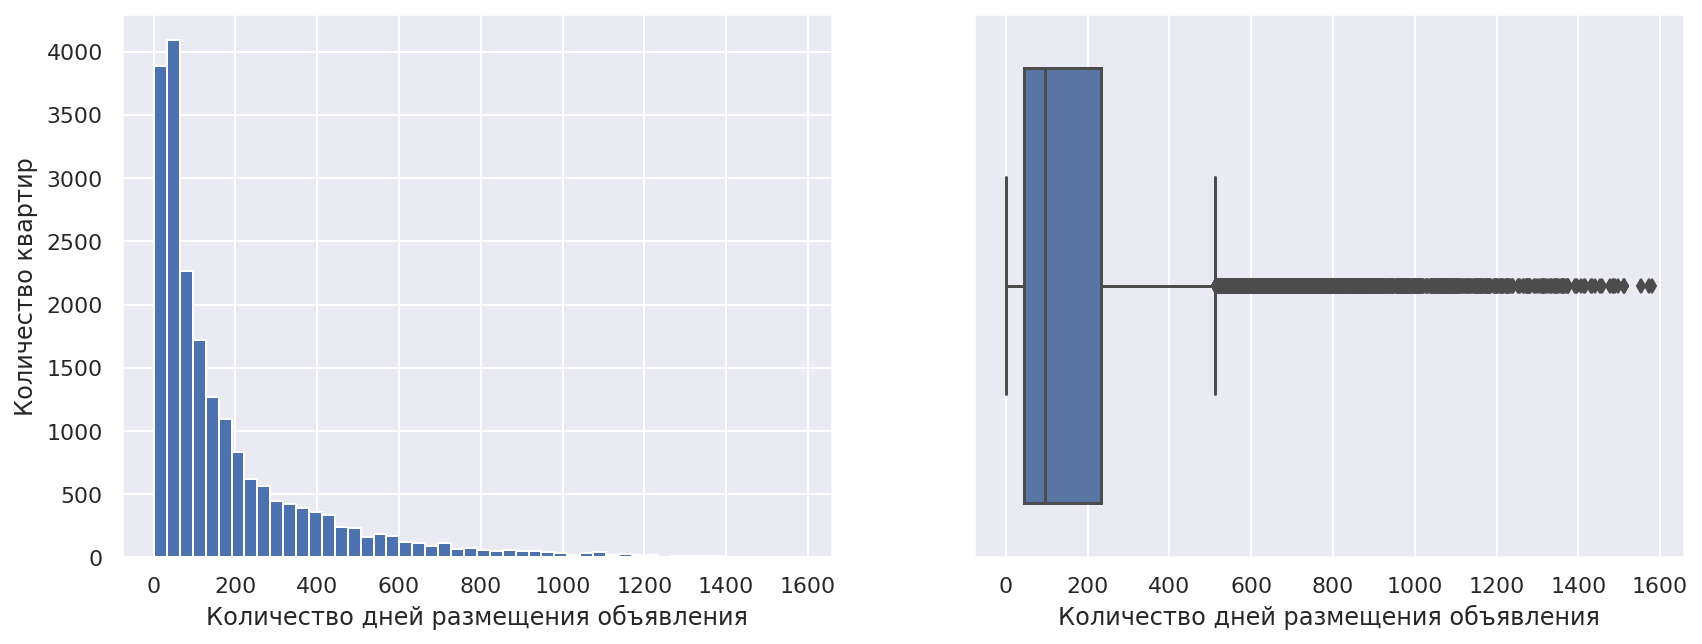

In [105]:
# Построим гистограмму и диаграмму рассеивания для скорости продажи квартиры
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)

df['days_exposition'].hist(bins=50, ax=ax1)
sns.boxplot(x="days_exposition", data=df, orient='x', ax=ax2)
ax1.set(xlabel='Количество дней размещения объявления', ylabel='Количество квартир')
ax2.set(xlabel='Количество дней размещения объявления')
df['days_exposition'].median(), df['days_exposition'].mean(), df['days_exposition'].max()

Бóльшая часть продаж укладывается 250 дней, почти все в 600 дней среднее время - 181 день, медиана - 95 дней.
<br>
Небольшое количество объектов продается аномальное долгое время - вполть до 1580 дней (больше 4-х лет)

Посмотрим также на аномально низкие значения:

In [106]:
df['days_exposition'].value_counts().sort_index().head(10)

1.0       1
2.0       3
3.0     157
4.0     176
5.0     152
6.0     124
7.0     230
8.0     139
9.0     143
10.0    127
Name: days_exposition, dtype: int64

Удивительно, но продажа всего за 3 дня - не является выдающимся и аномальным значением. А вот продаж меньше, чем за 3 дня всего 4 штуки.
<br>
Тепрь посмотрим внимательнее на распределение основной части значений.

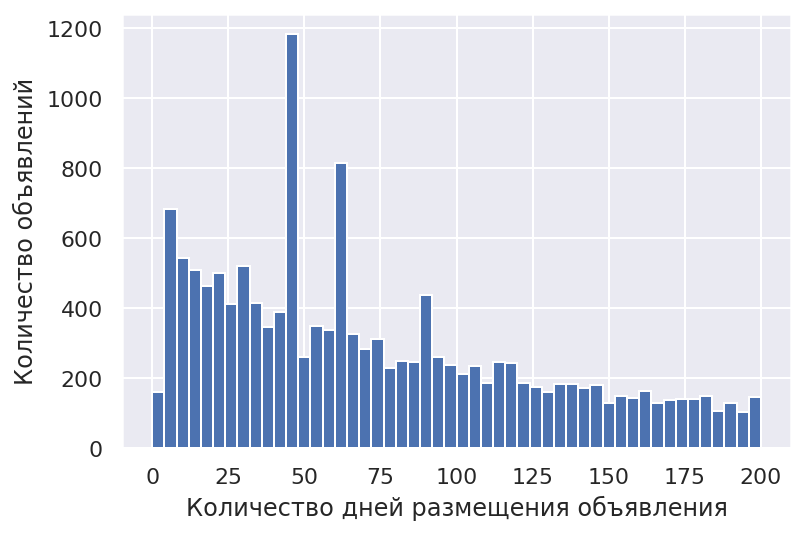

In [107]:
df['days_exposition'].hist(bins=50, range=(0, 200))
plt.xlabel('Количество дней размещения объявления')
plt.ylabel('Количество объявлений')
plt.show()

На гистрограмме отчетливо видно два пика. Посмторим какие значения значительно превышают остальные по частоте.

In [108]:
df['days_exposition'].value_counts().head()

45.0    877
60.0    535
7.0     230
30.0    208
90.0    204
Name: days_exposition, dtype: int64

45 дней и 60 дней ровно, категоризируем `days_exposition` как 45 дней, 60 дней и другие.

In [109]:
temp45 = df[(df['days_exposition'] > 44.5)&(df['days_exposition'] < 45.5)]
temp60 = df[(df['days_exposition'] > 59.5)&(df['days_exposition'] < 60.5)]

In [110]:
conditions = [
    (df['days_exposition'] > 44.5)&(df['days_exposition'] < 45.5),
    (df['days_exposition'] > 59.5)&(df['days_exposition'] < 60.5)
]
values = ["45 дней", "60 дней"]
df["days_exposition_category"] = np.select(
    conditions, 
    values, 
    default="остальные"
)

In [111]:
# Сделаем сводную таблицу для ознакомления с результатом категоризации
temp = df.groupby('days_exposition_category')['sqm_cost', 'total_area', 'last_price'].median().astype(int)
temp.columns = ['средняя цена квадратного метра', 'средняя площадь квартиры', 'средняя цена квартиры']
cm = sns.color_palette("magma", as_cmap=True)
temp.style.background_gradient(cmap=cm)

В `45 дней` вошли квартиры в среднем дешевле и меньше остальных, тогда как в `60 дней`, наоборот в среднем дороже и больше остальных.
<br>
Посмотрим на распределение цен в этих двух категориях.

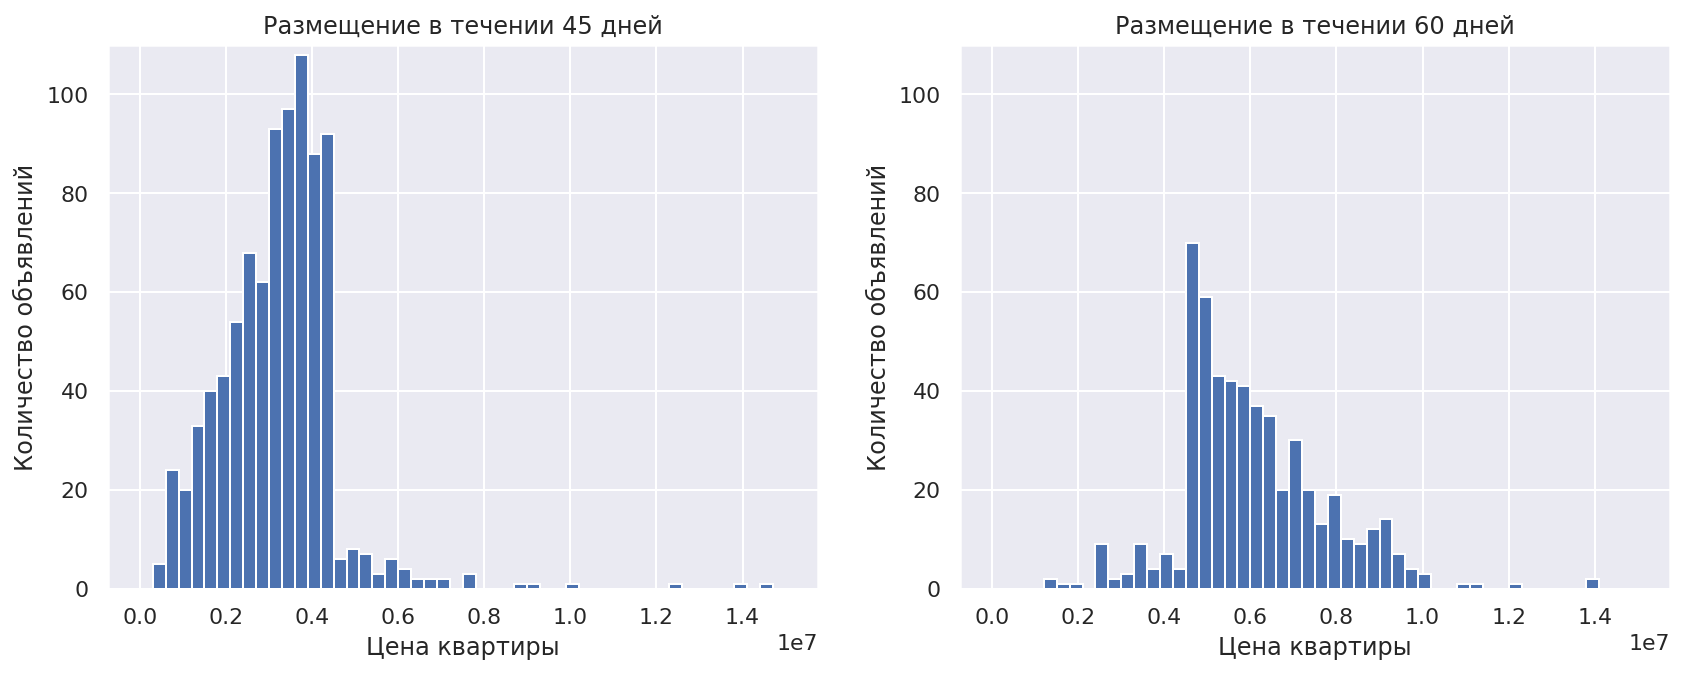

In [112]:
# Построим гистограмму и диаграмму рассеивания для расстояния до ближайшего парка
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)

df[df['days_exposition_category'] == "45 дней"]['last_price'].plot(kind='hist', bins=50, 
                                                                   range=(0, 15000000), ax=ax1, ylim=(0, 110))
df[df['days_exposition_category'] == "60 дней"]['last_price'].plot(kind='hist', bins=50, 
                                                                   range=(0, 15000000), ax=ax2, ylim=(0, 110))
ax1.set(xlabel='Цена квартиры', ylabel='Количество объявлений', title='Размещение в течении 45 дней')
ax2.set(xlabel='Цена квартиры', ylabel='Количество объявлений', title='Размещение в течении 60 дней')
plt.show()

В самых частых значений `days_exposition` выборка разбивается на две половины в районе 4.5млн₽. Причина этого заключается в том, что Яндекс Недвижимость предоставляет бесплатный период замещения объявлений квартир до 4.5млн₽ на 45 дней, квартир от 4.5млн₽ до 10млн₽ на 60 дней, а квартир от 10млн₽ —  на 90 дней. Учитвая новые данные посмотрим на менее значительный пик `days_exposition` 90 дней.

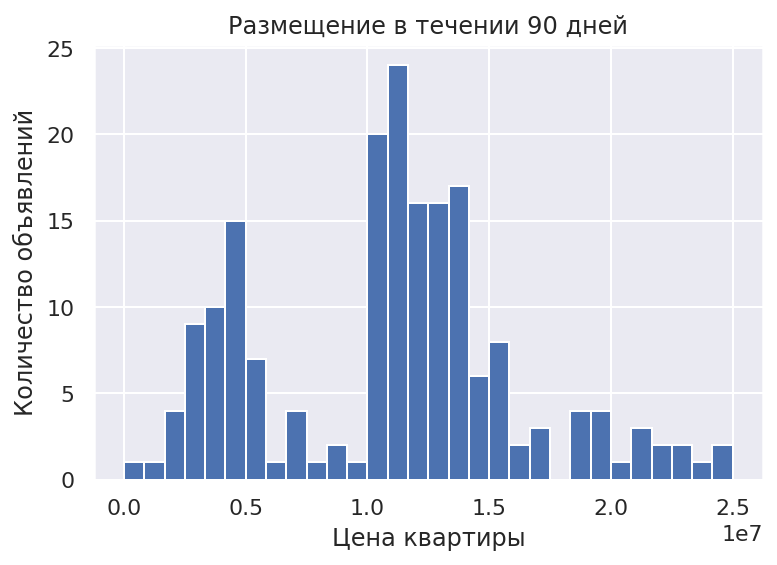

In [113]:
df[(df['days_exposition'] > 89.5)&(df['days_exposition'] < 90.5)]['last_price'].hist(bins=30, range=(0, 25000000))
plt.xlabel('Цена квартиры')
plt.ylabel('Количество объявлений')
plt.title('Размещение в течении 90 дней')
plt.show()

Действительно в течении 90 дней чаще всего размещают квартиры выше 10млн, используя бесплатный период. Хотя зависимость не такая жесткая как с 45-ю или 60-ю днями.

#### Рассмотрим зависимость цены объекты от 
- общей площади
- жилой площади
- площади кухни
- количества комнат
- этажа, на котором расположена квартира (первый, последний, другой)
- даты размещения (день недели, месяц, год)

Для начала оценим 𝜙k корреляцию для понимания общей картины взаимосвязей.

In [115]:
phik_overview = df[
        ['last_price', 'sqm_cost', 'total_area', 'living_area', 
         'kitchen_area','rooms', 'floor_category', 
         'weekday', 'month', 'year']
    ].phik_matrix()
phik_overview_last_price = phik_overview['last_price'].sort_values(ascending=False).iloc[2:].reset_index()
cm = sns.color_palette("coolwarm", as_cmap=True)
phik_overview_last_price.style.background_gradient(cmap=cm,subset=['last_price'])

interval columns not set, guessing: ['last_price', 'sqm_cost', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'weekday', 'month', 'year']


На первый взгляд, похоже, что на цену объекта большего всего влияет площади и количество комнат, что логично.
<br>
При этом, из выше перечисленных параметров, площадь кухни влияет в меньшей степени.
<br>
Категория этажа и дата размещения практически не влияет.
<br>
Впрочем, даже 𝜙k корреляции не стоит слепо доверять, так что давайте проверять каждую интересующую нас взаимосвязь подробнее.

In [116]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23646 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              23646 non-null  int64         
 1   last_price                23646 non-null  int64         
 2   total_area                23646 non-null  float64       
 3   first_day_exposition      23646 non-null  datetime64[ns]
 4   rooms                     23646 non-null  int64         
 5   ceiling_height            14461 non-null  float64       
 6   floors_total              23560 non-null  float64       
 7   living_area               21743 non-null  float64       
 8   floor                     23646 non-null  int64         
 9   studio                    23646 non-null  bool          
 10  open_plan                 23646 non-null  bool          
 11  kitchen_area              21368 non-null  float64       
 12  balcony           

In [117]:
# Подготовим данные с учетом предущего анализа, отбросив слишком большие значения
data = df[(df.total_area < 200)&
          (df.last_price < 30000000)&
          (df.rooms < 8)&
          ((df.living_area < 100)|(df.living_area.isna()))&
          ((df.kitchen_area < 30)|(df.kitchen_area.isna()))
         ]

##### Начнем с анализа зависимости цены от общей площади.

In [119]:
# Для удобства будем менять переменные "x" для исследования зависимости с ценой
x = data.total_area
y = data.last_price

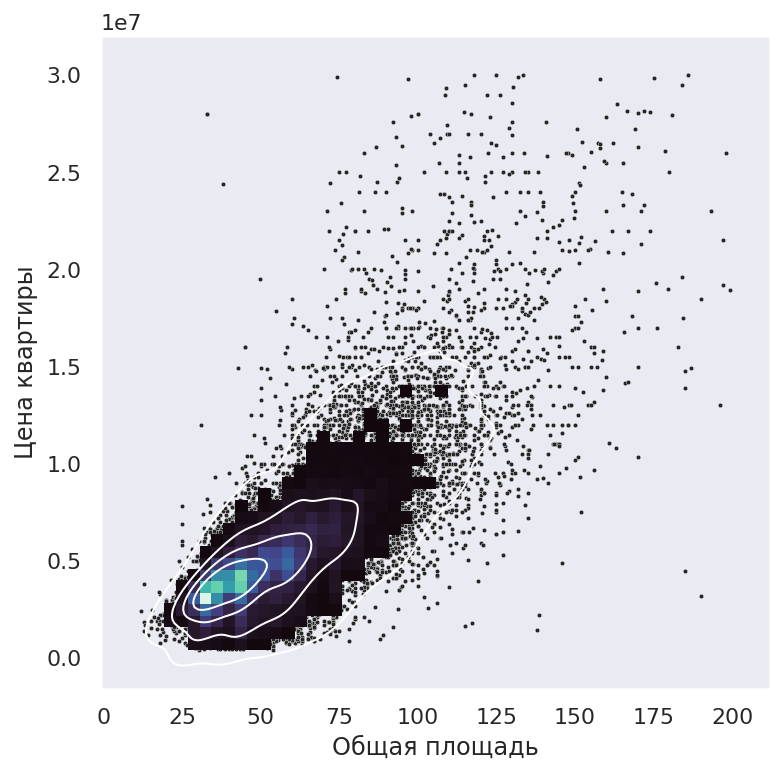

In [120]:
# построим scatterplot с отображением плотности
sns.set_theme(style="dark")
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)
plt.xlabel('Общая площадь')
plt.ylabel('Цена квартиры')
plt.show()

На графике отчетливо видна вполне линейная зависимость цены квартиры от ее площади, даже когда значения выходят из места скопления. Визуализируем эту зависимость для наглядности.

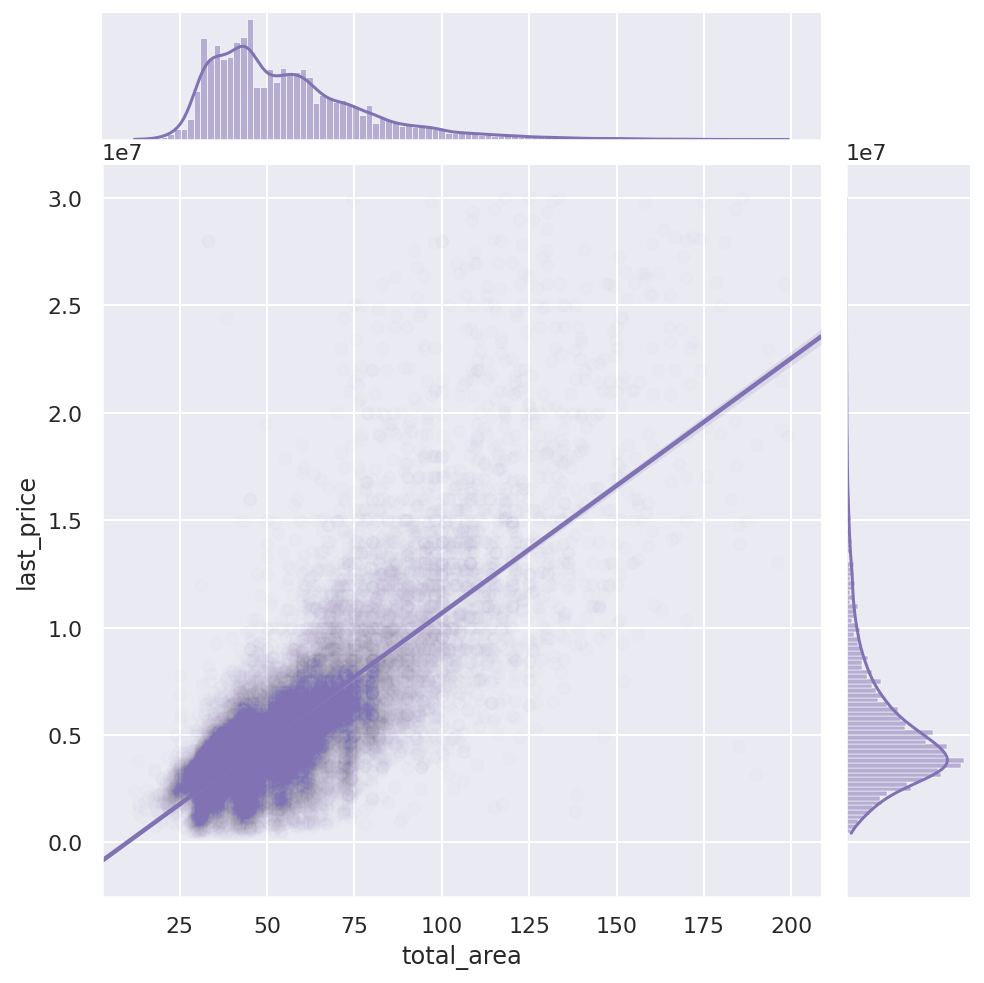

In [121]:
sns.set_theme(style="darkgrid")

sns.jointplot(x=x, y=y, kind="reg", truncate=False,
              color="m", height=7, joint_kws = {'scatter_kws':dict(alpha=0.01)})
plt.show()

Линия на графике отражает весьма четкую положительную корреляцию - чем больше площадь, тем выше цена.

##### Теперь исследуем зависимость цены от жилой площади.

In [122]:
# Меняем исследуемый признак
x = data.living_area

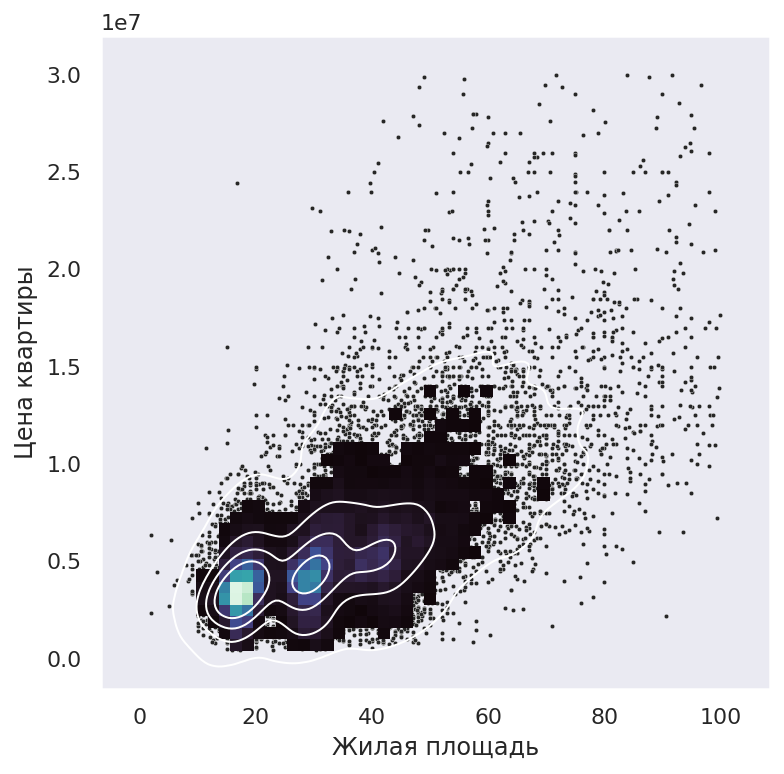

In [123]:
sns.set_theme(style="dark")
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)
plt.xlabel('Жилая площадь')
plt.ylabel('Цена квартиры')
plt.show()

В этот раз корреляция не такая яркая, но все же достаточно отчетлива заметна. Для подтверждения разобъем данные на 20 групп по размеру жилой площади. Чтобы разбиение было более репрезентативно, в каждую группу поместим примерно равное количество объектов.

In [124]:
# Для этого воспользуемся qcut
data['living_area_qcut'] = pd.qcut(data['living_area'], 5)
living_area_qcut = data.groupby('living_area_qcut')['last_price'].agg(['mean'])
living_area_qcut['variance'] = living_area_qcut.index.categories.length
living_area_qcut['left'] = living_area_qcut.index.categories.left
living_area_qcut['left'] = living_area_qcut['left'].round().astype(int)
living_area_qcut['right'] = living_area_qcut.index.categories.right
living_area_qcut['right'] = living_area_qcut['right'].round().astype(int)
living_area_qcut['group'] = living_area_qcut['left'].astype(str) + '-' + living_area_qcut['right'].astype(str)
living_area_qcut = living_area_qcut.drop(['left', 'right'], axis=1)
living_area_qcut.columns = ['средняя цена', 'разброс цены в группе', 'группа']
cm = sns.color_palette("magma", as_cmap=True)
living_area_qcut.style.background_gradient(cmap=cm,subset=['средняя цена'])

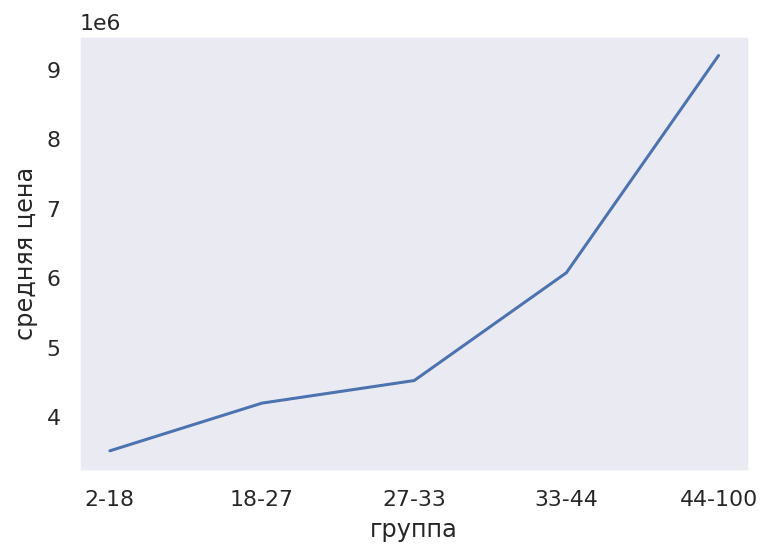

In [125]:
# Для удобства построим график, где по оси x будут группы жилой площади по возрастанию, 
# а по оси y средняя цена
sns.lineplot(x=living_area_qcut['группа'], y=living_area_qcut['средняя цена'])
plt.show()

Теперь зависимость отчетлива видна, имеем весьма наглядную положительную корреляцию - чем больше жилая площадь, тем выше цена.

##### Следующей исследуем зависимость цены квартиры от площади кухни

In [126]:
# Меняем исследуемый признак
x = data.kitchen_area

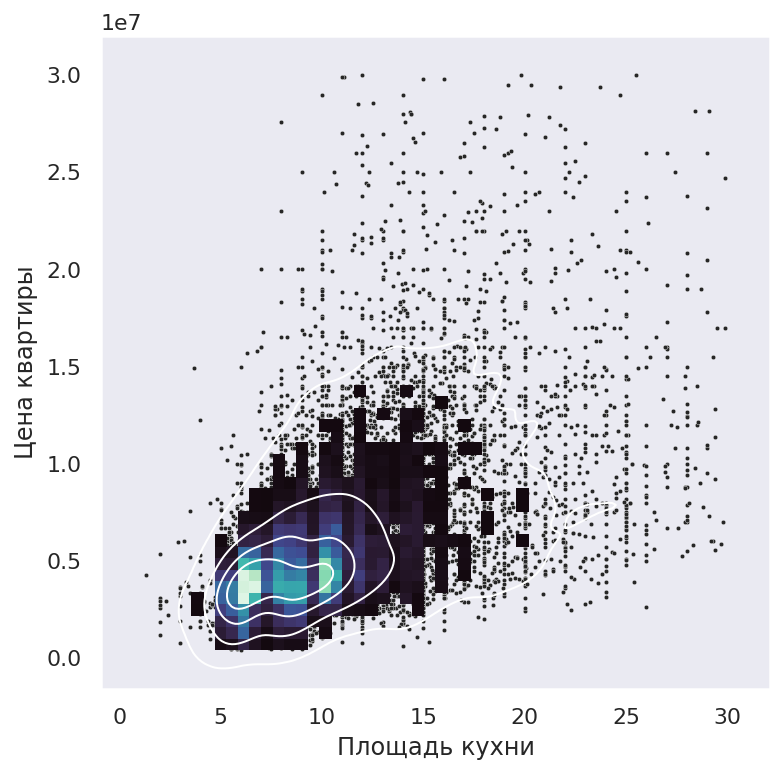

In [127]:
sns.set_theme(style="dark")
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)
plt.xlabel('Площадь кухни')
plt.ylabel('Цена квартиры')
plt.show()

Положительная корреляция даже более заметна, чем у жилой площади - чем больше площадь кухни, тем выше цена. И хотя с увелечением площади кухни и, соответственно, цены, разброс значений тоже сильно увеличивается, в месте скопления большинства значений завимиость очень четкая.

##### Перейдем к зависимости цены от количества комнат.

In [128]:
# Меняем исследуемый признак
x = data.rooms

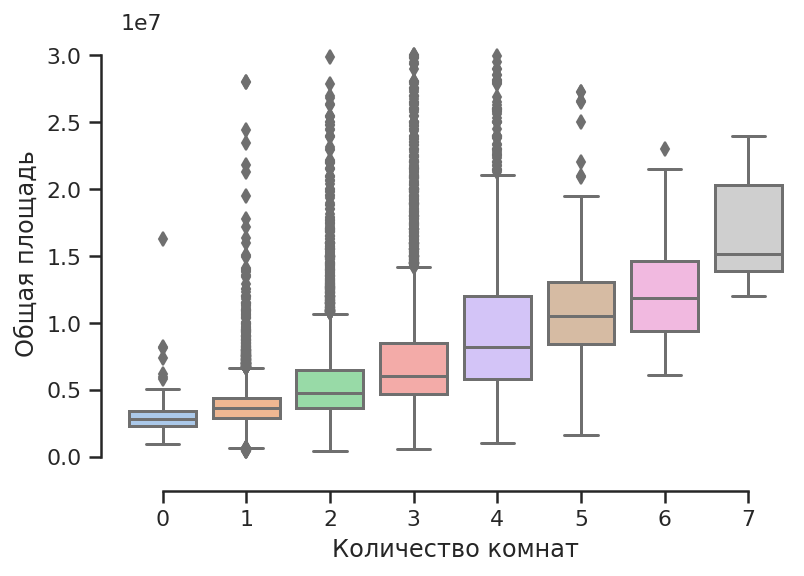

In [129]:
# Построим boxplot с количеством комнат по оси x и ценой по оси y
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x=x, y=y, data=data)
sns.despine(offset=10, trim=True)
plt.xlabel('Количество комнат')
plt.ylabel('Общая площадь')
plt.show()

Несмотря на большой разброс цен кваритр с 1-4 комнатами (понмним, что их подавляющее больинство в выборке), если смотреть на медианные значения, положительная корреляция достаточно яркая - чем больше комнат, тем выше цена. 
<br>
Проблема заключается в том, что  количество комнат сильно связано с площадью картиры, это признаки, которые не стоит рассматривать изолированно друг от друга.

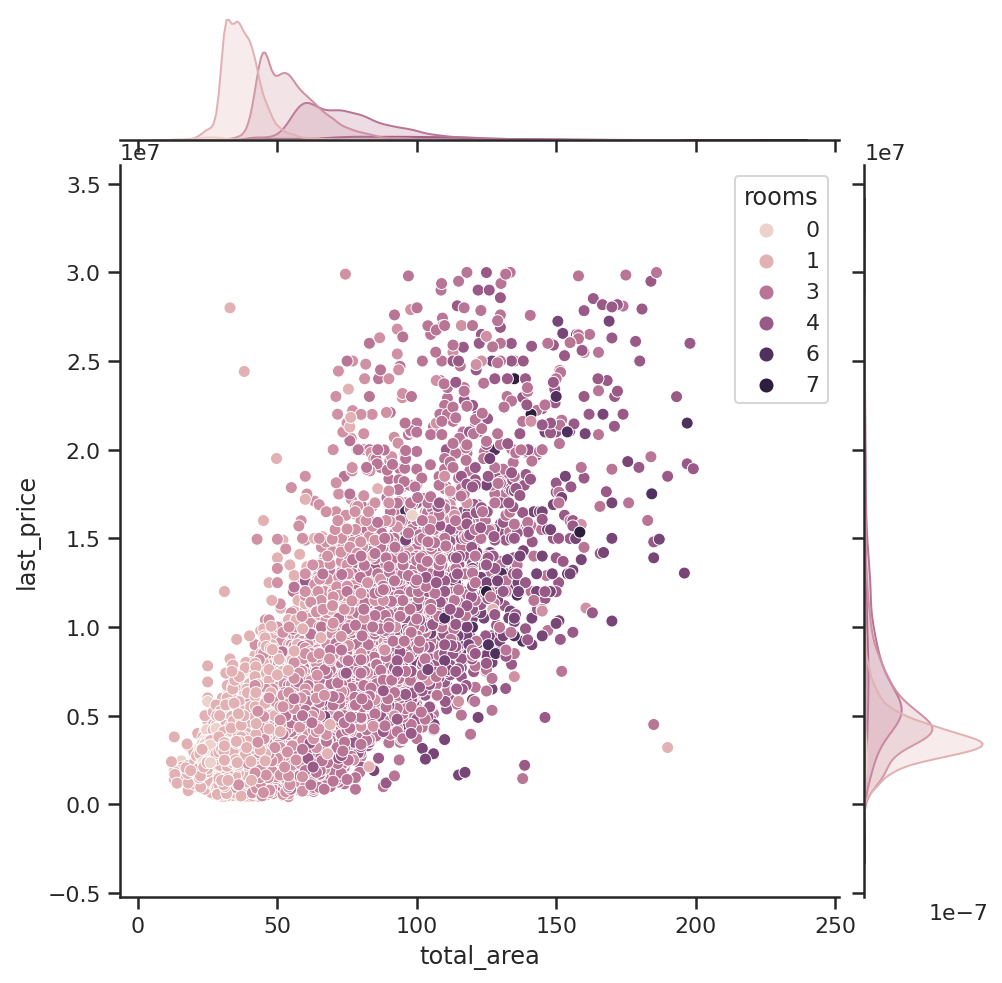

In [130]:
sns.jointplot(x='total_area', y=y, data=data, color="m", height=7, hue='rooms')
plt.show()

На графике видно, что количество комнат закономерно увеличивается с увеличением площади квартиры.

In [131]:
# Возьмем квартиры с наиболее распространенным количеством комнат
temp = data[data.rooms <= 4]

# Воспользаемся qcut для более репрезентативного распределения
temp['total_area_qcut'] = pd.qcut(temp['total_area'], 15)

# Подготовим сводбную таблицу, агрегируем цену по группе площадей и количеству комнат
pivot_temp = temp.pivot_table(index='total_area_qcut', columns='rooms', values='last_price', aggfunc='mean')
pivot_temp.index = pivot_temp.index.map(lambda x: f'{int(x.left.round())}-{int(x.right.round())}')

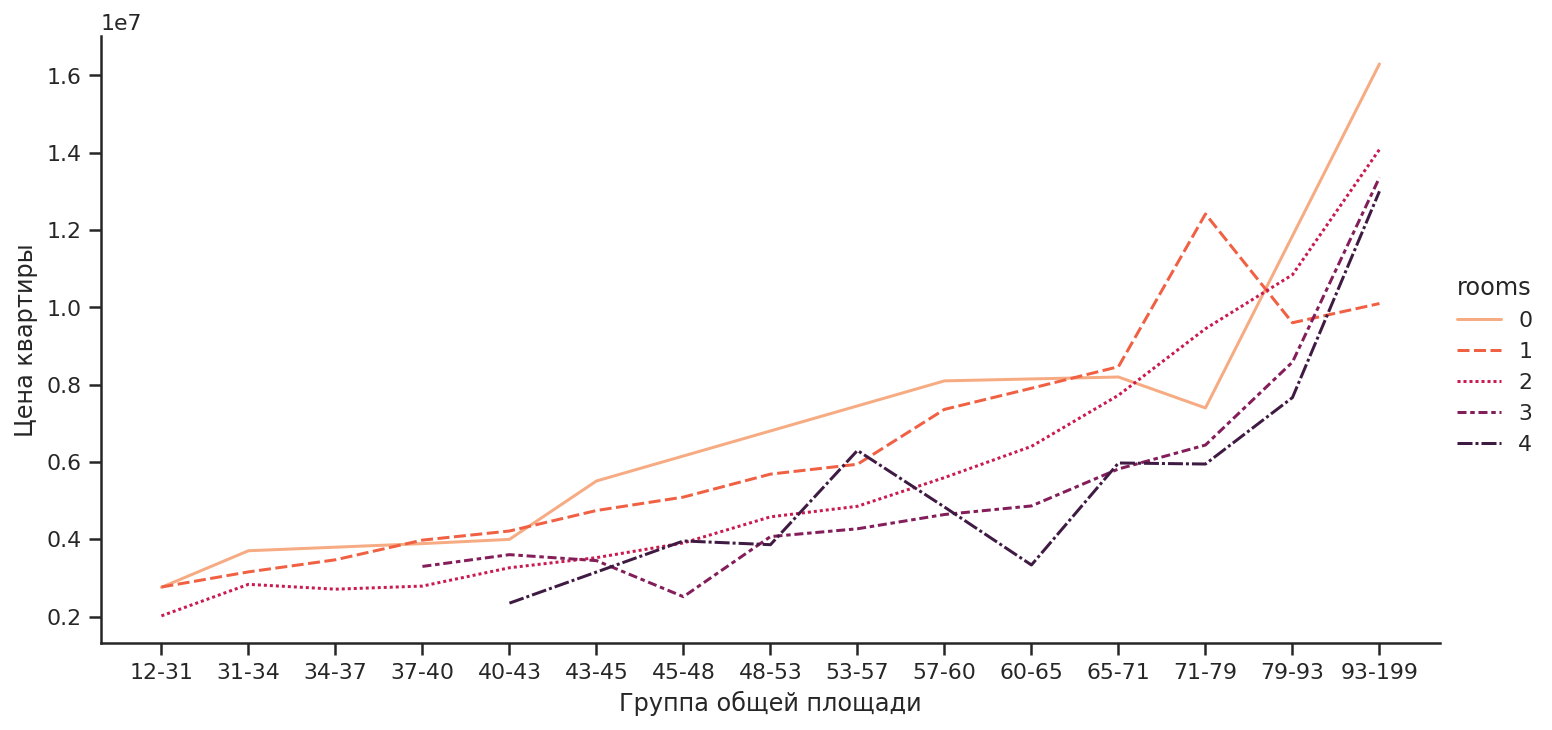

In [132]:
# Построим relplot роста цены на квартиры с разным количеством комнат
sns.set_theme(style="ticks")
palette = sns.color_palette("rocket_r", 5)
g = sns.relplot(
    data=pivot_temp,
    kind="line", palette=palette,
    height=5, aspect=2
)
g.set_ylabels("Цена квартиры")
g.set_xlabels("Группа общей площади")
plt.show()

Как видно из графика, если избежать влияния площади на цену квартиры, то окажется, что зависимость обратная - чем больше комнат в квартирах с примерно одинаковой площадью - тем ниже цена.

##### Рассмотрим влияние категории этажа на цену квартиры
<a id='2'></a>

In [133]:
# Меняем исследуемый признак
x = data.floor_category

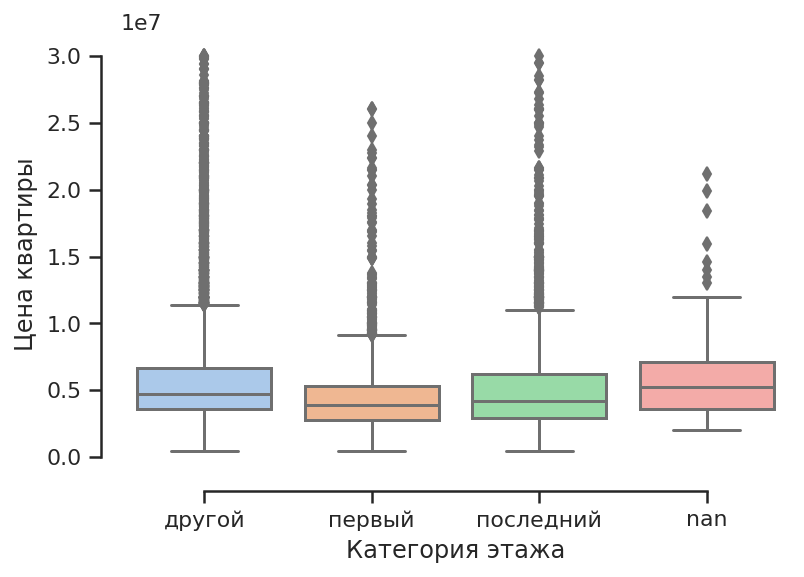

In [134]:
# Построим boxplot с категорией этажа по оси x и ценой по оси y
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x=x, y=y, data=data)
sns.despine(offset=10, trim=True)
plt.xlabel('Категория этажа')
plt.ylabel('Цена квартиры')
plt.show()

Как и показала 𝜙k корреляция - зависимости пркатически нет. Можно увидеть небольшие отличия, но они вполне могут быть статистической погрешностью, так как изначальная выборка очень мала.

##### Последней рассмотрим зависимость цены объекты от даты размещения

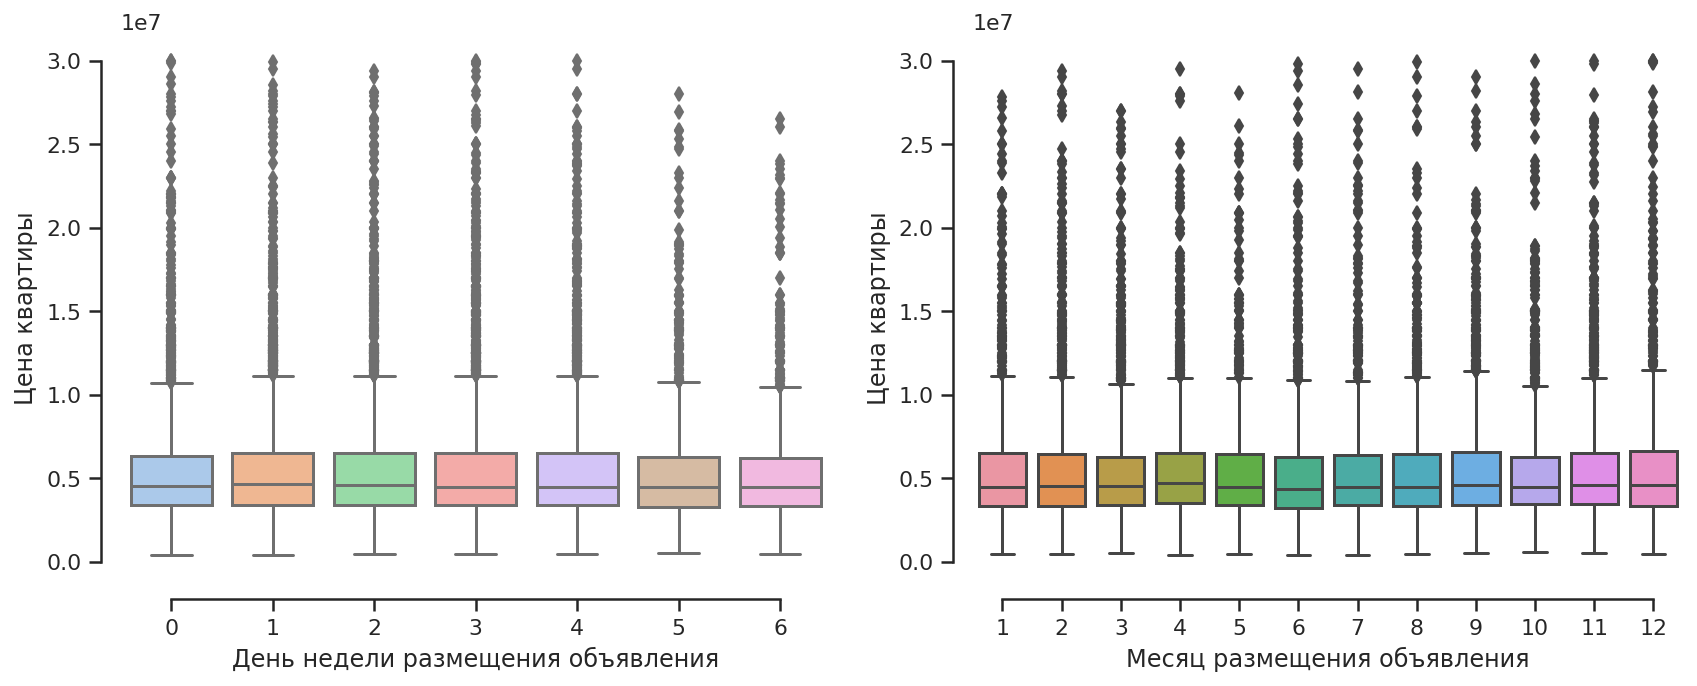

In [135]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)

# Меняем исследуемый признак
x = data.weekday

# Построим boxplot с днем недели по оси x и ценой по оси y
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x=x, y=y, data=data, ax=ax1)
sns.despine(offset=10, trim=True, ax=ax1)

# Меняем исследуемый признак
x = data.month

# Построим boxplot с месяцами по оси x и ценой по оси y
sns.boxplot(x=x, y=y, data=data, ax=ax2)
sns.despine(offset=10, trim=True, ax=ax2)

ax1.set(xlabel='День недели размещения объявления', ylabel='Цена квартиры')
ax2.set(xlabel='Месяц размещения объявления', ylabel='Цена квартиры')
plt.show()

𝜙k корреляция вновь оказалась верна. Зависимость цены квартиры от дня недели и месяца размещения совершенно отсутствует.

In [136]:
# Меняем исследуемый признак
x = data.year

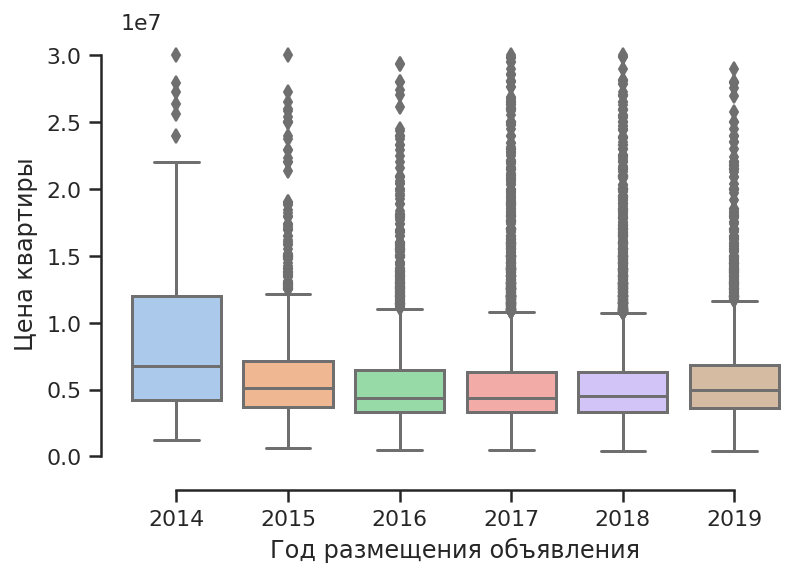

In [137]:
# Построим boxplot с годом размещения по оси x и ценой по оси y
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x=x, y=y, data=data)
sns.despine(offset=10, trim=True)
plt.xlabel('Год размещения объявления')
plt.ylabel('Цена квартиры')
plt.show()

Судя по графику есть графику в 2014 цена квартир была самая высокая, а в 2015 и 2019 выше чем в 2016, 2017 и 2018. 
<br>
Проверим сколько у нас есть данных по каждому году и насколько репрезантативны эти зависимости.

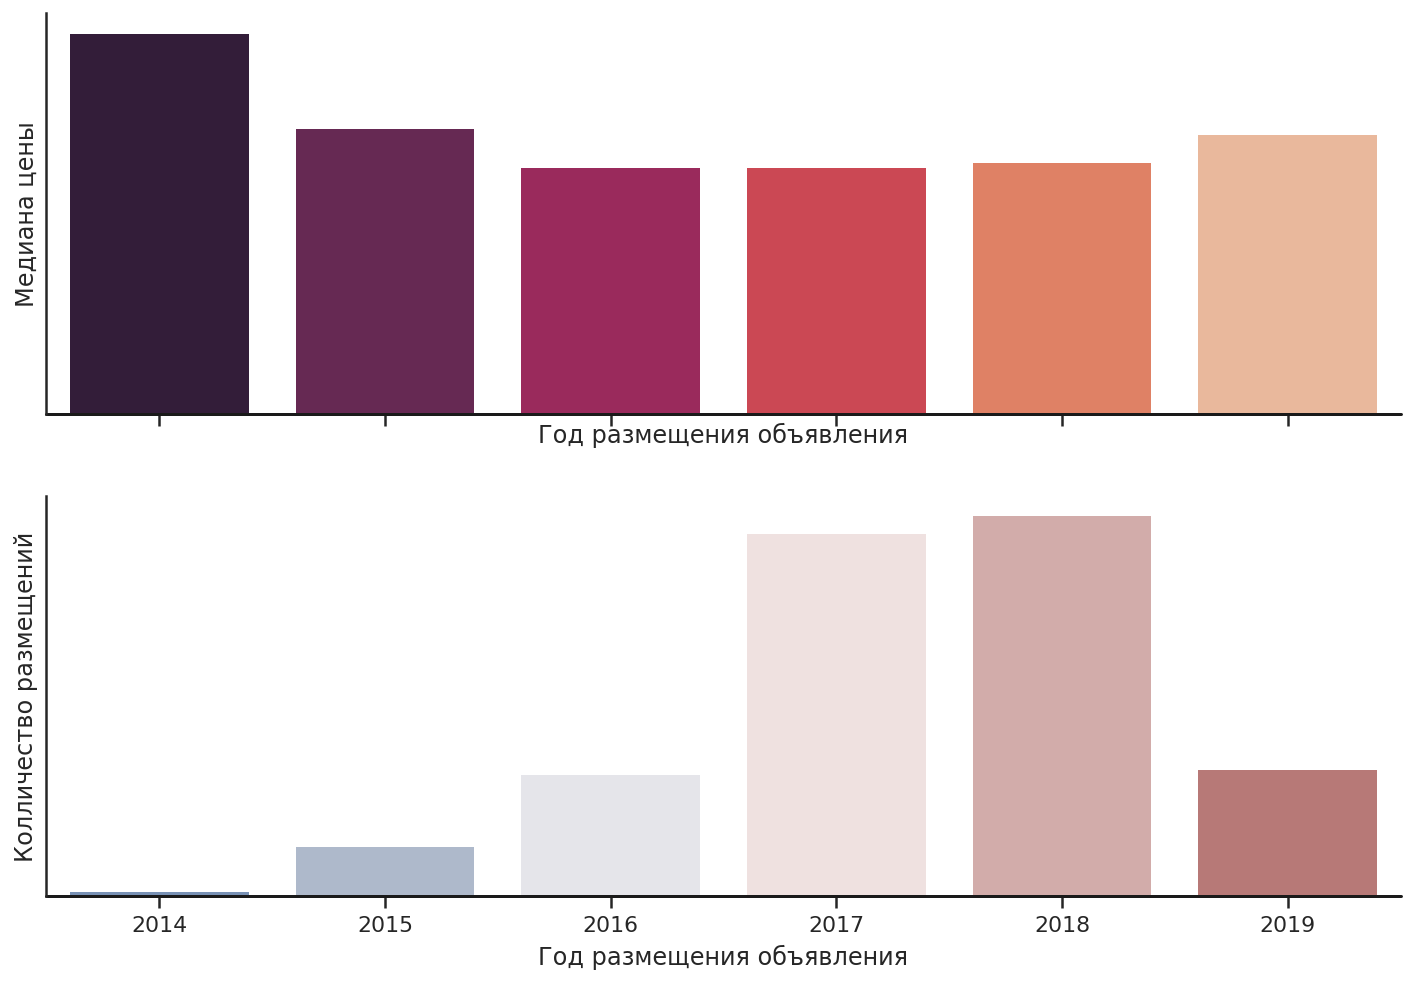

In [138]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

# Подготовим сводную таблицу, агрегируем цену по году размещения
temp = data.groupby('year')['last_price'].agg(['median', 'count'])
temp.index.name = 'Год размещения объявления'
x = temp.index

y1 = temp['median']
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Медиана цены")

y2 = temp['count']
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Колличество размещений")

sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

Теперь понятно, почему 𝜙k корреляция не выявила здесь зависимоти. Более высокие значения цены в 2014 и 2015 годах могут быть вызваны статистической погрешностью из-за крайне малого количества данных об этих годах. С увеличением количества данных цена стремится к значениям 2017-2018 годов.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
Выделим также населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Так как здесь нам надо будет считать среднее значения, а не медиану, надо отбросить все слишком высокие значения цены квадратного метра.

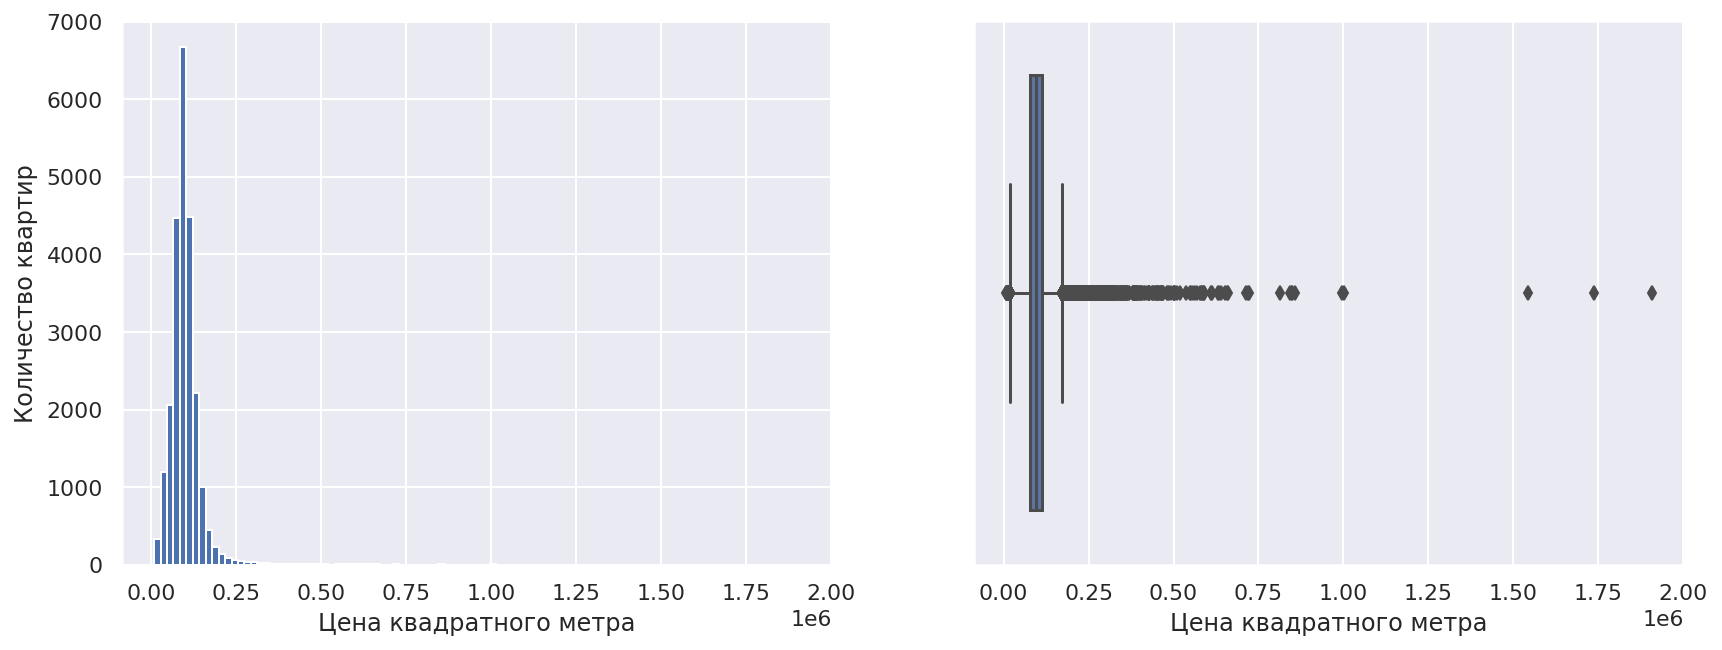

In [139]:
# Посмотрим на распределение цены квадратного метра
sns.set_theme(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)

df['sqm_cost'].hist(bins=100, ax=ax1)
sns.boxplot(x="sqm_cost", data=df, orient='x', ax=ax2)
ax1.set(xlabel='Цена квадратного метра', ylabel='Количество квартир')
ax2.set(xlabel='Цена квадратного метра')
plt.show()

Выбросы очень существенны, отбросим значения выше 300тыс ₽

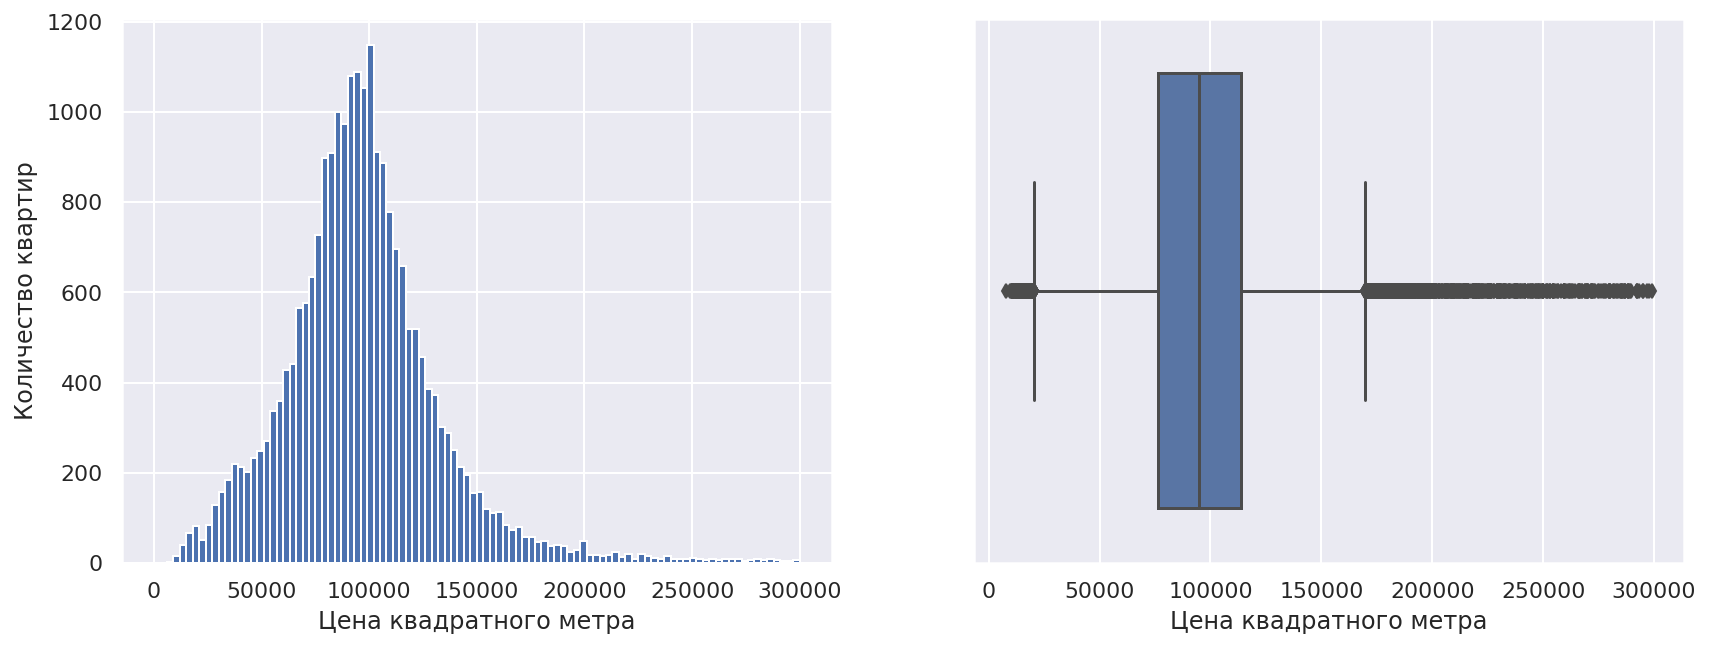

In [140]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 5)
)

df['sqm_cost'].hist(bins=100, range=(0, 300000), ax=ax1)
sns.boxplot(x="sqm_cost", data=df[df.sqm_cost < 300000], orient='x', ax=ax2)
ax1.set(xlabel='Цена квадратного метра', ylabel='Количество квартир')
ax2.set(xlabel='Цена квадратного метра')
plt.show()

Диапозон от 0 до 200тыс ₽, кажется, будет наиболее оптимальным.

In [141]:
data = df[df.sqm_cost <= 200000]

In [142]:
# Найдем населённые пункты с наибольшим числом объявлений
local = data.locality_name.value_counts().head(10)
local

Санкт-Петербург      15191
посёлок Мурино         553
посёлок Шушары         439
Всеволожск             394
Пушкин                 366
Колпино                337
посёлок Парголово      326
Гатчина                305
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [143]:
# Проверим, что распределение не изменилось после удаления выбросов
df.locality_name.value_counts().head(10)

Санкт-Петербург      15688
посёлок Мурино         553
посёлок Шушары         439
Всеволожск             395
Пушкин                 369
Колпино                337
посёлок Парголово      326
Гатчина                305
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Удаление выбросов не повлияло на распределение - отлично. Теперь можно найти среднюю цену квадратного метра для каждого из них.

In [144]:
# Берем квартиры из 10 населённых пунктов с наибольшим числом объявлений
data = data.query('locality_name in @local.index')
# Расчитываем среднюю цену квадратного метра и округляем до целого
sqm_local_cost = data.groupby('locality_name')['sqm_cost'].mean().round().astype(int).sort_values()
# Подготавливааем визуализацию
pd.DataFrame(sqm_local_cost).T.style.background_gradient(cmap=cm, axis=1)

Мы получили среднюю цену квадратного метра для каждого из выбранных населенных пунктов.

Посмотрим также на сырые данные без удаления выбросов:

In [145]:
data_row = df.query('locality_name in @local.index')
sqm_local_cost_row = data_row.groupby('locality_name')['sqm_cost'].mean().round().astype(int).sort_values()
pd.DataFrame(sqm_local_cost_row).T.style.background_gradient(cmap=cm, axis=1)

Итак, самая низкая цена квадратного метра в Выбоге - 58 142 ₽.
<br>
Самая высокая в Санкт-Петербурге - 108 387 ₽, не учитывая выбросы, или 114 808 ₽ с учетом очень дорогих квартир.

#### Вычислим среднюю цену километра до центра города в Санкт-Петербурге.
<a id='3'></a>

In [146]:
# Подготовим данные, отбросив слишком дорогие кваритиры
data = df[(df.sqm_cost <= 200000)&(df.locality_name == "Санкт-Петербург")]

In [147]:
# Посмотрим сколько в выборке квартир для каждого километра до центра
data.cityCenters_km.value_counts().sort_index()

0.0       16
1.0      160
2.0      256
3.0      335
4.0      632
5.0      824
6.0      538
7.0      343
8.0      585
9.0      580
10.0     705
11.0    1160
12.0    1597
13.0    1448
14.0    1274
15.0    1562
16.0    1257
17.0     881
18.0     261
19.0     157
20.0      48
21.0     117
22.0     201
23.0      84
24.0      26
25.0      26
26.0      53
27.0       2
28.0       7
29.0       6
Name: cityCenters_km, dtype: int64

Построим графики зависимости цены квартиры и цены квадратного метра в зависимости от удаленности от центра для подготовленных и сырых данных.

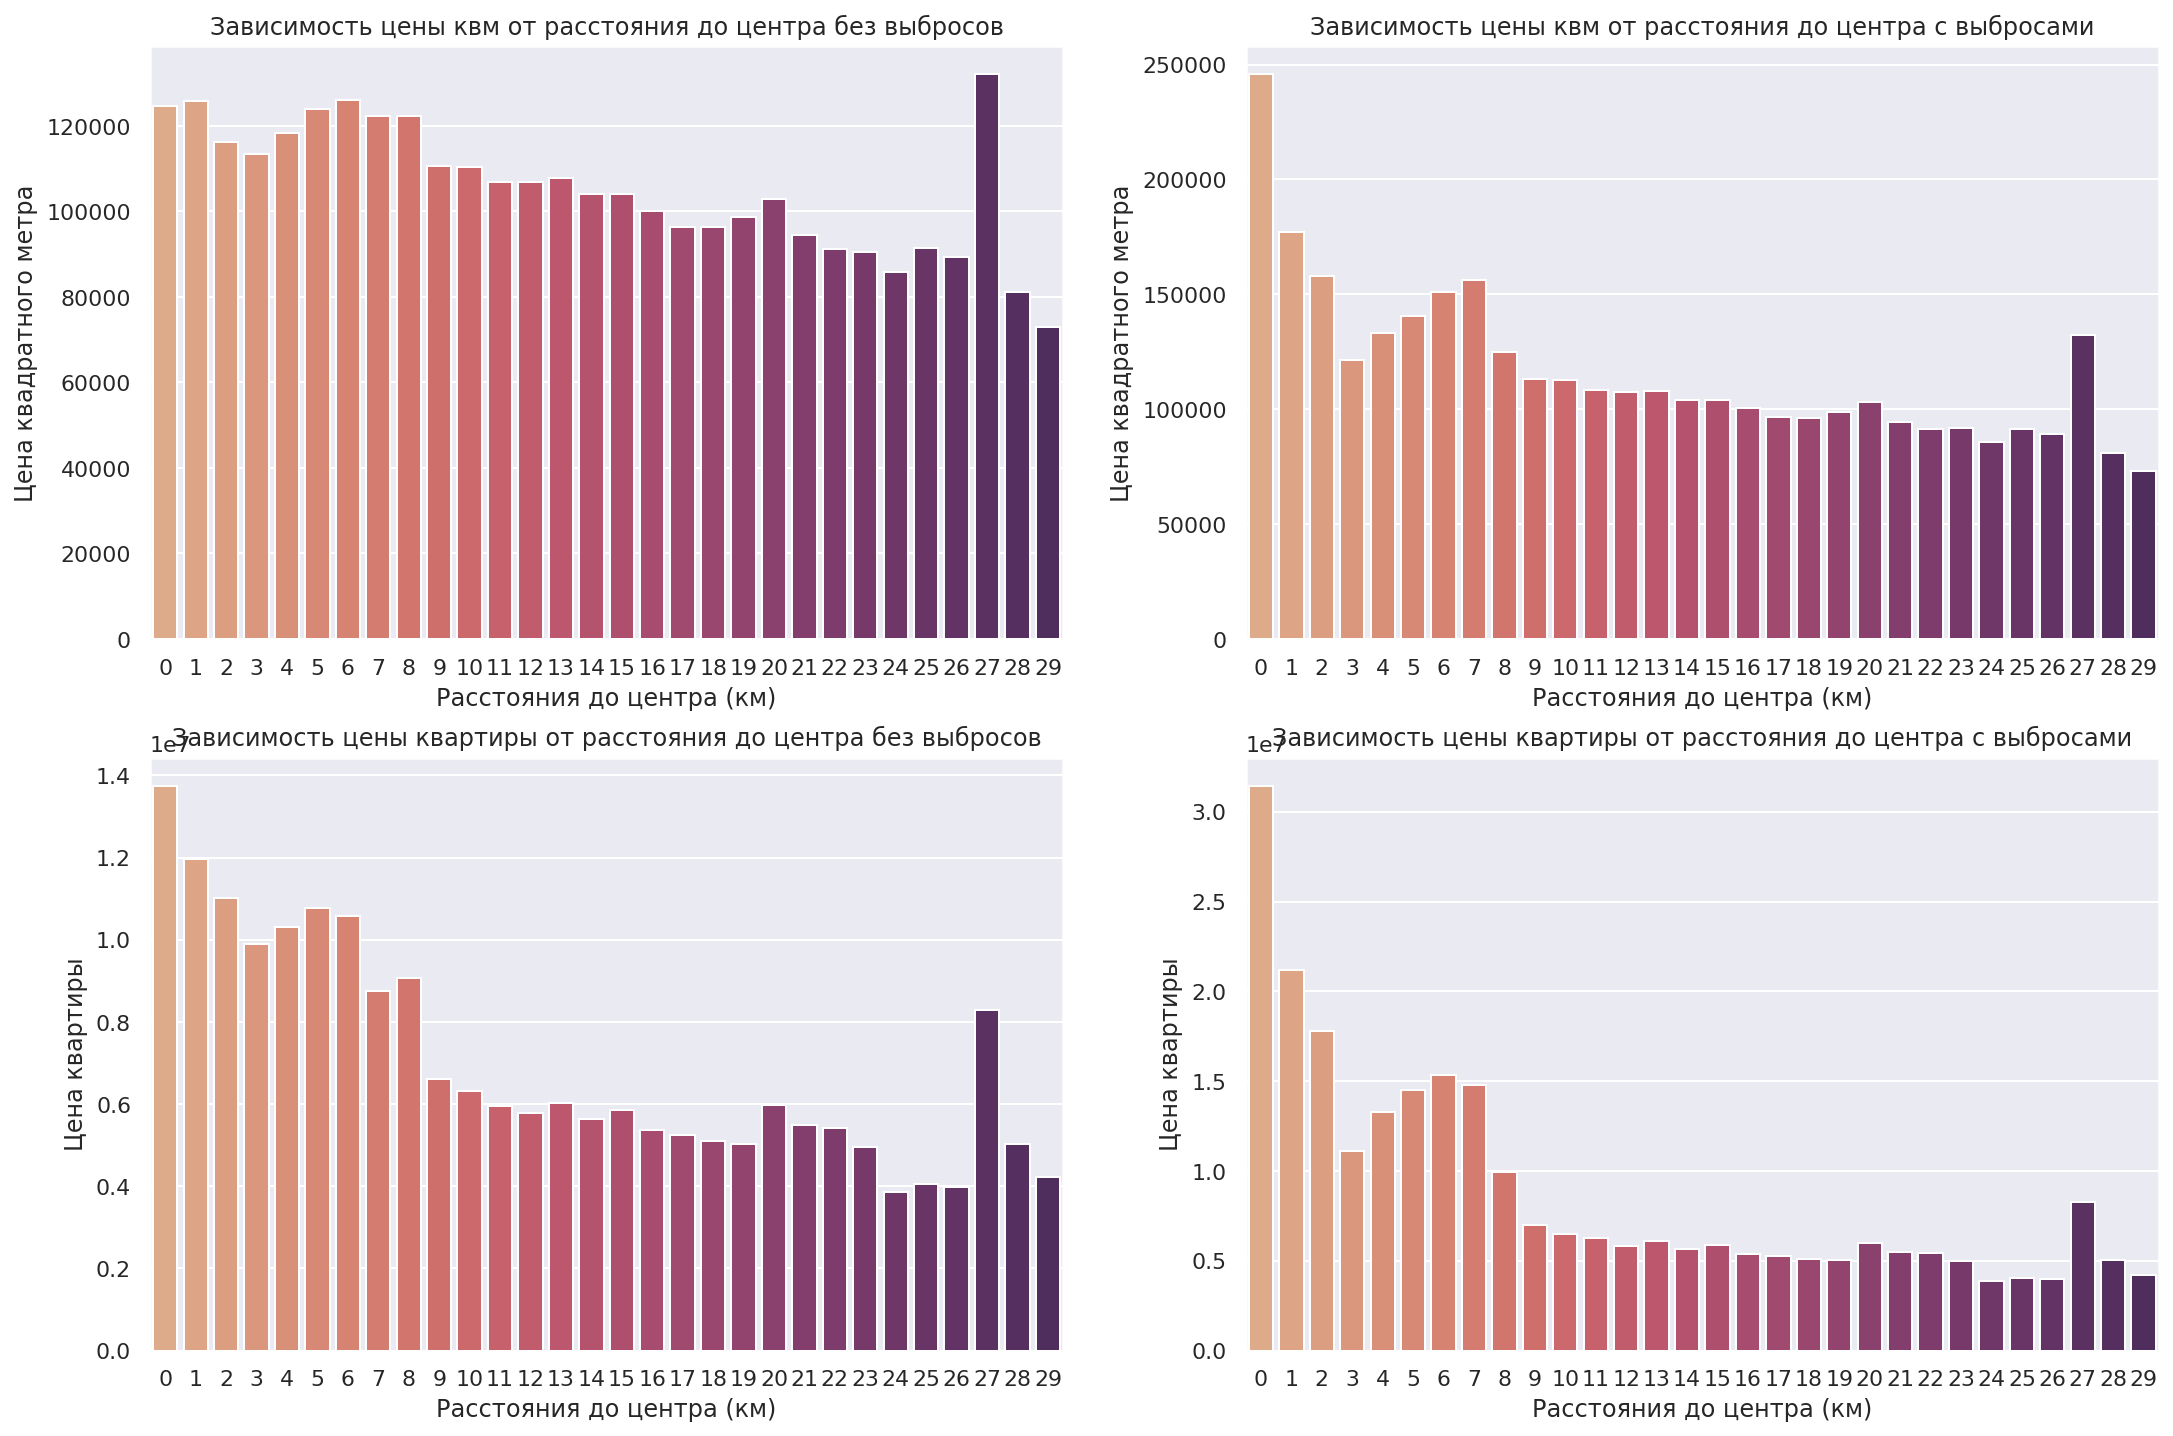

In [148]:
к

temp_sqm_cost = data.groupby('cityCenters_km')['sqm_cost'].mean()
temp_sqm_cost.index = temp_sqm_cost.index.astype(int)
sns.barplot(x=temp_sqm_cost.index, y=temp_sqm_cost, palette="flare", ax=ax1)

temp_last_price = data.groupby('cityCenters_km')['last_price'].mean()
temp_last_price.index = temp_last_price.index.astype(int)
sns.barplot(x=temp_last_price.index, y=temp_last_price, palette="flare", ax=ax3)
# Подготавливаем сырые данные с выбросами
data_row = df.query('locality_name == "Санкт-Петербург"')
temp_row_sqm_cost = data_row.groupby('cityCenters_km')['sqm_cost'].mean()
temp_row_sqm_cost.index = temp_row_sqm_cost.index.astype(int)
sns.barplot(x=temp_row_sqm_cost.index, y=temp_row_sqm_cost, palette="flare", ax=ax2)

temp_row_last_price = data_row.groupby('cityCenters_km')['last_price'].mean()
temp_row_last_price.index = temp_row_last_price.index.astype(int)
sns.barplot(x=temp_row_last_price.index, y=temp_row_last_price, palette="flare", ax=ax4)
# Добавляем название
ax1.set(xlabel='Расстояния до центра (км)', ylabel='Цена квадратного метра', 
        title = 'Зависимость цены квм от расстояния до центра без выбросов')
ax3.set(xlabel='Расстояния до центра (км)', ylabel='Цена квартиры',
        title = 'Зависимость цены квартиры от расстояния до центра без выбросов')
ax2.set(xlabel='Расстояния до центра (км)', ylabel='Цена квадратного метра',
        title = 'Зависимость цены квм от расстояния до центра с выбросами')
ax4.set(xlabel='Расстояния до центра (км)', ylabel='Цена квартиры',
        title = 'Зависимость цены квартиры от расстояния до центра с выбросами')
plt.show()

Зависимость действительно очень яркая - чем ближе к центру, тем выше цена квартиры и цена за квадратный метр. Однако если считать разницу в средней стоимости квартир, результат может сильно исказить связь между расстоянием до центра и площадью квартиры. Проверим, есть ли такая зависимость:

In [149]:
# Подготавливаем данные, основываясь на проведенный ранее анализ характеристики общей площади
data = df[(df.total_area >= 25)&(df.total_area <= 100)&(df.locality_name == "Санкт-Петербург")]
# В этот раз используем cut, так как нам нужно выяснить зависимость конкретных групп площадей
data['total_area_cut'] = pd.cut(data['total_area'], 5).map(lambda x: f'{int(x.left.round())}-{int(x.right.round())}')
total_area_cut = data.groupby('total_area_cut')['cityCenters_km'].agg(['mean', 'count'])
total_area_cut.columns = ['средне расстояние до центра', 'количество']
cm = sns.color_palette("flare", as_cmap=True)
total_area_cut.style.background_gradient(cmap=cm,subset=['средне расстояние до центра'])

Действительно, кваритры с большей площадью, а значит с большей ценой в среднем располагаются ближе к центру. Посмотрим как изменяется цена квартир из разных групп площадей в зависимости от приближения к центру.

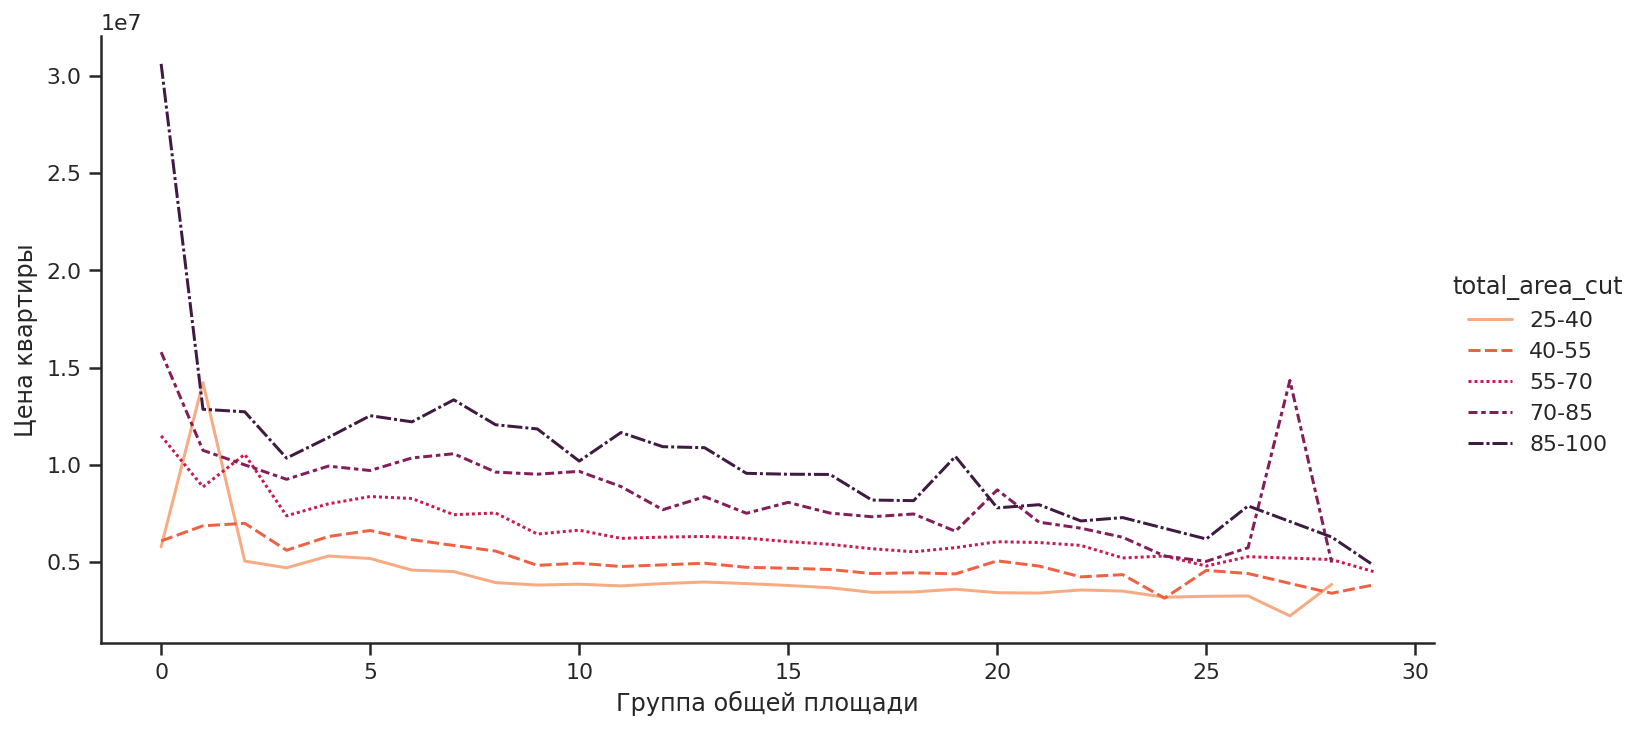

In [150]:
# Подготовим сводбную таблицу, агрегируем цену по группе площадей и удалению от центра
pivot_data = data.pivot_table(index='cityCenters_km', columns='total_area_cut', values='last_price', aggfunc='mean')
sns.set_theme(style="ticks")
palette = sns.color_palette("rocket_r", 5)
g = sns.relplot(
    data=pivot_data,
    kind="line", palette=palette,
    height=5, aspect=2
)
g.set_ylabels("Цена квартиры")
g.set_xlabels("Группа общей площади")
plt.show()

Есть общий тренд, но в каждой группе площадей изменения цены ведят себя немного по разному и с разной скоростью. Посмотрим на это в числах.

In [151]:
# для удобства перевернем таблицу
pivot_data = pivot_data.T
avg_ls = []
for row in range(5):
    # берем строку
    arr = pivot_data.iloc[row].values
    # вычислем разность между всеми известными значениями
    ls = [i - j for i, j in zip(arr[:-1], arr[1:]) if not np.isnan(i) and not np.isnan(j)]
    # и узнаем среднее этих разностей
    avg_ls.append(sum(ls) / len(ls))
round(sum(avg_ls) / len(avg_ls))
total_area_cut['средняя цена за км до центра'] = avg_ls
total_area_cut['средняя цена за км до центра'] = total_area_cut['средняя цена за км до центра'].round().astype(int)

In [152]:
cm = sns.color_palette("rocket", as_cmap=True)
total_area_cut.style.background_gradient(cmap=cm,subset=['средняя цена за км до центра'])

Как мы видим, цена за километр очень сильно отличается в зависимости от диапазона площадей квартир. Вполне вероятно, тут можно говорить о том, что каждый километр добавляет какой-то процент к стоимости квартиры, но для его нахождения нужно значительно больше данных, чтобы разбить их на более мелкие подргуппы и по площадям, и по км до центра. Сейчас мы можем лишь посчитать лишь среднее изменение цены за квадратный метр:

In [153]:
# Посмотрим сколько в выборке квартир для каждого километра до центра в сырых данных
data_row = df.query('locality_name == "Санкт-Петербург"')
data_row.cityCenters_km.value_counts().sort_index()

0.0       27
1.0      192
2.0      309
3.0      350
4.0      687
5.0      919
6.0      618
7.0      418
8.0      595
9.0      591
10.0     718
11.0    1177
12.0    1604
13.0    1453
14.0    1275
15.0    1563
16.0    1259
17.0     883
18.0     261
19.0     157
20.0      48
21.0     117
22.0     201
23.0      85
24.0      26
25.0      26
26.0      53
27.0       2
28.0       7
29.0       6
Name: cityCenters_km, dtype: int64

Отбросим занчения 0, 27, 28 и 29 километров, чтобы хоть немного снизить искажения.

In [154]:
data_row = data_row.query('cityCenters_km not in [0, 27, 28, 29]')

In [155]:
# Повторяем действия, которые мы делали выше только для одной серии
temp_row_sqm_cost = data_row.groupby('cityCenters_km')['sqm_cost'].mean()
arr = temp_row_sqm_cost.values
ls = [i - j for i, j in zip(arr[:-1], arr[1:]) if not np.isnan(i) and not np.isnan(j)]
round(sum(ls) / len(ls))

3509

Итак, с увеличением расстояния от центра города в Санкт-Петербурге на 1 километр цена квадратного метра квартиры в среднем падает на 3509 ₽, однако эти данные являются очень примерными в силу недостаточного количества данных.

### Общий вывод

Было проведено исследование предоставленных данных сервиса Яндекс Недвижимость. Входные данные – архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
<br>
Результаты каждого этапа:

#### Предобработка
На этапе предобработки выявлены следующие особенности и аномалии:

- В следующих картографических данных отсутствуют значения для населенных пунктов, не относящихся к административным границам Санкт-Петербурга. Надо принимать во внимание, что отсутствие значения не несет никакой другой информации.
 - `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
 - `cityCenters_nearest` — расстояние до центра города (м)
 - `parks_around3000` — число парков в радиусе 3 км
 - `ponds_around3000` — число водоёмов в радиусе 3 км
 
- В столбце `locality_name` — название населённого пункта, присутствует небольшое количество пропусков, возможно это техническая проблема, на которую следует обратить внимание. Также здесь присутствуют неявные дубликаты, например, `посёлок Гаврилово` и `поселок Гаврилово`. Это надо учитывать при любой агрегации данных.

- В столбце `ceiling_height` — высота потолков (м), присутствуют аномальные значения. Некоторые из них можно объяснить ошибкой постановки точки при заполнении, например, 25м и 32м, вероятно являются значениями 2.5м и 3.2м. Другие же не поддаются исправлению - например, значения меньше 2м, 10м или 100м.

- В стобце `rooms` — число комнат, есть неоднородность формата данных. Их лучше приводить по распространенным стандартам - студии должны иметь 0 комнат, а однокомнатные квартиры, не являющиеся студиями, со свободной планировкой и площадью меньше 40квм должны иметь 1 комнату.

- В следующих данных о площади встречаются аномалии - сумма жилой площади и площади кухни в редких случаях превышает общую площадь квартиры:
 - `total_area` — общая площадь квартиры в квадратных метрах (м²)
 - `living_area` — жилая площадь в квадратных метрах (м²)
 - `kitchen_area` — площадь кухни в квадратных метрах (м²)

####  Исследовательский анализ данных
На этапе исследовательского анализа данных выявлены следующие характерные диапазоны значений и выбросы:

- Общая площадь.
<br>
Значения редко выходят за 115квм. Большинство сконцентрировано от 25 до 100квм. Медиана равна 52квм.

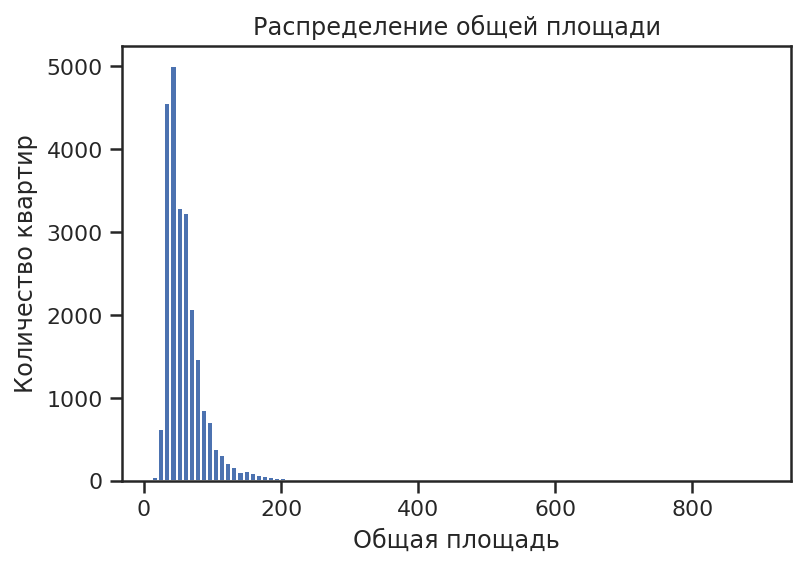

In [156]:
df['total_area'].plot(kind='hist', bins=100, title='Распределение общей площади')
sns.set_theme(style="darkgrid"); plt.xlabel('Общая площадь'); plt.ylabel('Количество квартир'); plt.show()

- Жилая площадь
<br>
Значения редко выходят за 60квм. Большинство сконцентрировано от 15квм до 60квм. Медиана равна 30квм. Есть одно отличие от общей площади - здесь на гистограмме два отчетливых пика на значениях около 18квм и 30квм. Вероятно, много типовых застроек имеют схожие планировки.

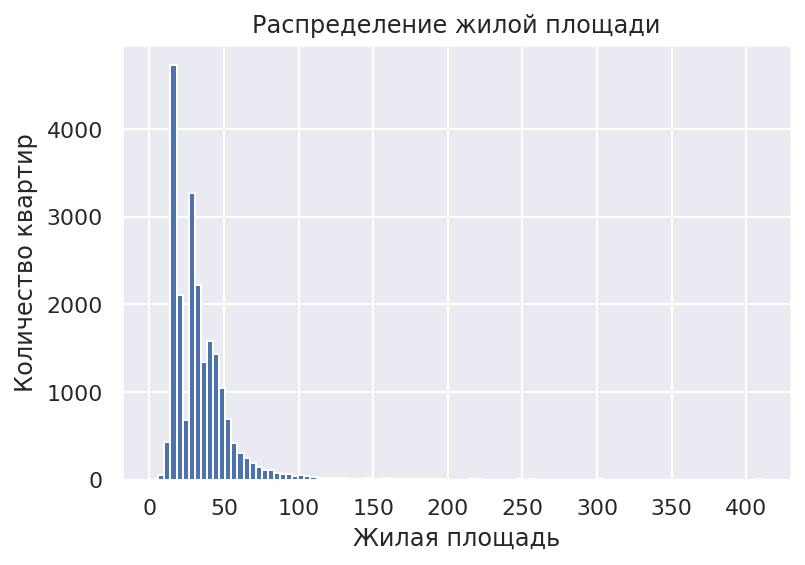

In [157]:
df['living_area'].plot(kind='hist', bins=100, title='Распределение жилой площади')
plt.xlabel('Жилая площадь'); plt.ylabel('Количество квартир'); plt.show()

- Площадь кухни
<br>
Значения редко выходят за 18квм. Большинство сконцентрировано от 5квм до 18квм. Медиана равна 9квм.

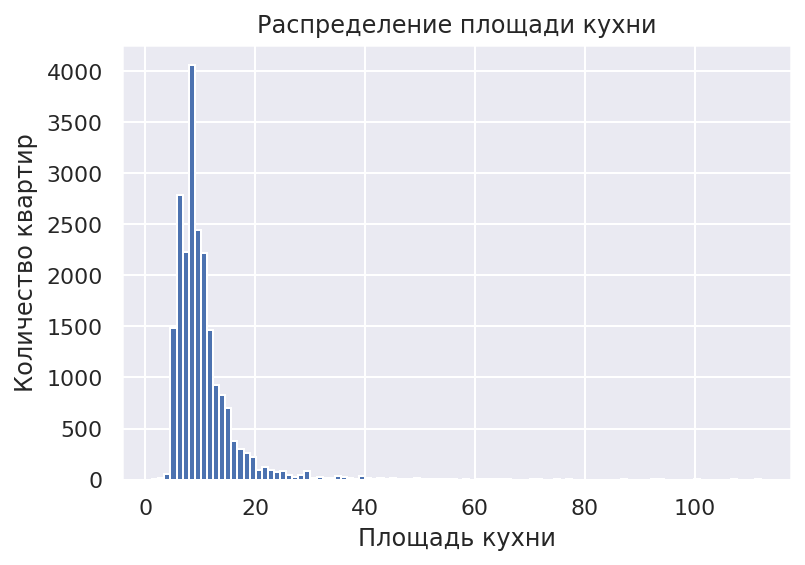

In [158]:
df['kitchen_area'].plot(kind='hist', bins=100, title='Распределение площади кухни')
plt.xlabel('Площадь кухни'); plt.ylabel('Количество квартир'); plt.show()

- Цена объекта
<br>
Разброс значений цены очень велик. Например, в выборке есть кватрира с ценой 763млн ₽.
Большинство значений меньше 12млн ₽. Медиана равна 4.6млн ₽, но есть не единичные значения доходящие до 30млн₽ и выше.

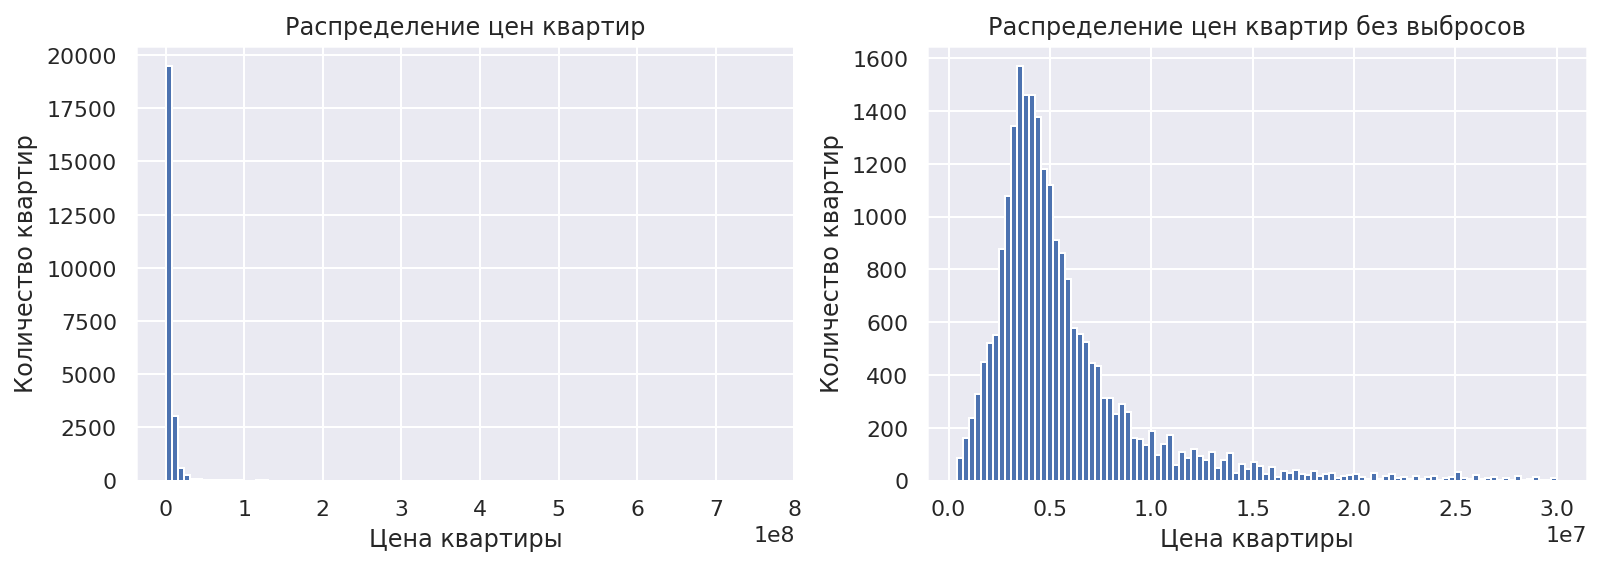

In [159]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
df['last_price'].plot(kind='hist', bins=100, title='Распределение цен квартир', ax=ax1)
temp = df[df['last_price']< 30000000]
temp['last_price'].plot(kind='hist', bins=100, title='Распределение цен квартир без выбросов', ax=ax2)
ax1.set(xlabel='Цена квартиры', ylabel='Количество квартир')
ax2.set(xlabel='Цена квартиры', ylabel='Количество квартир')
plt.show()

- Количество комнат
<br>
Большинство квартир одно-, двух- или трехкомнатные. Квартир с 8-ю и больше комнатами почти не присутствует в выборке.

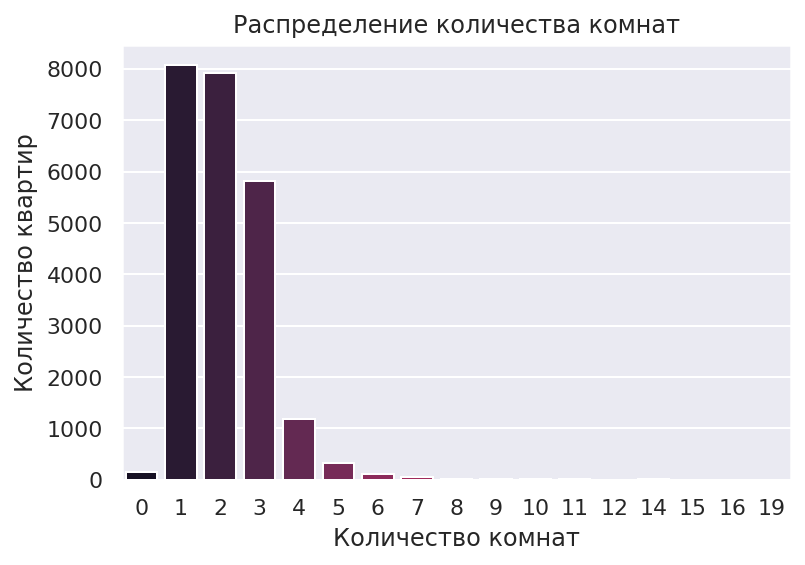

In [160]:
temp = df['rooms'].value_counts()
sns.barplot(x=temp.index, y=temp, palette="rocket")
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат'); plt.ylabel('Количество квартир'); plt.show()

- Высота потолков
<br>
Бóльшая часть значений находится между 2.5м и 3м включительно. Мода - 2.5м встречается более, чем в 2 раза чаще, чем любое другое значение.

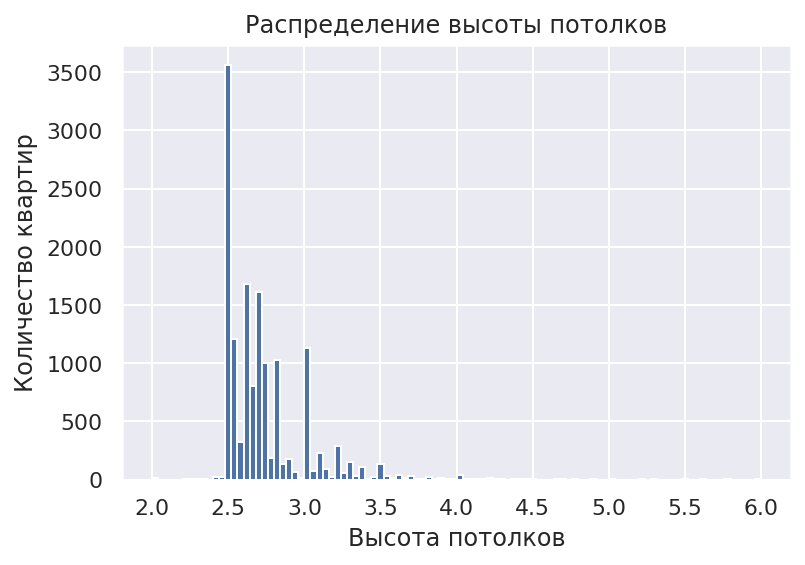

In [161]:
df['ceiling_height'].plot(kind='hist', bins=100, title='Распределение высоты потолков')
plt.xlabel('Высота потолков'); plt.ylabel('Количество квартир'); plt.show()

- Этажность
<br>
Большинтсво квартир находится не выше 5 этажа, так как этажность большинства жилых домов не превышает 5 этажей.
Пятиэтажных и девятиэтажных зданий значительно, чем любых других. А зданий выше 27 этажей практически нет в выборке.

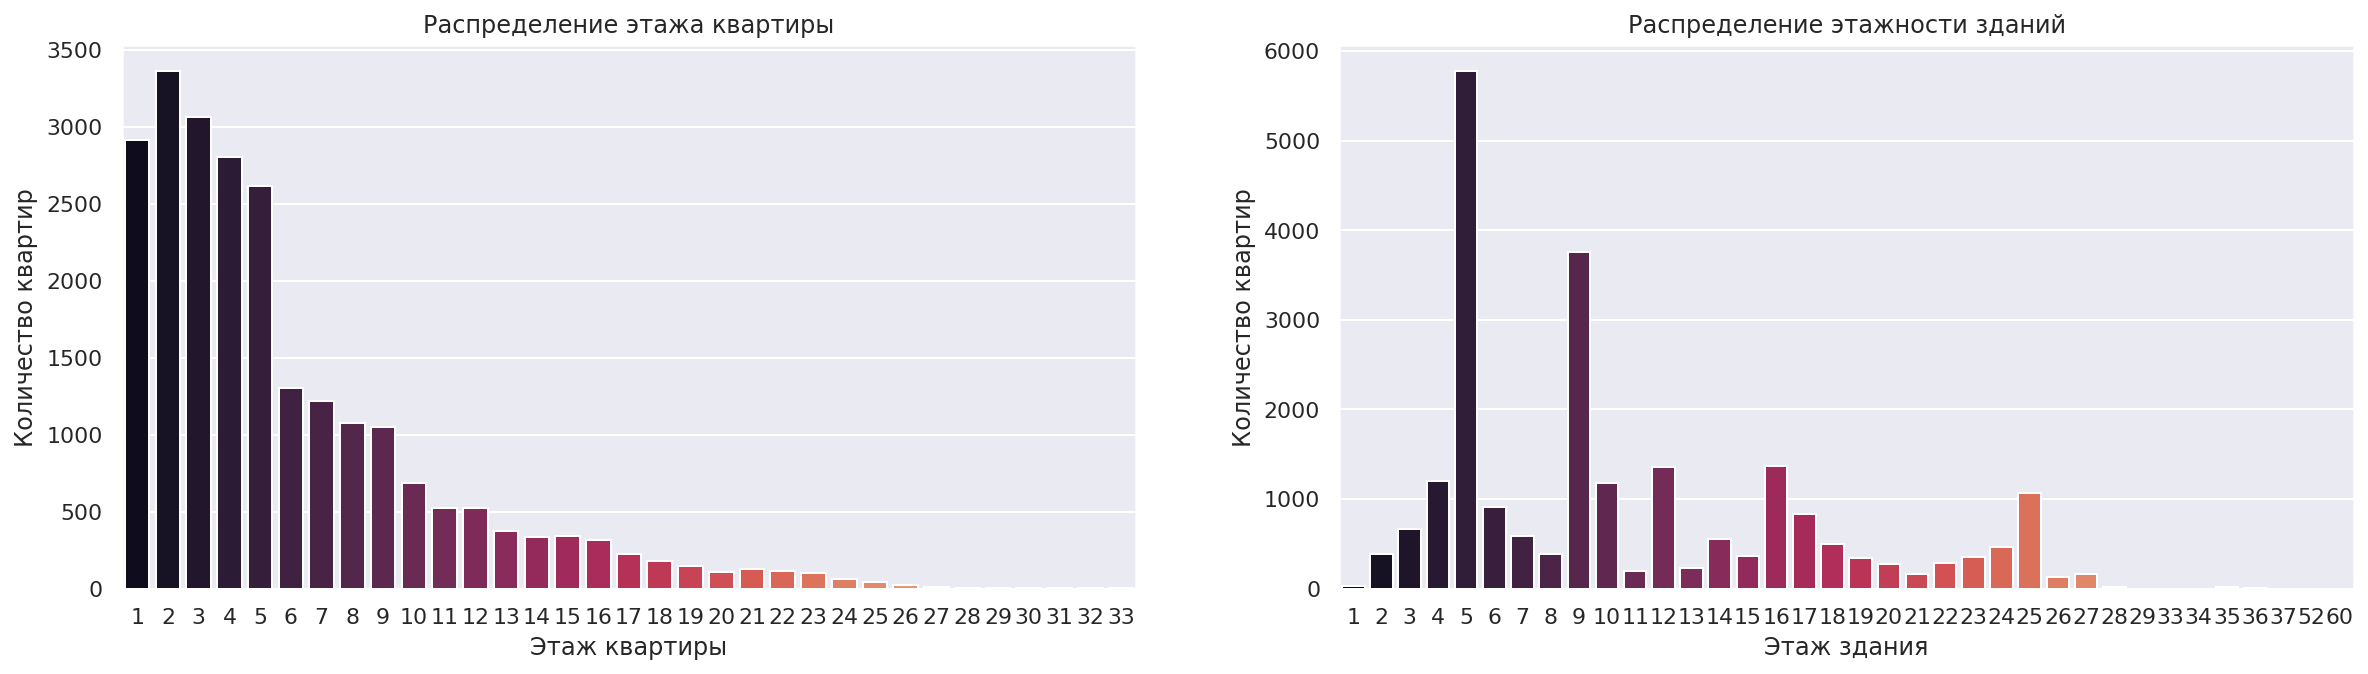

In [162]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
temp = df['floor'].value_counts()
sns.barplot(x=temp.index, y=temp, palette="rocket", ax=ax1)
ax1.set(title = 'Распределение этажа квартиры', xlabel='Этаж квартиры',  ylabel='Количество квартир')
temp = df['floors_total'].value_counts()
temp.index = temp.index.astype(int)
sns.barplot(x=temp.index, y=temp, palette="rocket", ax=ax2)
ax2.set(title = 'Распределение этажности зданий', xlabel='Этаж здания',  ylabel='Количество квартир')
plt.show()

- Расстояние до центра города
<br>
Медиана совпадает с наиболее распространенным значением - 13км до центра города. Есть второе по распространенности значение - 5км до центра города.

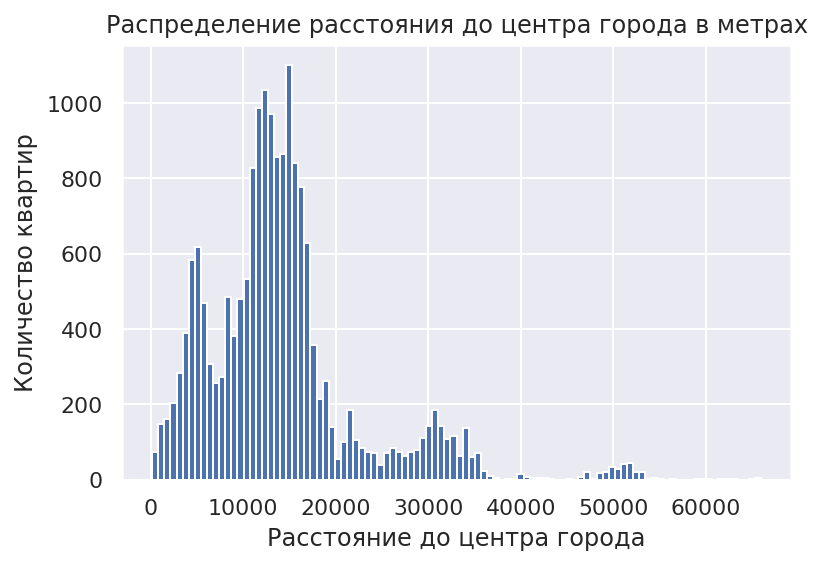

In [163]:
df['cityCenters_nearest'].plot(kind='hist', bins=100, title='Распределение расстояния до центра города в метрах')
plt.xlabel('Расстояние до центра города'); plt.ylabel('Количество квартир'); plt.show()

- Расстояние до ближайшего аэропорта
<br>
Почти все значения находятся между 6.5км и 60км. Медиана - 26.7км. На гистограмме нет ярких и узких пиков, значения распределены более равномерно, чем у остальными характеристик.

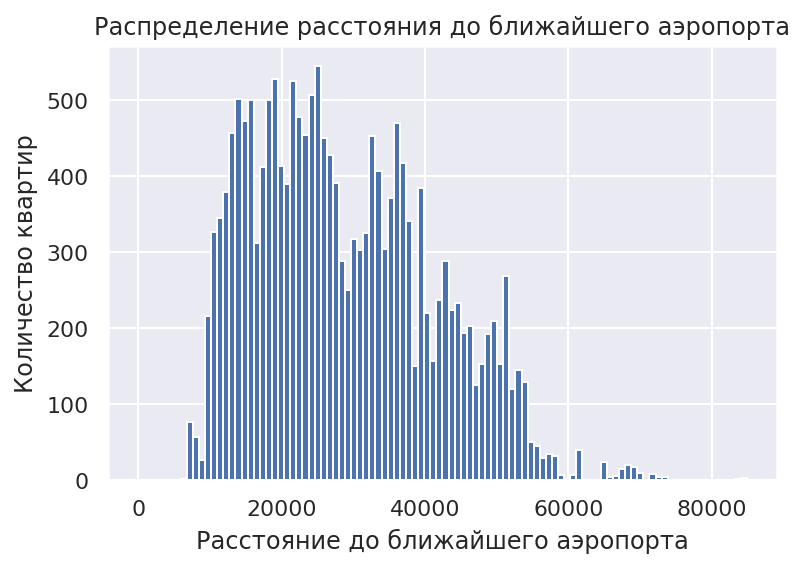

In [164]:
df['airports_nearest'].plot(kind='hist', bins=100, title='Распределение расстояния до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта'); plt.ylabel('Количество квартир'); plt.show()

- Расстояние до ближайшего парка
<br>
Большинство значений не превышает 800м. Медиана совпадает с наиболее распространенным значением  - 455м до ближайшего парка.

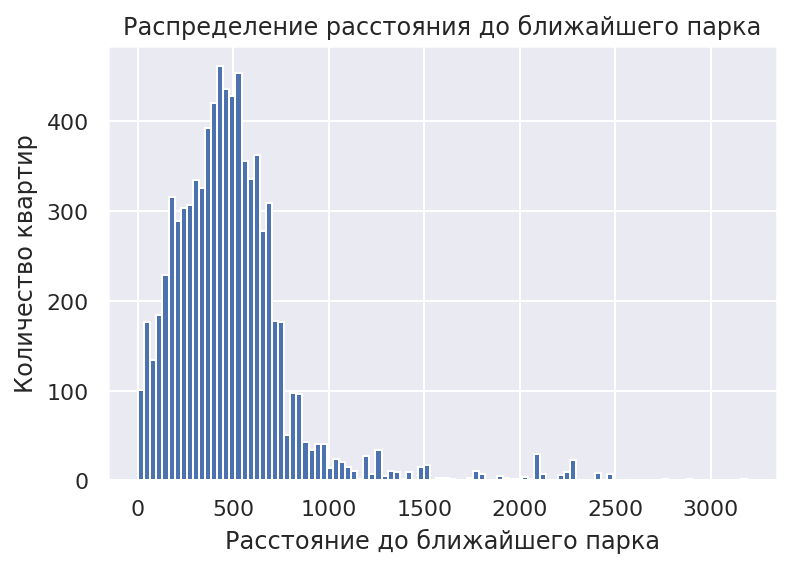

In [165]:
df['parks_nearest'].plot(kind='hist', bins=100, title='Распределение расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка'); plt.ylabel('Количество квартир'); plt.show()

- День и месяц публикации объявления
<br>
Активность размещения объявлений имеет зависимость от месяца и дня недели. Наиболее активны пользователи в феврале, марте и апреле, в мае активность падает, а в июне вновь начинает расти до ноября влючительно. В будние дни автивность пользователей день ото дня постепенно снижается, а затем сильно падает на выходных.

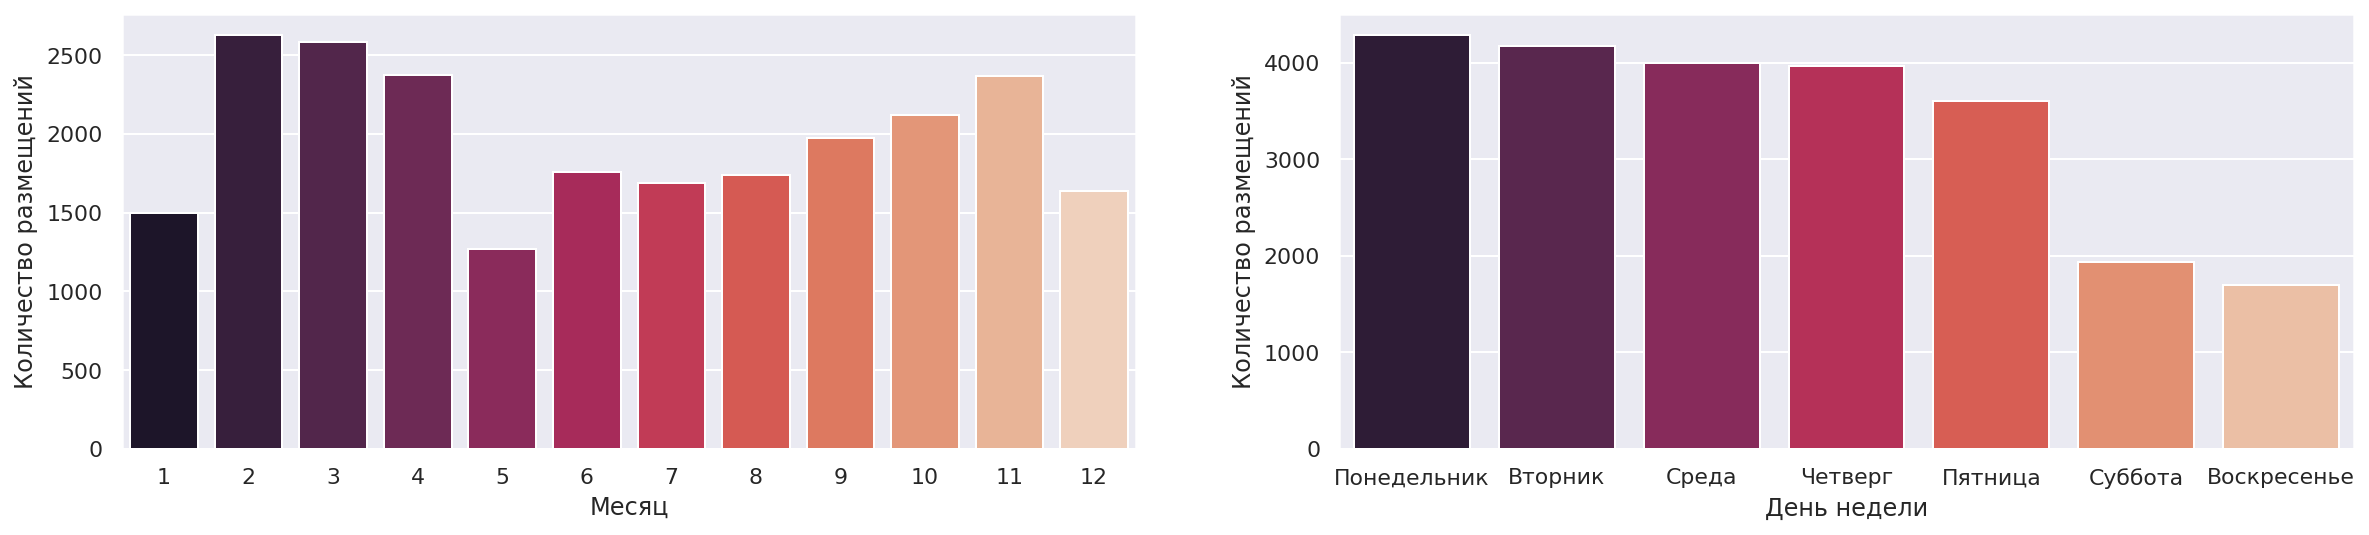

In [166]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
temp = df['month'].value_counts()
sns.barplot(x=temp.index, y=temp, palette="rocket", ax=ax1)
temp = df['weekday'].value_counts()
temp.index = ['Понедельник' , 'Вторник' , 'Среда' , 'Четверг' , 'Пятница' , 'Суббота' , 'Воскресенье']
sns.barplot(x=temp.index, y=temp, palette="rocket", ax=ax2)
ax1.set(xlabel='Месяц',  ylabel='Количество размещений')
ax2.set(xlabel='День недели', ylabel='Количество размещений')
plt.show()

- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
<br>
Бóльшая часть продаж укладывается в 250 дней, почти все в 600 дней среднее время - 181 день, медиана - 95 дней.
<br>
Небольшое количество объектов продается аномальное долгое время - вполть до 1580 дней (больше 4-х лет)
<br>
Продажа меньше, чем за 3 дня - аномально низкие значения.

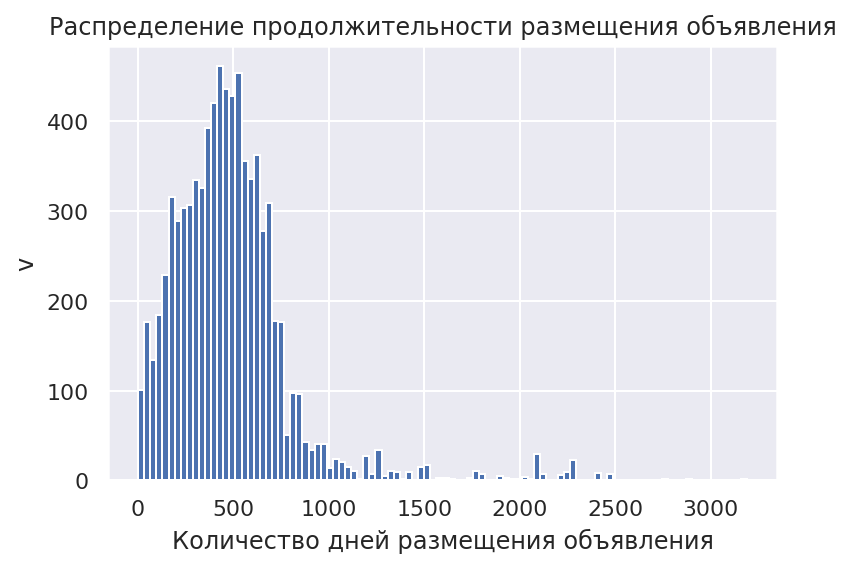

In [167]:
df['parks_nearest'].plot(kind='hist', bins=100, title='Распределение продолжительности размещения объявления')
plt.xlabel('Количество дней размещения объявления'); plt.ylabel('v'); plt.show()

Существует 3 значения, частота котрых выбивается из выборки - 45, 60 и 90 дней. Это максимальные периоды бесплатного размещения для квартир до 4.5млн₽, от 4.5млн₽ до 10млн₽ и от 10млн₽ соответственно. 
<br>
На графиках ниже четко видно, что по 45, 60 и 90 дней размещаются в основном соответствующие ценовые группы квартир.

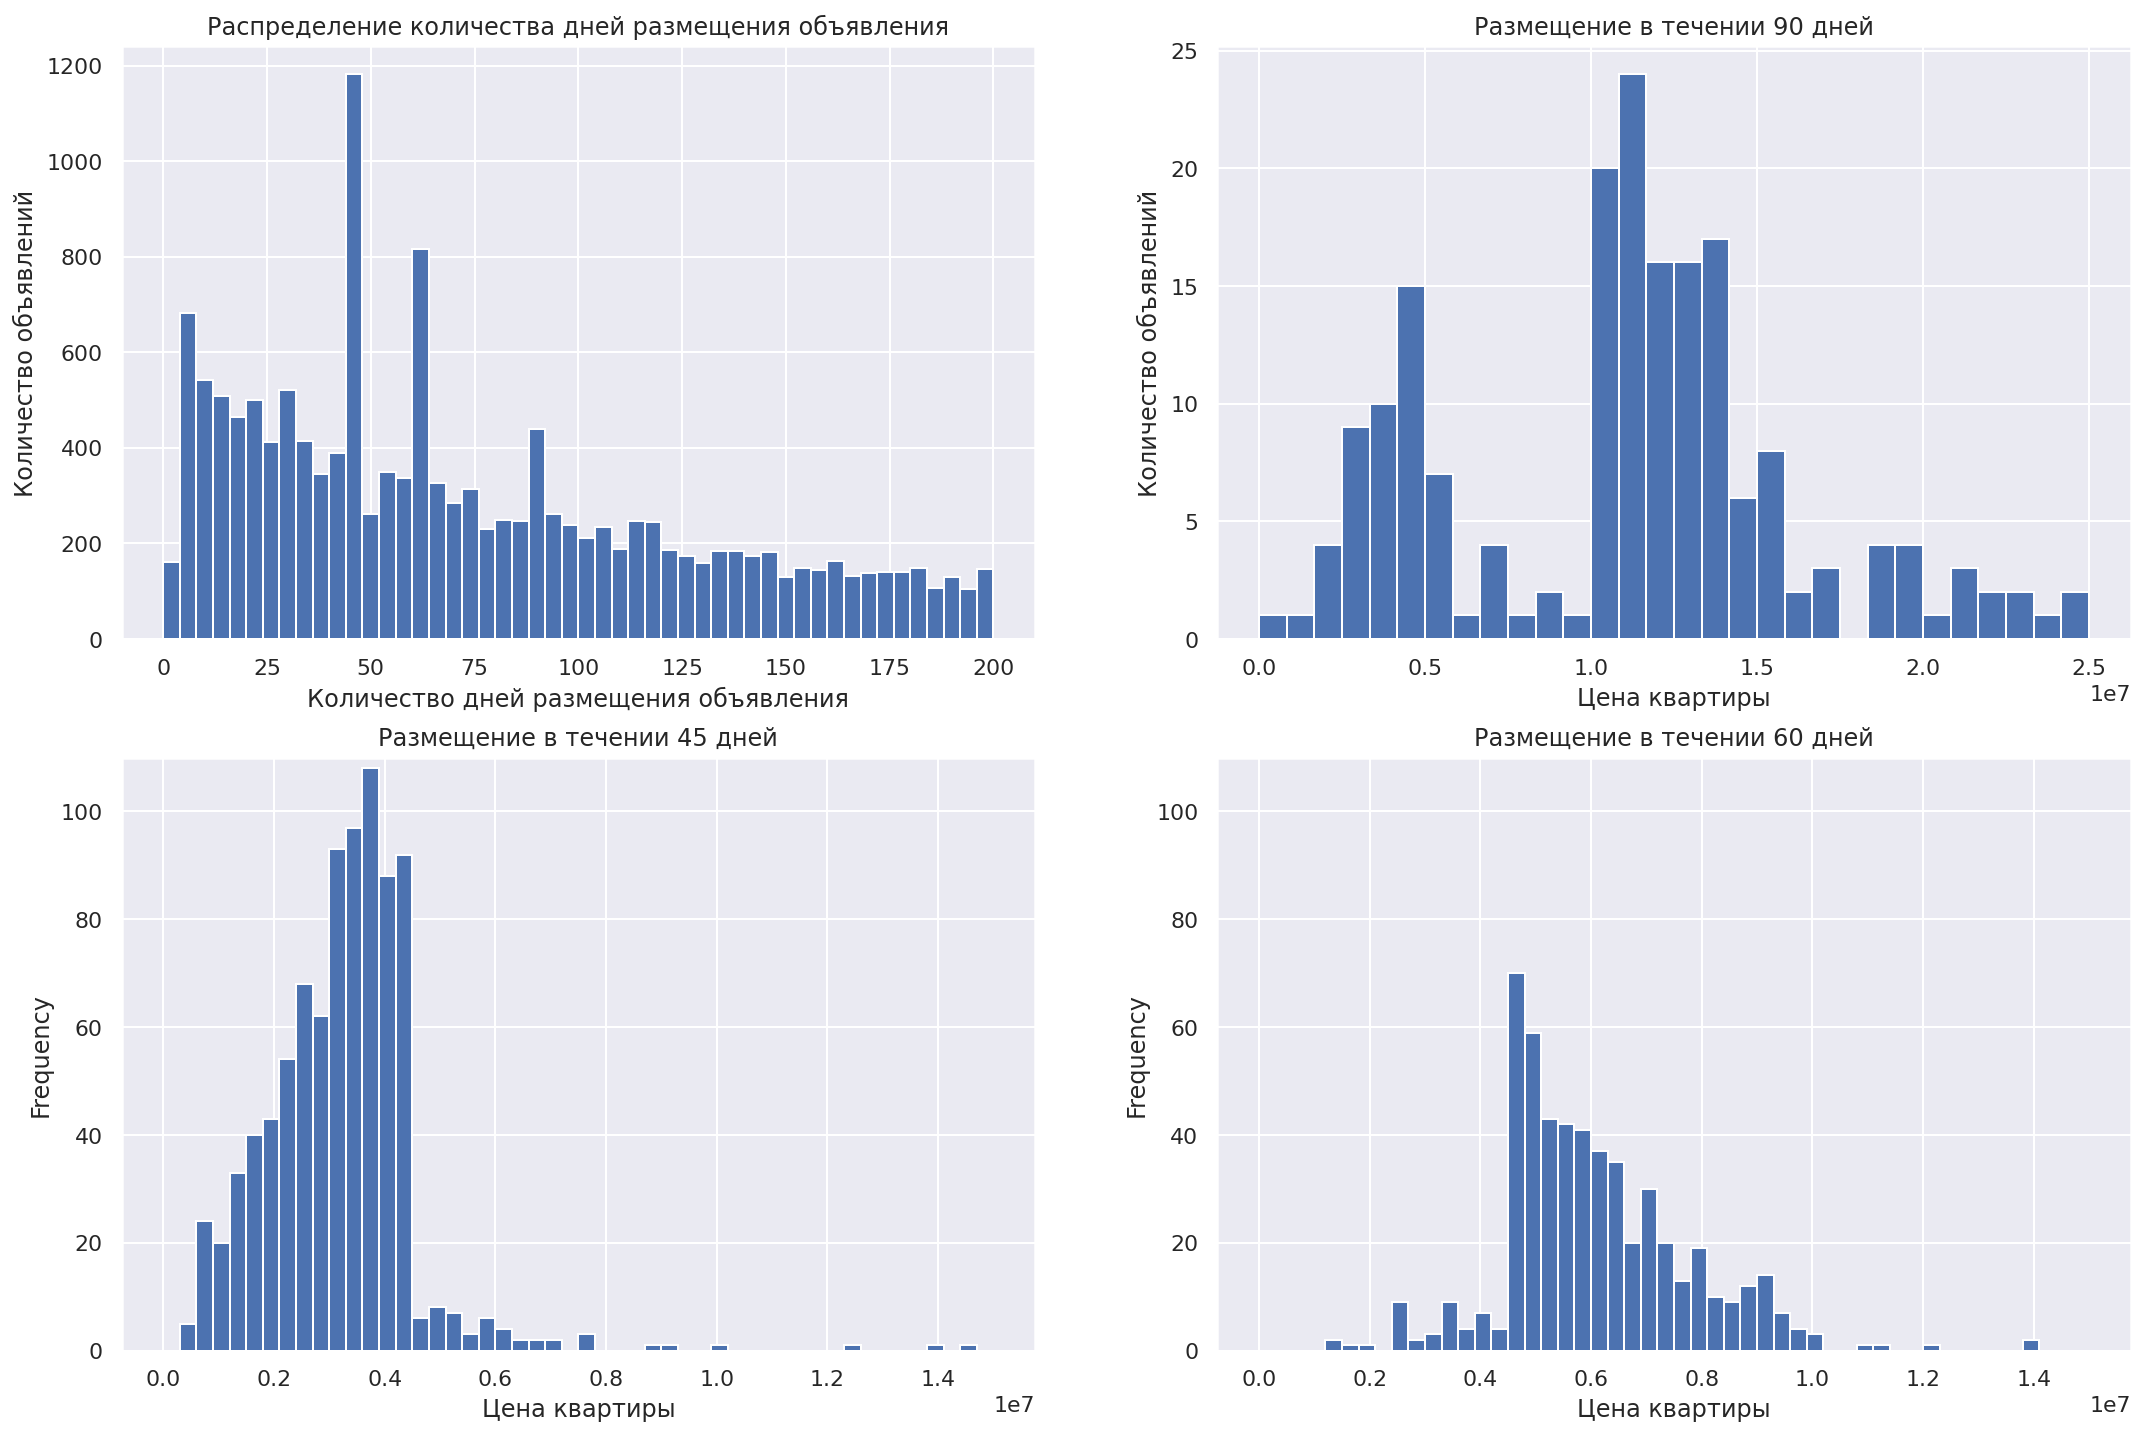

In [168]:
fig = plt.figure(figsize=(18, 12)); ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2); ax3 = fig.add_subplot(2, 2, 3); ax4 = fig.add_subplot(2, 2, 4)
ax1.set(xlabel='Количество дней размещения объявления', ylabel='Количество объявлений', 
        title='Распределение количества дней размещения объявления')
ax2.set(xlabel='Цена квартиры', ylabel='Количество объявлений', title='Размещение в течении 90 дней')
ax3.set(xlabel='Цена квартиры', ylabel='Количество объявлений', title='Размещение в течении 45 дней')
ax4.set(xlabel='Цена квартиры', ylabel='Количество объявлений', title='Размещение в течении 60 дней')
df['days_exposition'].hist(bins=50, range=(0, 200), ax=ax1)
df[(df['days_exposition'] > 89.5)&
   (df['days_exposition'] < 90.5)]['last_price'].hist(bins=30, range=(0, 25000000), ax=ax2)
df[df['days_exposition_category'] == "45 дней"]['last_price'].plot(kind='hist', bins=50, 
                                                                   range=(0, 15000000), ax=ax3, ylim=(0, 110))
df[df['days_exposition_category'] == "60 дней"]['last_price'].plot(kind='hist', bins=50, 
                                                                   range=(0, 15000000), ax=ax4, ylim=(0, 110))
plt.show()

#### Исследование зависимости цены квартиры от некоторых факторов

- Зависимость цены квартиры от общей, жилой площади и площади кухни.

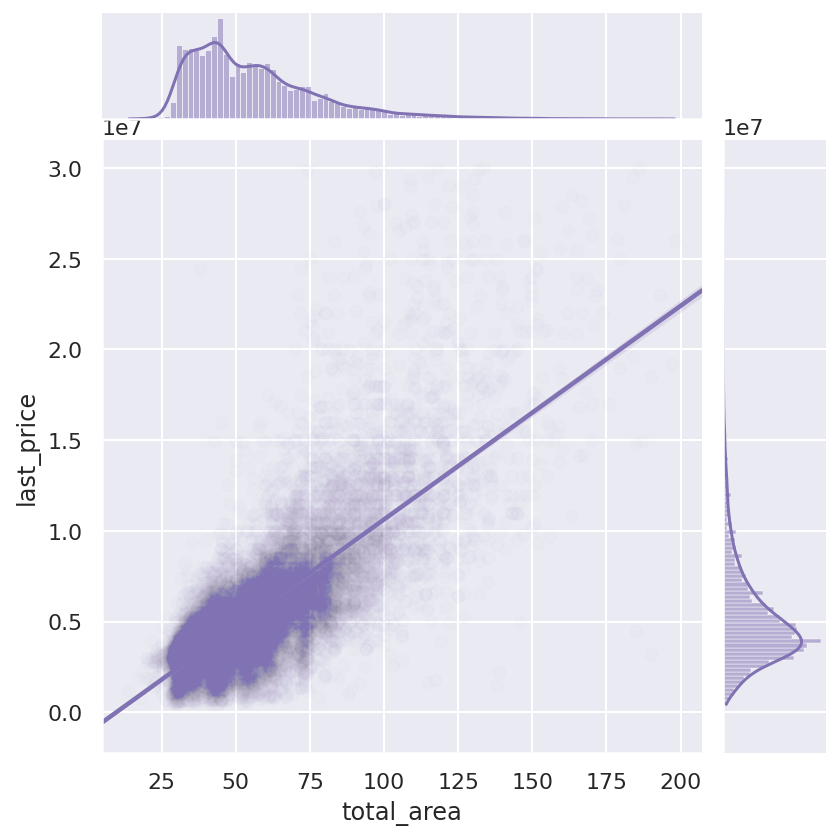

In [169]:
data = df[(df.total_area < 200)&(df.last_price < 30000000)&(df.rooms < 8)&
          (df.living_area < 100)&(df.kitchen_area < 30)]
x = data.total_area; y = data.last_price; sns.set_theme(style="darkgrid")
sns.jointplot(x=x, y=y, kind="reg", truncate=False, color="m", height=6, joint_kws = {'scatter_kws':dict(alpha=0.01)})
plt.show()

Линия на графике отражает весьма четкую положительную корреляцию - чем больше общая площадь, тем выше цена квартиры.

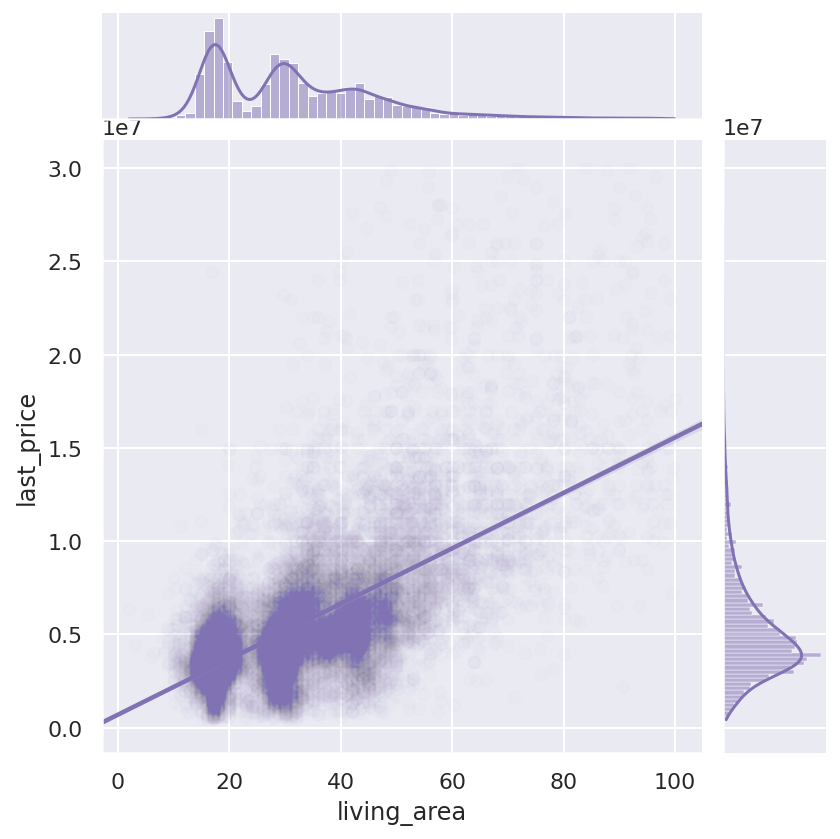

In [170]:
x = data.living_area
sns.jointplot(x=x, y=y, kind="reg", truncate=False, color="m", height=6, joint_kws = {'scatter_kws':dict(alpha=0.01)})
plt.show()

Положительная корреляция цены квартиры от жилой площади немного менее выражена, чем зависимость от общей площади, но все же достаточно четко.

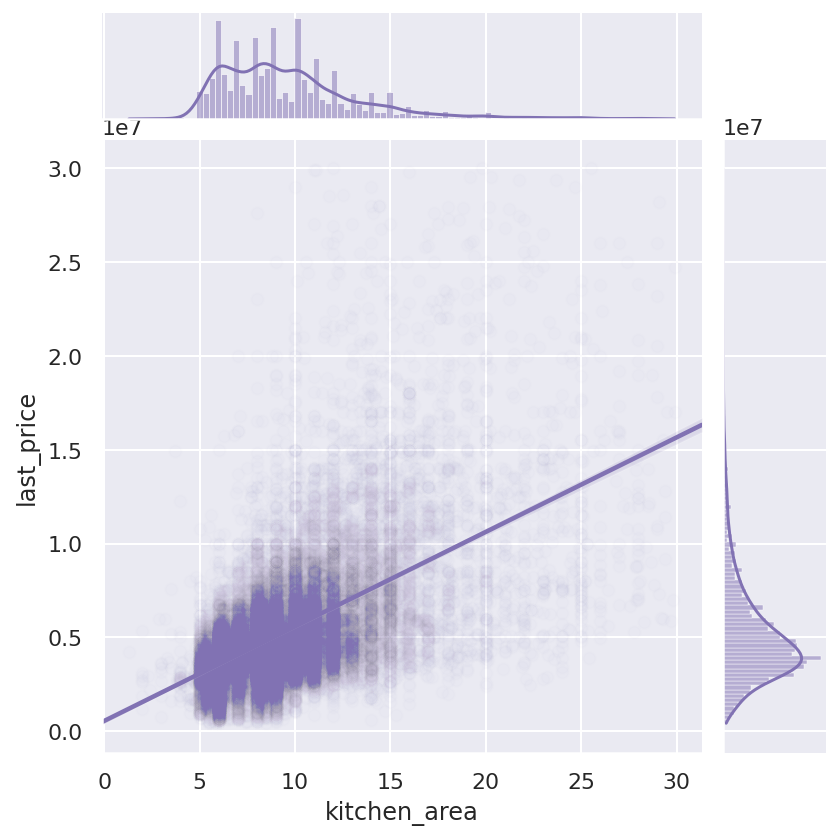

In [171]:
x = data.kitchen_area
sns.jointplot(x=x, y=y, kind="reg", truncate=False, color="m", height=6, joint_kws = {'scatter_kws':dict(alpha=0.01)})
plt.show()

Положительная корреляция цены квартиры от площади кухни почти идентична предыдущим двум.

- Зависимость цены квартиры от количества комнат

Количество комнат положительно коррелирует с ценой квартиры. Однако это происходит из-за того, что с увеличением количества квартир, увеличивается и общая площадь, которая в свою очередь имеет очень сильную положительную корреляцию с ценой квартиры.
<br>
На графике ниже демонстрируется, что при похожих значениях общей площади с увелечением количества комнат цена квартиры в среднем падает. То есть без влияния площади квартиры проявляется обратная зависимость цены квартиры от количества комнат.

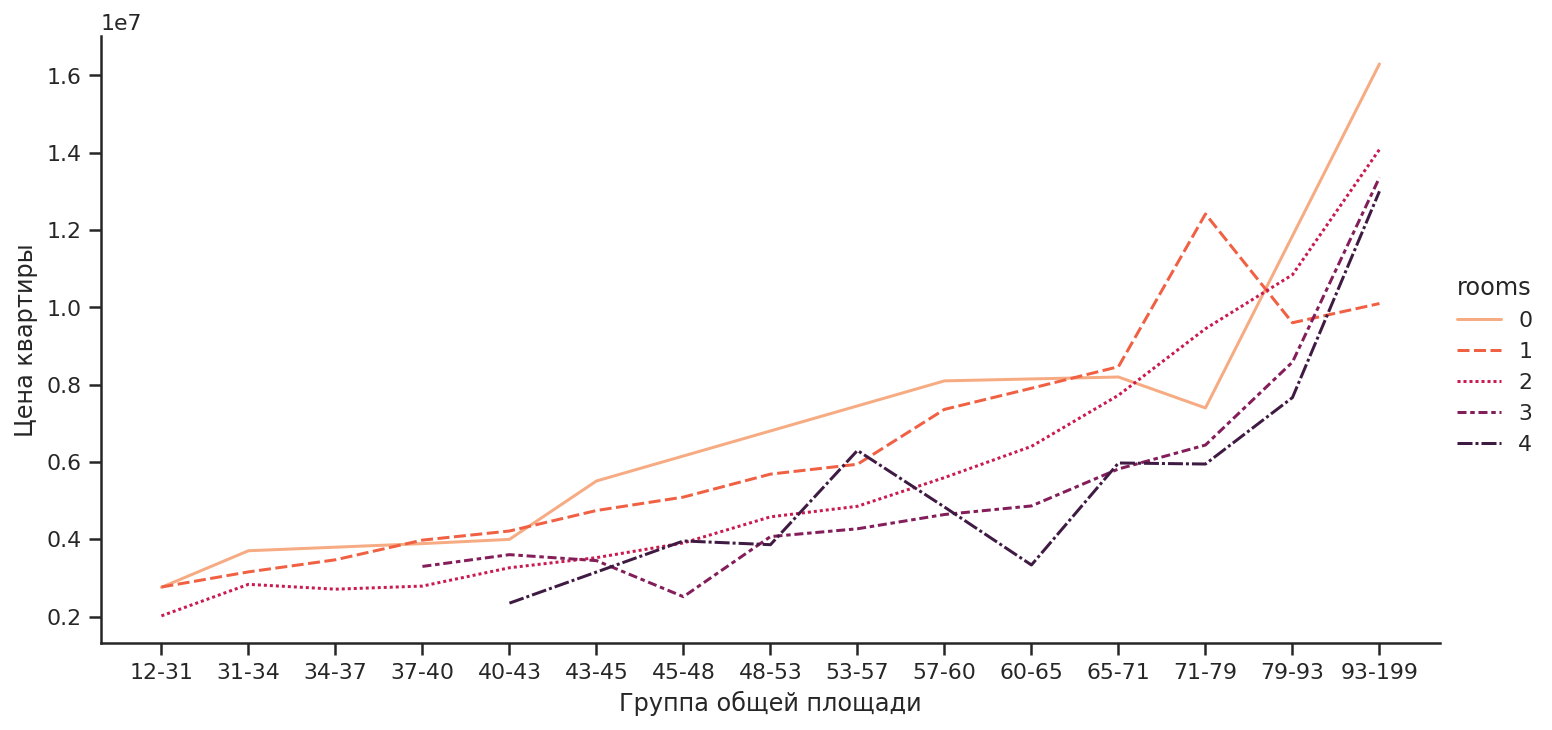

In [172]:
sns.set_theme(style="ticks"); palette = sns.color_palette("rocket_r", 5)
g = sns.relplot(data=pivot_temp, kind="line", palette=palette, height=5, aspect=2)
g.set_ylabels("Цена квартиры"); g.set_xlabels("Группа общей площади")
plt.show()

Следующие зависимости цены квартиры отсутствуют:
- от категории этажа (первый, последний, другой)
- от даты размещения (день недели, месяц, год).


([Здесь](#2) подробно доказывается их отсутствие)

#### Подсчитана среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [173]:
pd.DataFrame(sqm_local_cost).T.style.background_gradient(cmap=sns.color_palette("magma", as_cmap=True), axis=1)

Самая низкая цена квадратного метра в Выбоге - 58 142 ₽.
<br>
Самая высокая в Санкт-Петербурге - 108 387 ₽.

#### Исследование средней цены километра до центра города в Санкт-Петербурге.

Исследование показало, что цена за километр очень сильно отличается в зависимости от диапазона площадей квартир. Вполне вероятно, что каждый километр добавляет некоторый процент к стоимости квартиры, но для его нахождения слишком предоставленная выборка слишком мала. С таким объемом данных возможно узнать только среднее изменение цены за квадратный метр:

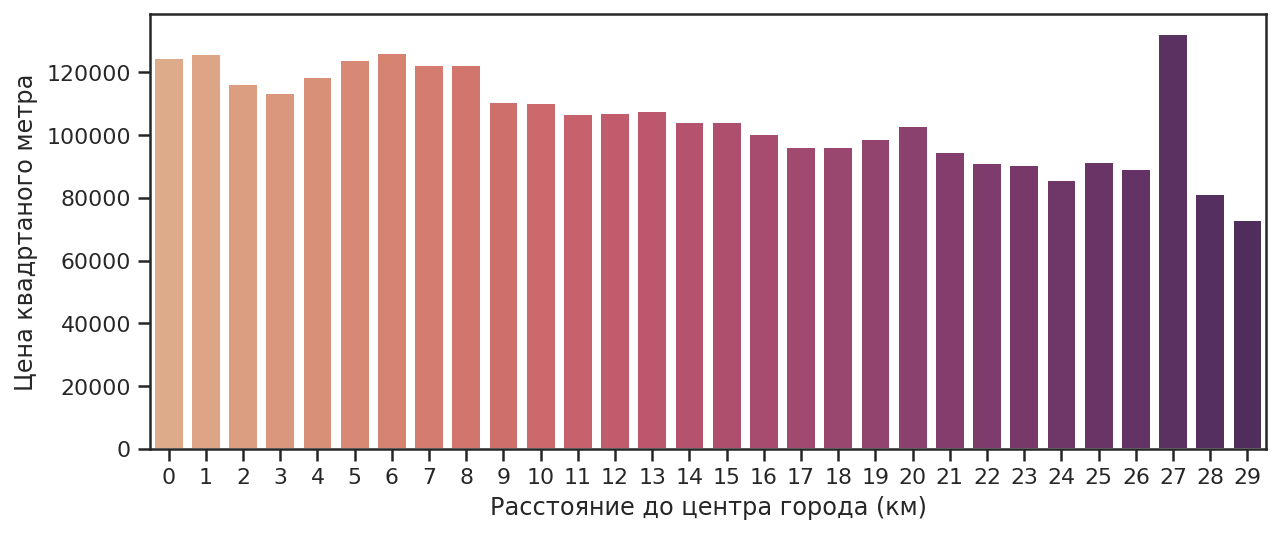

In [174]:
fig = plt.figure(figsize=(10, 4))
sns.barplot(x=temp_sqm_cost.index, y=temp_sqm_cost, palette="flare")
plt.xlabel('Расстояние до центра города (км)'); plt.ylabel('Цена квадртаного метра'); plt.show()

С увеличением расстояния от центра города в Санкт-Петербурге на 1 километр цена квадратного метра квартиры в среднем падает на 3509 ₽.
<br>
Однако эти данные являются весьма приближенными в силу недостаточного количества данных.

Рекомендация:
- Нужно провести повторное исследование на значительно большей выборке для нахождения средней цены километра до центра города в Санкт-Петербурге.

(Подробно эта проблема описана [здесь](#3))